#01.SETUP

In [10]:
!nvidia-smi

Failed to initialize NVML: Unknown Error


In [2]:
cd /root/Share/LOTUSROOM/lotusroom_notebooks

/root/Share/LOTUSROOM/lotusroom_notebooks


In [3]:
!pip install transformers==4.25.1
!pip install bitsandbytes-cuda111==0.26.0
!pip install datasets==1.16.1
!pip install bitsandbytes loguru
!pip install discord.py
!pip install diffusers --upgrade
!pip install invisible_watermark transformers accelerate safetensors
!pip install transformers --upgrade
!pip install langdetect
!pip install scipy
!pip install tensorboard
!pip install ctranslate2 sentencepiece
!pip install -q diffusers transformers accelerate peft
!pip install googletrans==4.0.0-rc1

  Using cached transformers-4.25.1-py3-none-any.whl.metadata (93 kB)
  Using cached tokenizers-0.13.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
Using cached transformers-4.25.1-py3-none-any.whl (5.8 MB)
Using cached tokenizers-0.13.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.8 MB)
DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specifier torch>=1.9.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.37.2
    Uninstalling tr

In [4]:
import os
from config._tokens import *
os.environ['TOKEN1'] = token1
os.environ['TOKEN2'] = token2
os.environ['TOKEN3'] = token3

#02.LOAD GPTs & SD

In [5]:
from gptj import config, tokenizer, GPTJForCausalLM
import torch
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
#gpt = GPTJForCausalLM.from_pretrained("./saved_models_gpt-j-6B-8bit/gpt-j-6B",low_cpu_mem_usage=True)
gpt = GPTJForCausalLM.from_pretrained("/root/Share/LOTUSROOM/mary-shelly", revision="float16", torch_dtype=torch.float32, low_cpu_mem_usage=True)
gpt.to(device)


/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/conda/lib/python3.10/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn("The installed version of bitsandbytes was compiled without GPU support. "


/opt/conda/lib/python3.10/site-packages/bitsandbytes/libbitsandbytes_cpu.so: undefined symbol: cadam32bit_grad_fp32


/opt/conda/lib/python3.10/site-packages/torch/cuda/__init__.py:611: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


lm_head Linear(in_features=4096, out_features=50400, bias=True)
k_proj Linear(in_features=4096, out_features=4096, bias=False)
v_proj Linear(in_features=4096, out_features=4096, bias=False)
q_proj Linear(in_features=4096, out_features=4096, bias=False)
out_proj Linear(in_features=4096, out_features=4096, bias=False)
fc_in Linear(in_features=4096, out_features=16384, bias=True)
fc_out Linear(in_features=16384, out_features=4096, bias=True)
k_proj Linear(in_features=4096, out_features=4096, bias=False)
v_proj Linear(in_features=4096, out_features=4096, bias=False)
q_proj Linear(in_features=4096, out_features=4096, bias=False)
out_proj Linear(in_features=4096, out_features=4096, bias=False)
fc_in Linear(in_features=4096, out_features=16384, bias=True)
fc_out Linear(in_features=16384, out_features=4096, bias=True)
k_proj Linear(in_features=4096, out_features=4096, bias=False)
v_proj Linear(in_features=4096, out_features=4096, bias=False)
q_proj Linear(in_features=4096, out_features=4096, b

Some weights of the model checkpoint at /root/Share/LOTUSROOM/mary-shelly were not used when initializing GPTJForCausalLM: ['lm_head.adapter.0.weight', 'lm_head.adapter.1.weight', 'transformer.h.0.attn.k_proj.adapter.0.weight', 'transformer.h.0.attn.k_proj.adapter.1.weight', 'transformer.h.0.attn.out_proj.adapter.0.weight', 'transformer.h.0.attn.out_proj.adapter.1.weight', 'transformer.h.0.attn.q_proj.adapter.0.weight', 'transformer.h.0.attn.q_proj.adapter.1.weight', 'transformer.h.0.attn.v_proj.adapter.0.weight', 'transformer.h.0.attn.v_proj.adapter.1.weight', 'transformer.h.0.mlp.fc_in.adapter.0.weight', 'transformer.h.0.mlp.fc_in.adapter.1.weight', 'transformer.h.0.mlp.fc_out.adapter.0.weight', 'transformer.h.0.mlp.fc_out.adapter.1.weight', 'transformer.h.1.attn.k_proj.adapter.0.weight', 'transformer.h.1.attn.k_proj.adapter.1.weight', 'transformer.h.1.attn.out_proj.adapter.0.weight', 'transformer.h.1.attn.out_proj.adapter.1.weight', 'transformer.h.1.attn.q_proj.adapter.0.weight', 't

GPTJForCausalLM(
  (transformer): GPTJModel(
    (wte): FrozenBNBEmbedding(50400, 4096)
    (drop): Dropout(p=0.0, inplace=False)
    (h): ModuleList(
      (0-27): 28 x GPTJBlock(
        (ln_1): LayerNorm((4096,), eps=1e-05, elementwise_affine=True)
        (attn): GPTJAttention(
          (attn_dropout): Dropout(p=0.0, inplace=False)
          (resid_dropout): Dropout(p=0.0, inplace=False)
          (k_proj): FrozenBNBLinear(4096, 4096)
          (v_proj): FrozenBNBLinear(4096, 4096)
          (q_proj): FrozenBNBLinear(4096, 4096)
          (out_proj): FrozenBNBLinear(4096, 4096)
        )
        (mlp): GPTJMLP(
          (fc_in): FrozenBNBLinear(4096, 16384)
          (fc_out): FrozenBNBLinear(16384, 4096)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.0, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((4096,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): FrozenBNBLinear(4096, 50400)
)

In [6]:
async def get_mary_response(prompt, min_words=128, max_words=128):
    global device, tokenizer, gpt
    prompt = tokenizer(prompt, return_tensors='pt')
    prompt = {key: value.to(device) for key, value in prompt.items()}
    out = gpt.generate(**prompt, min_length=min_words, max_length=max_words, do_sample=True)
    return tokenizer.decode(out[0])

In [7]:
from diffusers import AutoPipelineForImage2Image

#pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16").to("cuda")
pipe = AutoPipelineForImage2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16").to("cuda:1")
pipe.load_lora_weights("/root/Share/LOTUSROOM/LoRA/diaphanera.safetensors", adapter_name="diaphanera")
pipe.set_adapters(["diaphanera"], adapter_weights=[1.0])


Loading pipeline components...: 100%|███████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 10.00it/s]


RuntimeError: No CUDA GPUs are available

In [10]:
import random
prompt_list=['a piece of agate with a red and white pattern', 'a large piece of blue and white marble', 'a piece of agate with a blue and yellow pattern', 'a large piece of agate with a very large center', 'a piece of agate with a red and white stripe', 'a green and white stone with a black background', 'a large piece of pink and white rock', 'a piece of yellow agate with black spots', 'a piece of white and gold marble with a triangle', 'a piece of red and green agate', 'a large piece of agate with a diamond in the center', 'a large piece of red and black agate', 'a piece of rock with a hole in it', 'a white vase with a green center on a black surface', 'a green and yellow stone with a black background', 'a piece of agate with a black and white pattern', 'a piece of rock with a very large piece of rock in the middle', 'a piece of rock with a very colorful pattern', 'a piece of agate with a pattern of swirls', 'a piece of agate with a face on it', 'a large piece of art with a very colorful design', 'a piece of rock with a piece of rock in it', 'a piece of agate with a hole in it', 'a large piece of rock with a very large center', 'a piece of rock with a black and white pattern', 'a blue and white piece of rock with water inside', 'a piece of agate with a yellow and white swirl', 'a piece of rock with a white object in it', 'a picture of a lake with a sky in the background', 'a piece of agate with a black bird on it', 'a piece of agate with a pattern of swirls', 'a large piece of red and white rock with a black hole', 'a piece of rock with a very large piece of rock', 'a piece of red and white rock with a black background', 'a large piece of rock with a large crystal in it', 'a piece of agate with a red and white stripe', 'a slice of agate with a black background', 'a large piece of agate with a white and blue pattern', 'a slice of agate with a red and yellow stripe', 'a piece of rock with a cross on it', 'a slice of agate with a red center', 'a large piece of white and brown agate', 'a large slice of agate with a face on it', 'a piece of rock with a very large piece of material']
base_prompt = "((((diaphanera)))), ((("+ random.choice(prompt_list) +")))"
print (base_prompt)

((((diaphanera)))), (((a piece of agate with a pattern of swirls)))


In [9]:
from PIL import Image
from config import sd_config
negative_prompt = "lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry"
seed=0
generator = torch.manual_seed(seed)

def generate_sd(prompt, **kwargs):
    with torch.no_grad(): 
        base_prompt = f"diaphanera, {random.choice(prompt_list)}"
        print(base_prompt + prompt)

        width = kwargs.get('width', 860)
        height = kwargs.get('height', 860)
        min_strength = kwargs.get('min_strength', 0.6)
        max_strength = kwargs.get('max_strength', 0.95)
        min_lora_weight = kwargs.get('min_lora_weight', 0.7)
        max_lora_weight = kwargs.get('max_lora_weight', 1.0)
        guidance_scale = kwargs.get('guidance_scale', 7.0)
        num_inference_steps = kwargs.get('num_inference_steps', 20)
        init_image_list = kwargs.get('init_image_list', [])

        strength = random.uniform(min_strength, mac_strength)
        lora_weight = random.uniform(min_lora_weight, max_lora_weight)

        try:
            init_image = Image.open(radom.choice(init_image_list)).resize((width, height))
        except:
            init_image = Image.new('RGB', (width, height), (255, 255, 255))

        pipe.set_adapters(["diaphanera"], adapter_weights=lora_weight)
        image = pipe(
            prompt=f"{base_prompt}, ((({prompt})))",
            width=width,
            height=height,
            image=init_image,
            negative_prompt=negative_prompt,
            generator=generator,
            strength=strength,
            guidance_scale=guidance_scale,
            num_inference_steps=num_inference_steps
        ).images[0]
    return image

diaphanera, a piece of agate with a pattern of swirls


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.72it/s]


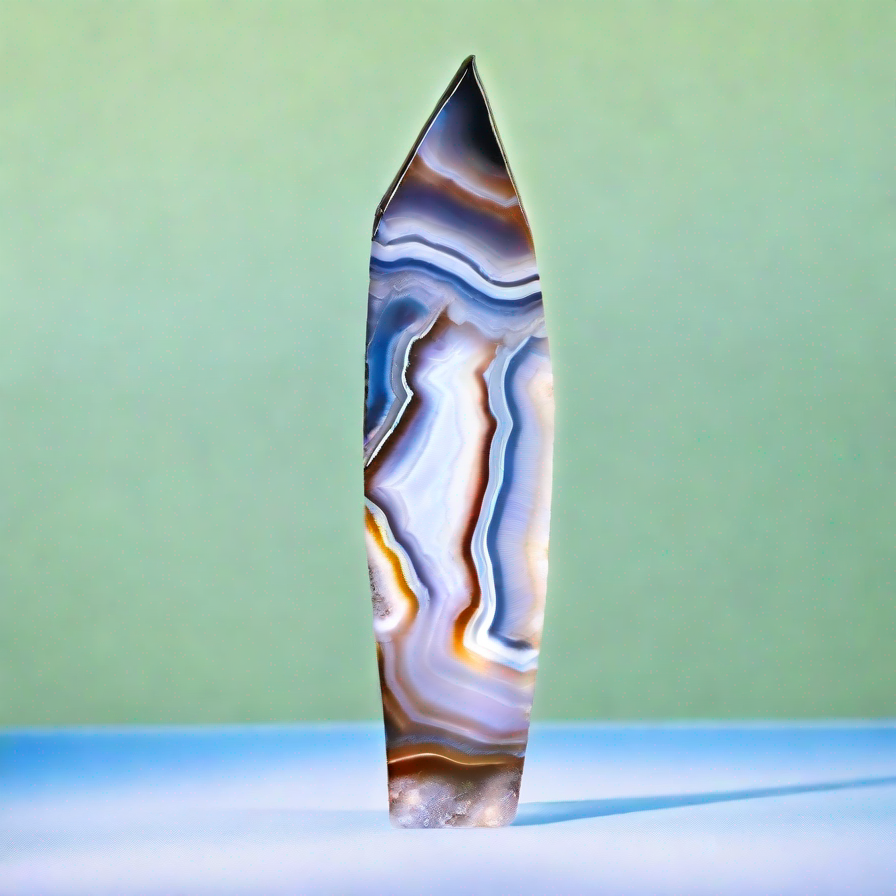

In [12]:
prompt=''
generate_sd(prompt)

In [13]:
#!pip install openai --upgrade
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install openai==0.28

# 2. APIキーを設定
import openai
import os

from config._api_key import openai_api
openai.api_key = openai_api
os.environ['OPENAI_API'] = openai_api

async def get_gpt4_response(prompt, model="gpt-4-0125-preview", tokens=1000):
    response = await openai.ChatCompletion.acreate(
        model=model,
        messages=[
            {"role": "system", "content": "You are a brilliant fashion design assistant."},
            {"role": "user", "content": prompt},
        ],
        max_tokens=tokens,
        temperature=0.7,
    )
    return response




DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specifier torch>=1.9.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [14]:
prompt='eureka'
await get_mary_response(prompt)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'eureka.instance.hostName" value="#settings.eureka.instance.url"/>\n        </entry>\n        <entry key="eureka.instance.nonCoreServicesPort">\n            <value>8091</value>\n        </entry>\n        <entry key="eureka.instance.statusPagePath">\n            <value>/actuator/'

In [15]:
await get_gpt4_response(prompt)

<OpenAIObject chat.completion id=chatcmpl-8udIql7UD0lhjljJT0PfZPNGAKMXS at 0x7f1a47d59f80> JSON: {
  "id": "chatcmpl-8udIql7UD0lhjljJT0PfZPNGAKMXS",
  "object": "chat.completion",
  "created": 1708508140,
  "model": "gpt-4-0125-preview",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "It sounds like you've had a moment of inspiration or a breakthrough idea! That's fantastic. Share more about your idea, and let's see how we can develop it further together. Whether it's a new design concept, a unique way to use materials, or an innovative approach to sustainable fashion, I'm here to help you flesh it out and bring it to life."
      },
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 21,
    "completion_tokens": 75,
    "total_tokens": 96
  },
  "system_fingerprint": "fp_f084bcfc79"
}

# 03.LOAD LOTUS

In [16]:
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger('discord')
logger.setLevel(logging.ERROR)
handler = logging.FileHandler(filename='discord.log', encoding='utf-8', mode='w')
handler.setFormatter(logging.Formatter('%(asctime)s:%(levelname)s:%(name)s: %(message)s'))
logger.addHandler(handler)

In [17]:
from config.prompts import *

In [18]:
import discord
import os
import openai
import asyncio
import re
from datetime import datetime
import shutil
from asyncio import sleep
import random

from langdetect import detect as lang_detect
from langdetect import LangDetectException

from googletrans import Translator

BG_EXT = ".gif"
BG_GIF_PATH = f'/root/Share/LOTUSROOM/GDrive/3dlogo_typ_bg{BG_EXT}'

#initial
intents = discord.Intents.default()
intents.message_content = True
client_gpt = discord.Client(intents=intents)
client_mary = discord.Client(intents=intents)

token_mary = os.environ['TOKEN2']
token_gpt = os.environ['TOKEN1']
openai.api_key = os.environ['OPENAI_API']

client_gpt_id = None
client_mary_id = None
user_who_typed_mary_id = None

dialogue_log = ""
question = ""
loop_value = 1

min_words_mary = 150
max_words_mary = 250

last_mary_message_time = None
question_list = []

from config._discord import *

current_request_id = 0

def add_period(text, language):
    if language == 'ja':
        if not (text.endswith("。") or text.endswith("！") or text.endswith("？")):
            text += "。"
    elif language == 'en':
        if not (text.endswith(".") or text.endswith("!") or text.endswith("?")):
            text += "."
    return text


async def move_old_images(destination_folder, log_folder, keep_files_count=5):
    """
    Move all files except the latest 'keep_files_count' from the destination folder to the log folder.
    """
    os.makedirs(log_folder, exist_ok=True)

    files = [f for f in os.listdir(destination_folder) if os.path.isfile(os.path.join(destination_folder, f))]
    files.sort(key=lambda x: os.path.getmtime(os.path.join(destination_folder, x)), reverse=True)  # sort files by modification time

    for file in files[keep_files_count:]:  # Skip the latest 'keep_files_count' files
        old_path = os.path.join(destination_folder, file)
        new_path = os.path.join(log_folder, file)
        shutil.move(old_path, new_path)

def check_japanese(text):
    pattern = r'[\u3000-\u303F\u3040-\u309F\u30A0-\u30FF\u3400-\u4DBF\u4E00-\u9FFF]'
    return bool(re.search(pattern, text))

def detect_language(text):
    try:
        detected_language = lang_detect(text)
        if detected_language == "ja":
            return "ja"
        elif check_japanese(text):
            return "ja"
        else:
            return "en"
    except LangDetectException:
        return "ja" if check_japanese(text) else "en"

def response_editor(response):
  if "。" in response:
      response = response.rsplit("。", 1)[0] + "。"
  elif "." in response:
      response = response.rsplit(".", 1)[0] + "."
  elif "\n" in response:
      response = response.rsplit("\n", 1)[0]
  return response

def extract_text(pattern, text):
    match = re.search(pattern, text, re.DOTALL)
    if match:
        return match.group(1).strip()
    return ""

def translate_text(text, dest_language='ja'):
    translator = Translator()
    translation = translator.translate(text, dest=dest_language)
    return translation.text

@client_mary.event
async def on_ready():
  global client_mary_id
  print(f'Welcome {client_mary.user}')
  client_mary_id = client_mary.user.id

async def on_reset(message, dialogue_log, question):
    dialogue_log = ""
    question = ""
    return dialogue_log, question

@client_mary.event
async def on_message(message):
  global dialogue_log, loop_value, question, question_list, last_mary_message_time, current_request_id
    
  if (str(message.channel.id) in specific_channel_ids) and ((message.author.name in specific_user_names) or (message.author.id in specific_user_ids)):
    current_request_id += 1
    request_id = current_request_id
    dialogue_log = ""
    last_mary_message_time = datetime.now()
    user_who_typed_mary_id = message.author.id
    user_who_typed_mary_name = message.author.name
    dialogue_log, question = await on_reset(message, dialogue_log, question)
    loop_value = 2
    text = message.content.lstrip()
    dialogue_log += f'{user_who_typed_mary_name}: {text}\n'

    text_lang = detect_language(text)
    text=add_period(text, text_lang)
      
    await on_generate(text, message, text_lang, loop_value, request_id)

    while loop_value >1:
      await on_generate(question, message, text_lang, loop_value-1, request_id)
      loop_value -=1
    dialogue_log, question = await on_reset(message, dialogue_log, question)
      
    now = datetime.now()
    date_time = now.strftime("%Y%m%d_%H%M%S")

    for idx in range(1,8):
        destination_folder = f"/root/Share/LOTUSROOM/GDrive/AX01/{str(idx).zfill(2)}/"
        base_directory = os.path.dirname(os.path.dirname(destination_folder))
        log_folder = os.path.join(base_directory, 'logs', os.path.basename(destination_folder))
        await move_old_images(destination_folder, log_folder, keep_files_count=5)
    dialogue_log, question = await on_reset(message, dialogue_log, question)

async def on_sd(prompt, str_idx):
    image = generate_sd(prompt)
    save_path = f'/root/Share/LOTUSROOM/GDrive/AX01/{str_idx}/'
    now = datetime.now()
    date_time = now.strftime("%Y%m%d_%H%M%S")
    file_path = f"{save_path}generated_image_{date_time}.png"
    image.save(f"{file_path}")
    print(f"{file_path}")
    return file_path

@client_mary.event
async def on_generate(prompt, message, text_lang='ja', loop_value=None, request_id=None):
    lang_idx = 0 if text_lang == 'ja' else 1
    global dialogue_log, question, question_list, current_request_id

    if request_id != current_request_id:
        print("killed,",request_id)
        return
    
    channel = client_mary.get_channel(message.channel.id)
    thinking_msg = await channel.send(f"（thinking...）")
    mary_raw_response = await get_mary_response(prompt, min_words_mary, max_words_mary)
    mary_response = response_editor(mary_raw_response[len(prompt):])

    dialogue_log += f'Mary: {mary_response}\n'
    await thinking_msg.delete()  
    if mary_response.strip():
        await message.channel.send(mary_response)
    else:
        await message.channel.send("???????")

    if request_id != current_request_id:
        print("killed,",request_id)
        return
    
    await client_gpt.wait_until_ready()
    channel = client_gpt.get_channel(message.channel.id)

    if request_id != current_request_id:
        print("killed,",request_id)
        return
        
    thinking_msg = await channel.send(f"（thinking...）")

    text = f'{GPTPROMPT_A[lang_idx]}\n{ATTENTION_MSG[lang_idx]}\nMary:{mary_response}\n{LANGUAGE_MSG[lang_idx]}'
    response = await get_gpt4_response(text)
    
    gpt_response= response['choices'][0]['message']['content']
    if text_lang != detect_language(gpt_response):
        gpt_response = translate_text(gpt_response, text_lang)
    interpretation = extract_text(fr"{A_FORMAT[lang_idx]}\s*(.*?)\s*(?=\n|$)", gpt_response)

    if len(interpretation)>0:
        preview_interpolation = f"```{interpretation}```"
    else:
        preview_interpolation = f"```{gpt_response}```"
    try:
      await thinking_msg.delete()
    except discord.errors.NotFound:
      print("The message was already deleted or not found.")
    await channel.send(preview_interpolation)

    if request_id != current_request_id:
        print("killed,",request_id)
        try:
          await thinking_msg.delete()
        except discord.errors.NotFound:
          print("The message was already deleted or not found.")
        return
    
    generating_msg = await channel.send(f"（generating...）")
    text = f'{GPTPROMPT_B[lang_idx]}\n{interpretation}\n{LANGUAGE_MSG[lang_idx]}'
    response = await get_gpt4_response(text)
    gpt_response= response['choices'][0]['message']['content']
    prompt_proposal = extract_text(fr"{B_FORMAT[lang_idx]}\s*(.*?)\s*(?=\n|$)", gpt_response)
    
    file_path = await on_sd(prompt_proposal, '01') 
    with open(file_path, 'rb') as f:
        await channel.send(file=discord.File(f))
    try:
      await generating_msg.delete()
    except discord.errors.NotFound:
            print("The message was already deleted or not found.")
    if request_id != current_request_id:
        print("killed,",request_id)
        try:
          await generating_msg.delete()
        except discord.errors.NotFound:
          print("The message was already deleted or not found.")
        return

    if loop_value > 1:
        thinking_msg = await channel.send(f"（thinking...）")
        text = f'{GPTPROMPT_C[lang_idx]}\n{interpretation}\n{LANGUAGE_MSG[lang_idx]}'
        response = await get_gpt4_response(text)
        gpt_response= response['choices'][0]['message']['content']
        if text_lang != detect_language(gpt_response):
            gpt_response = translate_text(gpt_response, text_lang)
        question = extract_text(fr"{C_FORMAT[lang_idx]}\s*(.*?)\s*(?=\n|$)", gpt_response)
        question_list.append(question)
        if not question:
            question = random.choice(O_QUESTIONS[lang_idx])
        try:
          await thinking_msg.delete()
        except discord.errors.NotFound:
          print("The message was already deleted or not found.")
        await channel.send(question)
        if request_id != current_request_id:
            print("killed,",request_id)
            return
    else:
        for i in range(2,8):
          if request_id != current_request_id:
              print("killed,",request_id)
              return
          _ = await on_sd(prompt_proposal, str(i).zfill(2))
        
    dialogue_log += f'GPT4: {question}\n'

@client_gpt.event
async def on_ready():
  global client_gpt_id
  print(f'Welcome {client_gpt.user}')
  client_gpt_id = client_gpt.user.id

async def main():
    # Start the Discord clients
    client_tasks = asyncio.gather(
        client_mary.start(token_mary),
        client_gpt.start(token_gpt)
    )

    await client_tasks


In [ ]:
await main()

Welcome MaryGPT#9745
Welcome ChatGPT#5062


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=13524 request_id=req_b5122187f744893e58d61d9f20f02894 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5017 request_id=req_156a338e7246296063a76f3f2a243075 response_code=200
Token indices sequence length is longer than the specified maximum sequence length for this model (110 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['fashion, eclectic, styles, heritage, global community, interconnected, choices, consumer, predictions, needs, preferences, reflection, society, modern, traditional ")))']
Token indices sequence length is longer than the specified maximum sequence length for this model (110 > 77). Running th

diaphanera, a piece of agate with a hole in it"Global, Echoes, diverse, culture, fabrics, ethereal, silhouettes, identity, self-expression, sustainable, innovative, textures, vibrant, colors, local, artisan, craftsmanship, adaptable, urban, landscapes, unique, individuality, environmental, consciousness, avant-garde, fashion, eclectic, styles, heritage, global community, interconnected, choices, consumer, predictions, needs, preferences, reflection, society, modern, traditional"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.79it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240221_183655.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=9298 request_id=req_21ea8a7fbd77bb914b375a1c1f221a49 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=28067 request_id=req_645280a11ec6fac2e021380c6b37011f response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3872 request_id=req_ac87f552728919bf8f0a6102a80c00a4 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', artistic, layer, dimension, connectivity, inspiration, motivation, reflection, individuality, psyche, persona )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', artistic, layer, dimension, connectivity, inspiration, motivation, refle

diaphanera, a slice of agate with a black backgroundethereal,fabric,reflection,identity,transcendence,silhouette,texture,dreamscape,light,shadow,contrast,innovation,whimsical,detail,craftsmanship,harmony,discovery,mirror,soul,unique,interaction,relationship,society,position,exploration,self,other,expression,visionary,artistic,layer,dimension,connectivity,inspiration,motivation,reflection,individuality,psyche,persona


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240221_183756.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['expression, visionary, artistic, layer, dimension, connectivity, inspiration, motivation, reflection, individuality, psyche, persona )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['expression, visionary, artistic, layer, dimension, connectivity, inspiration, motivation, reflection, individuality, psyche, persona )))']


diaphanera, a large piece of agate with a white and blue patternethereal,fabric,reflection,identity,transcendence,silhouette,texture,dreamscape,light,shadow,contrast,innovation,whimsical,detail,craftsmanship,harmony,discovery,mirror,soul,unique,interaction,relationship,society,position,exploration,self,other,expression,visionary,artistic,layer,dimension,connectivity,inspiration,motivation,reflection,individuality,psyche,persona


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', visionary, artistic, layer, dimension, connectivity, inspiration, motivation, reflection, individuality, psyche, persona )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', visionary, artistic, layer, dimension, connectivity, inspiration, motivation, reflection, individuality, psyche, persona )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240221_183804.png
diaphanera, a large piece of rock with a very large centerethereal,fabric,reflection,identity,transcendence,silhouette,texture,dreamscape,light,shadow,contrast,innovation,whimsical,detail,craftsmanship,harmony,discovery,mirror,soul,unique,interaction,relationship,society,position,exploration,self,other,expression,visionary,artistic,layer,dimension,connectivity,inspiration,motivation,reflection,individuality,psyche,persona


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', artistic, layer, dimension, connectivity, inspiration, motivation, reflection, individuality, psyche, persona )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', artistic, layer, dimension, connectivity, inspiration, motivation, reflection, individuality, psyche, persona )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240221_183809.png
diaphanera, a large piece of pink and white rockethereal,fabric,reflection,identity,transcendence,silhouette,texture,dreamscape,light,shadow,contrast,innovation,whimsical,detail,craftsmanship,harmony,discovery,mirror,soul,unique,interaction,relationship,society,position,exploration,self,other,expression,visionary,artistic,layer,dimension,connectivity,inspiration,motivation,reflection,individuality,psyche,persona


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', artistic, layer, dimension, connectivity, inspiration, motivation, reflection, individuality, psyche, persona )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', artistic, layer, dimension, connectivity, inspiration, motivation, reflection, individuality, psyche, persona )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240221_183815.png
diaphanera, a slice of agate with a black backgroundethereal,fabric,reflection,identity,transcendence,silhouette,texture,dreamscape,light,shadow,contrast,innovation,whimsical,detail,craftsmanship,harmony,discovery,mirror,soul,unique,interaction,relationship,society,position,exploration,self,other,expression,visionary,artistic,layer,dimension,connectivity,inspiration,motivation,reflection,individuality,psyche,persona


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', visionary, artistic, layer, dimension, connectivity, inspiration, motivation, reflection, individuality, psyche, persona )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', visionary, artistic, layer, dimension, connectivity, inspiration, motivation, reflection, individuality, psyche, persona )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240221_183821.png
diaphanera, a piece of agate with a red and white stripeethereal,fabric,reflection,identity,transcendence,silhouette,texture,dreamscape,light,shadow,contrast,innovation,whimsical,detail,craftsmanship,harmony,discovery,mirror,soul,unique,interaction,relationship,society,position,exploration,self,other,expression,visionary,artistic,layer,dimension,connectivity,inspiration,motivation,reflection,individuality,psyche,persona


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.72it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', visionary, artistic, layer, dimension, connectivity, inspiration, motivation, reflection, individuality, psyche, persona )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', visionary, artistic, layer, dimension, connectivity, inspiration, motivation, reflection, individuality, psyche, persona )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240221_183826.png
diaphanera, a piece of agate with a red and white patternethereal,fabric,reflection,identity,transcendence,silhouette,texture,dreamscape,light,shadow,contrast,innovation,whimsical,detail,craftsmanship,harmony,discovery,mirror,soul,unique,interaction,relationship,society,position,exploration,self,other,expression,visionary,artistic,layer,dimension,connectivity,inspiration,motivation,reflection,individuality,psyche,persona


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.71it/s]


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240221_183832.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


killed, 2
killed, 2


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=18630 request_id=req_39fad0db71713cacf4155b48a4dfce5c response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5367 request_id=req_355fc4ef5967d99a9ad3f6183f038ed7 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', bold, statements, soft, pastels, interplay, of, light, and, shadow, three - dimensional, construction, artistic, expression, creative, freedom )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', bold, statements, soft, pastels, interplay, of, light, and, shadow, three - dimensional, construction, artistic, expression, creative, freedom )))']


diaphanera, a large slice of agate with a face on itethereal,fabrics,draping,asymmetrical,cuts,innovative,textures,light,dancing,shadows,playful,colors,transcending,conventional,forms,Beyond,Hierarchies,fluid,silhouettes,unconventional,material,mixing,abstract,patterns,visual,contrast,bold,statements,soft,pastels,interplay,of,light,and,shadow,three-dimensional,construction,artistic,expression,creative,freedom


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240221_184028.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5045 request_id=req_b7d61ef4de5d7b082a495a3a9d678dfa response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 1.07s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 1.48s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in pol

diaphanera, a large piece of rock with a large crystal in itethereal,textures,patterns,exploration,unknown,materials,design,concepts,reality,fashion,items,symbolism,inspiration,nature,embodiment,market,industry,acceptance,predictability,cultural,social,backgrounds,interpretation,Ethereal Nature,elements,fantasy,innovation,textile,atmosphere,unique,visionary,creative,transformation,imagery,artistic,expression,green,leaves,sketches,white,letters


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.79it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240221_184438.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5110 request_id=req_44defc4ffd2d8366c01caf2df485a6c2 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=17977 request_id=req_d00ffa1e0b6baf8cb14aa7451bfee1bf response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=2377 request_id=req_fc64af67ab9746d4b7c0432d5091fded response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', 懐かしい感覚 )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', 懐かしい感覚 )))']


diaphanera, a piece of agate with a black and white patternwar, western art, diatom pattern, British traditional cotton, fusion, past, present, nature, artificial, East, West, inspiration, history, culture, unique design philosophy, modern fashion影響,新しい表現,懐かしい感覚


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240221_184525.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', 懐かしい感覚 )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', 懐かしい感覚 )))']


diaphanera, a blue and white piece of rock with water insidewar, western art, diatom pattern, British traditional cotton, fusion, past, present, nature, artificial, East, West, inspiration, history, culture, unique design philosophy, modern fashion影響,新しい表現,懐かしい感覚


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['懐かしい感覚 )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['懐かしい感覚 )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240221_184532.png
diaphanera, a piece of rock with a cross on itwar, western art, diatom pattern, British traditional cotton, fusion, past, present, nature, artificial, East, West, inspiration, history, culture, unique design philosophy, modern fashion影響,新しい表現,懐かしい感覚


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', 懐かしい感覚 )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', 懐かしい感覚 )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240221_184538.png
diaphanera, a slice of agate with a red and yellow stripewar, western art, diatom pattern, British traditional cotton, fusion, past, present, nature, artificial, East, West, inspiration, history, culture, unique design philosophy, modern fashion影響,新しい表現,懐かしい感覚


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['��かしい感覚 )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['��かしい感覚 )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240221_184543.png
diaphanera, a large piece of white and brown agatewar, western art, diatom pattern, British traditional cotton, fusion, past, present, nature, artificial, East, West, inspiration, history, culture, unique design philosophy, modern fashion影響,新しい表現,懐かしい感覚


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['�, 懐かしい感覚 )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['�, 懐かしい感覚 )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240221_184549.png
diaphanera, a large piece of agate with a diamond in the centerwar, western art, diatom pattern, British traditional cotton, fusion, past, present, nature, artificial, East, West, inspiration, history, culture, unique design philosophy, modern fashion影響,新しい表現,懐かしい感覚


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.72it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', 懐かしい感覚 )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', 懐かしい感覚 )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240221_184555.png
diaphanera, a piece of agate with a red and white stripewar, western art, diatom pattern, British traditional cotton, fusion, past, present, nature, artificial, East, West, inspiration, history, culture, unique design philosophy, modern fashion影響,新しい表現,懐かしい感覚


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.70it/s]


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240221_184600.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 2.88s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 2.05s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
INFO:ope

diaphanera, a large piece of red and white rock with a black holeEthereal silhouettes, whispering fabrics, unity in diversity, architectural harmony, visionary threads, interwoven destinies, avant-garde landscapes, poetic juxtapositions, collaborative spirits, evolving traditions, metaphorical horizons, Lincoln's wisdom, collective dreams, innovative textures, transcendent boundaries, perspective symphonies, creation mosaics, timeless evolution, reflective echoes, cultural tapestries, artistic convergence, shared aspirations, intricate patterns, dynamic contrast, aesthetic fusion, philosophical fabrics, narrative embroidery, surreal dimensions, vibrant cohesion, imaginative synthesis, eclectic elegance, design odyssey, visionary unity, aesthetic alchemy


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.79it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240221_184941.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6855 request_id=req_ff1df95e6b3c04e032cd81a49ffee360 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=14964 request_id=req_afd2739e4d5e5b8998fbed9121123832 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6254 request_id=req_4f366c388d8b0f4b815c1d12839fc0c5 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', societal flux, gender fluidity, wearable manifestos of being, creatures of adornment born from necessity, threads of resilience weaving through dimensions of art and self, a canvas of humanity reimagined through the lens of fashion, the profound utterance, " you are here.")))']
The following pa

diaphanera, a picture of a lake with a sky in the backgroundEthereal silhouettes, shadowy contours amidst luminescent landscapes, expressions of existence whispered through fabric, garments as guardians of identity, interplay of light and obscurity, echoes of 1960s New York, transformative desires, the poignant silence of war's aftermath, societal flux, gender fluidity, wearable manifestos of being, creatures of adornment born from necessity, threads of resilience weaving through dimensions of art and self, a canvas of humanity reimagined through the lens of fashion, the profound utterance, "you are here."


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240221_185050.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['societal flux, gender fluidity, wearable manifestos of being, creatures of adornment born from necessity, threads of resilience weaving through dimensions of art and self, a canvas of humanity reimagined through the lens of fashion, the profound utterance, " you are here.")))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['societal flux, gender fluidity, wearable manifestos of being, creatures of adornment born from necessity, threads of resilience weaving through dimensions of art and self, a canvas of humanity reimagined through the lens of fashion, the profound utterance, " you are here.")))']


diaphanera, a piece of agate with a black and white patternEthereal silhouettes, shadowy contours amidst luminescent landscapes, expressions of existence whispered through fabric, garments as guardians of identity, interplay of light and obscurity, echoes of 1960s New York, transformative desires, the poignant silence of war's aftermath, societal flux, gender fluidity, wearable manifestos of being, creatures of adornment born from necessity, threads of resilience weaving through dimensions of art and self, a canvas of humanity reimagined through the lens of fashion, the profound utterance, "you are here."


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', societal flux, gender fluidity, wearable manifestos of being, creatures of adornment born from necessity, threads of resilience weaving through dimensions of art and self, a canvas of humanity reimagined through the lens of fashion, the profound utterance, " you are here.")))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', societal flux, gender fluidity, wearable manifestos of being, creatures of adornment born from necessity, threads of resilience weaving through dimensions of art and self, a canvas of humanity reimagined through the lens of fashion, the profound utterance, " you are here.")))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240221_185058.png
diaphanera, a piece of rock with a very large piece of materialEthereal silhouettes, shadowy contours amidst luminescent landscapes, expressions of existence whispered through fabric, garments as guardians of identity, interplay of light and obscurity, echoes of 1960s New York, transformative desires, the poignant silence of war's aftermath, societal flux, gender fluidity, wearable manifestos of being, creatures of adornment born from necessity, threads of resilience weaving through dimensions of art and self, a canvas of humanity reimagined through the lens of fashion, the profound utterance, "you are here."


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', gender fluidity, wearable manifestos of being, creatures of adornment born from necessity, threads of resilience weaving through dimensions of art and self, a canvas of humanity reimagined through the lens of fashion, the profound utterance, " you are here.")))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', gender fluidity, wearable manifestos of being, creatures of adornment born from necessity, threads of resilience weaving through dimensions of art and self, a canvas of humanity reimagined through the lens of fashion, the profound utterance, " you are here.")))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240221_185103.png
diaphanera, a large piece of red and black agateEthereal silhouettes, shadowy contours amidst luminescent landscapes, expressions of existence whispered through fabric, garments as guardians of identity, interplay of light and obscurity, echoes of 1960s New York, transformative desires, the poignant silence of war's aftermath, societal flux, gender fluidity, wearable manifestos of being, creatures of adornment born from necessity, threads of resilience weaving through dimensions of art and self, a canvas of humanity reimagined through the lens of fashion, the profound utterance, "you are here."


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['flux, gender fluidity, wearable manifestos of being, creatures of adornment born from necessity, threads of resilience weaving through dimensions of art and self, a canvas of humanity reimagined through the lens of fashion, the profound utterance, " you are here.")))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['flux, gender fluidity, wearable manifestos of being, creatures of adornment born from necessity, threads of resilience weaving through dimensions of art and self, a canvas of humanity reimagined through the lens of fashion, the profound utterance, " you are here.")))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240221_185109.png
diaphanera, a piece of agate with a hole in itEthereal silhouettes, shadowy contours amidst luminescent landscapes, expressions of existence whispered through fabric, garments as guardians of identity, interplay of light and obscurity, echoes of 1960s New York, transformative desires, the poignant silence of war's aftermath, societal flux, gender fluidity, wearable manifestos of being, creatures of adornment born from necessity, threads of resilience weaving through dimensions of art and self, a canvas of humanity reimagined through the lens of fashion, the profound utterance, "you are here."


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['societal flux, gender fluidity, wearable manifestos of being, creatures of adornment born from necessity, threads of resilience weaving through dimensions of art and self, a canvas of humanity reimagined through the lens of fashion, the profound utterance, " you are here.")))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['societal flux, gender fluidity, wearable manifestos of being, creatures of adornment born from necessity, threads of resilience weaving through dimensions of art and self, a canvas of humanity reimagined through the lens of fashion, the profound utterance, " you are here.")))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240221_185115.png
diaphanera, a piece of rock with a white object in itEthereal silhouettes, shadowy contours amidst luminescent landscapes, expressions of existence whispered through fabric, garments as guardians of identity, interplay of light and obscurity, echoes of 1960s New York, transformative desires, the poignant silence of war's aftermath, societal flux, gender fluidity, wearable manifestos of being, creatures of adornment born from necessity, threads of resilience weaving through dimensions of art and self, a canvas of humanity reimagined through the lens of fashion, the profound utterance, "you are here."


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.72it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['societal flux, gender fluidity, wearable manifestos of being, creatures of adornment born from necessity, threads of resilience weaving through dimensions of art and self, a canvas of humanity reimagined through the lens of fashion, the profound utterance, " you are here.")))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['societal flux, gender fluidity, wearable manifestos of being, creatures of adornment born from necessity, threads of resilience weaving through dimensions of art and self, a canvas of humanity reimagined through the lens of fashion, the profound utterance, " you are here.")))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240221_185120.png
diaphanera, a piece of agate with a blue and yellow patternEthereal silhouettes, shadowy contours amidst luminescent landscapes, expressions of existence whispered through fabric, garments as guardians of identity, interplay of light and obscurity, echoes of 1960s New York, transformative desires, the poignant silence of war's aftermath, societal flux, gender fluidity, wearable manifestos of being, creatures of adornment born from necessity, threads of resilience weaving through dimensions of art and self, a canvas of humanity reimagined through the lens of fashion, the profound utterance, "you are here."


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.70it/s]


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240221_185126.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=34326 request_id=req_24244fa22fb2490e17f11dd87855c18f response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=2992 request_id=req_cb0cb66c32e16cd5f361eb8242f49e93 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['fabric, narrative, respect, challenge, message, heritage, blend, attire, connect, generations, legacy, preserve, evolution )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['fabric, narrative, respect, challenge, message, heritage, blend, attire, connect, generations, legacy, preserve, evolution )))']


diaphanera, a piece of red and white rock with a black backgroundresilience, texture, woven, hope, cultural, recovery, strength, spirit, sustainable, materials, natural, dyes, traditional, techniques, innovative, design, community, stories, embody, future, memory, disaster, reflection, learning, empathy, society, expression, fabric, narrative, respect, challenge, message, heritage, blend, attire, connect, generations, legacy, preserve, evolution


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240221_185254.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4771 request_id=req_a1d904db66e0b3a28a9c3f7df3b235de response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=17726 request_id=req_5ab722c7bc49b670cd9f6ba3375a8efb response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4416 request_id=req_188dcfc054fa0033e41c65116a8ddc09 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['contemporary, fashion, statement, bold, simplicity, elegance, sophistication, renewable, resources, conscious, consumerism, chic, urban, lifestyle, visionary, elegance )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['contemporary, fash

diaphanera, a large piece of art with a very colorful designorganic, cotton, flowing, silhouettes, earthy, colors, minimalist, design, ethical, manufacturing, innovative, textures, Sustainable Elegance, timeless, appeal, luxury, comfort, nature-inspired, patterns, eco-friendly, materials, high-quality, craftsmanship, refined, aesthetics, contemporary, fashion, statement, bold, simplicity, elegance, sophistication, renewable, resources, conscious, consumerism, chic, urban, lifestyle, visionary, elegance


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240221_185350.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', contemporary, fashion, statement, bold, simplicity, elegance, sophistication, renewable, resources, conscious, consumerism, chic, urban, lifestyle, visionary, elegance )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', contemporary, fashion, statement, bold, simplicity, elegance, sophistication, renewable, resources, conscious, consumerism, chic, urban, lifestyle, visionary, elegance )))']


diaphanera, a large piece of rock with a large crystal in itorganic, cotton, flowing, silhouettes, earthy, colors, minimalist, design, ethical, manufacturing, innovative, textures, Sustainable Elegance, timeless, appeal, luxury, comfort, nature-inspired, patterns, eco-friendly, materials, high-quality, craftsmanship, refined, aesthetics, contemporary, fashion, statement, bold, simplicity, elegance, sophistication, renewable, resources, conscious, consumerism, chic, urban, lifestyle, visionary, elegance


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', contemporary, fashion, statement, bold, simplicity, elegance, sophistication, renewable, resources, conscious, consumerism, chic, urban, lifestyle, visionary, elegance )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', contemporary, fashion, statement, bold, simplicity, elegance, sophistication, renewable, resources, conscious, consumerism, chic, urban, lifestyle, visionary, elegance )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240221_185358.png
diaphanera, a white vase with a green center on a black surfaceorganic, cotton, flowing, silhouettes, earthy, colors, minimalist, design, ethical, manufacturing, innovative, textures, Sustainable Elegance, timeless, appeal, luxury, comfort, nature-inspired, patterns, eco-friendly, materials, high-quality, craftsmanship, refined, aesthetics, contemporary, fashion, statement, bold, simplicity, elegance, sophistication, renewable, resources, conscious, consumerism, chic, urban, lifestyle, visionary, elegance


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', fashion, statement, bold, simplicity, elegance, sophistication, renewable, resources, conscious, consumerism, chic, urban, lifestyle, visionary, elegance )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', fashion, statement, bold, simplicity, elegance, sophistication, renewable, resources, conscious, consumerism, chic, urban, lifestyle, visionary, elegance )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240221_185404.png
diaphanera, a piece of rock with a hole in itorganic, cotton, flowing, silhouettes, earthy, colors, minimalist, design, ethical, manufacturing, innovative, textures, Sustainable Elegance, timeless, appeal, luxury, comfort, nature-inspired, patterns, eco-friendly, materials, high-quality, craftsmanship, refined, aesthetics, contemporary, fashion, statement, bold, simplicity, elegance, sophistication, renewable, resources, conscious, consumerism, chic, urban, lifestyle, visionary, elegance


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', statement, bold, simplicity, elegance, sophistication, renewable, resources, conscious, consumerism, chic, urban, lifestyle, visionary, elegance )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', statement, bold, simplicity, elegance, sophistication, renewable, resources, conscious, consumerism, chic, urban, lifestyle, visionary, elegance )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240221_185409.png
diaphanera, a piece of red and green agateorganic, cotton, flowing, silhouettes, earthy, colors, minimalist, design, ethical, manufacturing, innovative, textures, Sustainable Elegance, timeless, appeal, luxury, comfort, nature-inspired, patterns, eco-friendly, materials, high-quality, craftsmanship, refined, aesthetics, contemporary, fashion, statement, bold, simplicity, elegance, sophistication, renewable, resources, conscious, consumerism, chic, urban, lifestyle, visionary, elegance


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.71it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['contemporary, fashion, statement, bold, simplicity, elegance, sophistication, renewable, resources, conscious, consumerism, chic, urban, lifestyle, visionary, elegance )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['contemporary, fashion, statement, bold, simplicity, elegance, sophistication, renewable, resources, conscious, consumerism, chic, urban, lifestyle, visionary, elegance )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240221_185415.png
diaphanera, a piece of agate with a black bird on itorganic, cotton, flowing, silhouettes, earthy, colors, minimalist, design, ethical, manufacturing, innovative, textures, Sustainable Elegance, timeless, appeal, luxury, comfort, nature-inspired, patterns, eco-friendly, materials, high-quality, craftsmanship, refined, aesthetics, contemporary, fashion, statement, bold, simplicity, elegance, sophistication, renewable, resources, conscious, consumerism, chic, urban, lifestyle, visionary, elegance


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.70it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', fashion, statement, bold, simplicity, elegance, sophistication, renewable, resources, conscious, consumerism, chic, urban, lifestyle, visionary, elegance )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', fashion, statement, bold, simplicity, elegance, sophistication, renewable, resources, conscious, consumerism, chic, urban, lifestyle, visionary, elegance )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240221_185421.png
diaphanera, a piece of rock with a hole in itorganic, cotton, flowing, silhouettes, earthy, colors, minimalist, design, ethical, manufacturing, innovative, textures, Sustainable Elegance, timeless, appeal, luxury, comfort, nature-inspired, patterns, eco-friendly, materials, high-quality, craftsmanship, refined, aesthetics, contemporary, fashion, statement, bold, simplicity, elegance, sophistication, renewable, resources, conscious, consumerism, chic, urban, lifestyle, visionary, elegance


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.70it/s]


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240221_185427.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 0.65s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 0.81s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
INFO:ope

diaphanera, a piece of rock with a piece of rock in itoptimistic, legends, athletic, pantheon, bright, future, mythic, power, garment, innovative, fabric, silhouette, vibrant, colors, dynamic, expression, legendary, figures, inspired, design, bold, attempt, creative, process, appreciation, confidence, nourishing, pursuit, glory, embodying, key, piece, icon, implying, attire, symbolic, optimistic, spirit, sports, outlook


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240221_192550.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6397 request_id=req_c645125e355f50ca90ac22a07b947eda response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=14284 request_id=req_93aa7b3ed5f9b08f41f08a05f07496b5 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3281 request_id=req_03a4e87236b0feaf2daad712ef7c42cc response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['complexity, simplicity, contrast, detail - oriented, utility, beauty, balance, creativity, pursuit, challenging, information, value, effort, poetic, narrative, essence )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['complexity, simpli

diaphanera, a large piece of agate with a very large centeravant-garde, texture, surreal, ethereal, innovative materials, tactile sensations, abstract silhouettes, transformative, elusive, craftsmanship, elegance, future, exploration, boundary-pushing, visionary, unique, aesthetic, conceptual, tactile, fantasy, organic, digital, hybrid, complexity, simplicity, contrast, detail-oriented, utility, beauty, balance, creativity, pursuit, challenging, information, value, effort, poetic, narrative, essence


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240221_192638.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', complexity, simplicity, contrast, detail - oriented, utility, beauty, balance, creativity, pursuit, challenging, information, value, effort, poetic, narrative, essence )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', complexity, simplicity, contrast, detail - oriented, utility, beauty, balance, creativity, pursuit, challenging, information, value, effort, poetic, narrative, essence )))']


diaphanera, a picture of a lake with a sky in the backgroundavant-garde, texture, surreal, ethereal, innovative materials, tactile sensations, abstract silhouettes, transformative, elusive, craftsmanship, elegance, future, exploration, boundary-pushing, visionary, unique, aesthetic, conceptual, tactile, fantasy, organic, digital, hybrid, complexity, simplicity, contrast, detail-oriented, utility, beauty, balance, creativity, pursuit, challenging, information, value, effort, poetic, narrative, essence


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['complexity, simplicity, contrast, detail - oriented, utility, beauty, balance, creativity, pursuit, challenging, information, value, effort, poetic, narrative, essence )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['complexity, simplicity, contrast, detail - oriented, utility, beauty, balance, creativity, pursuit, challenging, information, value, effort, poetic, narrative, essence )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240221_192645.png
diaphanera, a piece of agate with a yellow and white swirlavant-garde, texture, surreal, ethereal, innovative materials, tactile sensations, abstract silhouettes, transformative, elusive, craftsmanship, elegance, future, exploration, boundary-pushing, visionary, unique, aesthetic, conceptual, tactile, fantasy, organic, digital, hybrid, complexity, simplicity, contrast, detail-oriented, utility, beauty, balance, creativity, pursuit, challenging, information, value, effort, poetic, narrative, essence


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', complexity, simplicity, contrast, detail - oriented, utility, beauty, balance, creativity, pursuit, challenging, information, value, effort, poetic, narrative, essence )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', complexity, simplicity, contrast, detail - oriented, utility, beauty, balance, creativity, pursuit, challenging, information, value, effort, poetic, narrative, essence )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240221_192650.png
diaphanera, a large piece of rock with a large crystal in itavant-garde, texture, surreal, ethereal, innovative materials, tactile sensations, abstract silhouettes, transformative, elusive, craftsmanship, elegance, future, exploration, boundary-pushing, visionary, unique, aesthetic, conceptual, tactile, fantasy, organic, digital, hybrid, complexity, simplicity, contrast, detail-oriented, utility, beauty, balance, creativity, pursuit, challenging, information, value, effort, poetic, narrative, essence


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', complexity, simplicity, contrast, detail - oriented, utility, beauty, balance, creativity, pursuit, challenging, information, value, effort, poetic, narrative, essence )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', complexity, simplicity, contrast, detail - oriented, utility, beauty, balance, creativity, pursuit, challenging, information, value, effort, poetic, narrative, essence )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240221_192656.png
diaphanera, a large piece of rock with a large crystal in itavant-garde, texture, surreal, ethereal, innovative materials, tactile sensations, abstract silhouettes, transformative, elusive, craftsmanship, elegance, future, exploration, boundary-pushing, visionary, unique, aesthetic, conceptual, tactile, fantasy, organic, digital, hybrid, complexity, simplicity, contrast, detail-oriented, utility, beauty, balance, creativity, pursuit, challenging, information, value, effort, poetic, narrative, essence


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['digital, hybrid, complexity, simplicity, contrast, detail - oriented, utility, beauty, balance, creativity, pursuit, challenging, information, value, effort, poetic, narrative, essence )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['digital, hybrid, complexity, simplicity, contrast, detail - oriented, utility, beauty, balance, creativity, pursuit, challenging, information, value, effort, poetic, narrative, essence )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240221_192702.png
diaphanera, a piece of rock with a very large piece of rock in the middleavant-garde, texture, surreal, ethereal, innovative materials, tactile sensations, abstract silhouettes, transformative, elusive, craftsmanship, elegance, future, exploration, boundary-pushing, visionary, unique, aesthetic, conceptual, tactile, fantasy, organic, digital, hybrid, complexity, simplicity, contrast, detail-oriented, utility, beauty, balance, creativity, pursuit, challenging, information, value, effort, poetic, narrative, essence


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['digital, hybrid, complexity, simplicity, contrast, detail - oriented, utility, beauty, balance, creativity, pursuit, challenging, information, value, effort, poetic, narrative, essence )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['digital, hybrid, complexity, simplicity, contrast, detail - oriented, utility, beauty, balance, creativity, pursuit, challenging, information, value, effort, poetic, narrative, essence )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240221_192707.png
diaphanera, a piece of rock with a very large piece of rock in the middleavant-garde, texture, surreal, ethereal, innovative materials, tactile sensations, abstract silhouettes, transformative, elusive, craftsmanship, elegance, future, exploration, boundary-pushing, visionary, unique, aesthetic, conceptual, tactile, fantasy, organic, digital, hybrid, complexity, simplicity, contrast, detail-oriented, utility, beauty, balance, creativity, pursuit, challenging, information, value, effort, poetic, narrative, essence


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.71it/s]


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240221_192713.png


ERROR:discord.client:Attempting a reconnect in 0.76s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 1.29s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:di

diaphanera, a piece of agate with a pattern of swirlsmodern,silhouette,texture,innovative,handcrafted,beads,spirit,tradition,reimagined,expressive,unique,heritage,artisanal,contemporary,interpretation,visual,identity,values,personal,style,global,influence,eco-friendly,materials,craftsmanship,attention,detail,colorful,vibrant,contrast,layering,organic,shapes,dynamic,movement,ethereal,light,reflective,surface,individuality


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_010947.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=2679 request_id=req_7b0140e2449dc41485e53bd447dd7a5d response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 0.92s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=20947 request_id=req_0d88909d42f8ee7b00ecc46b8878e496 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6634 request_

diaphanera, a piece of rock with a very large piece of rock in the middleethereal,textures,whimsical,silhouettes,innovative,fabrics,layering,dreamy,palette,translucent,materials,avant-garde,accessories,fluidity,contrast,vibrant,colors,organic,shapes,intricate,details,inspiration,infinite,transforms,visions,into,wearable,art,reflecting,unique,identities,through,fashion,exploration,of,depths,and,dimensions,within,textile,creation,embodying,spiritual,connection


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.79it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_011049.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['wearable, art, reflecting, unique, identities, through, fashion, exploration, of, depths, and, dimensions, within, textile, creation, embodying, spiritual, connection )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['wearable, art, reflecting, unique, identities, through, fashion, exploration, of, depths, and, dimensions, within, textile, creation, embodying, spiritual, connection )))']


diaphanera, a piece of red and white rock with a black backgroundethereal,textures,whimsical,silhouettes,innovative,fabrics,layering,dreamy,palette,translucent,materials,avant-garde,accessories,fluidity,contrast,vibrant,colors,organic,shapes,intricate,details,inspiration,infinite,transforms,visions,into,wearable,art,reflecting,unique,identities,through,fashion,exploration,of,depths,and,dimensions,within,textile,creation,embodying,spiritual,connection


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', art, reflecting, unique, identities, through, fashion, exploration, of, depths, and, dimensions, within, textile, creation, embodying, spiritual, connection )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', art, reflecting, unique, identities, through, fashion, exploration, of, depths, and, dimensions, within, textile, creation, embodying, spiritual, connection )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_011056.png
diaphanera, a slice of agate with a red and yellow stripeethereal,textures,whimsical,silhouettes,innovative,fabrics,layering,dreamy,palette,translucent,materials,avant-garde,accessories,fluidity,contrast,vibrant,colors,organic,shapes,intricate,details,inspiration,infinite,transforms,visions,into,wearable,art,reflecting,unique,identities,through,fashion,exploration,of,depths,and,dimensions,within,textile,creation,embodying,spiritual,connection


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['wearable, art, reflecting, unique, identities, through, fashion, exploration, of, depths, and, dimensions, within, textile, creation, embodying, spiritual, connection )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['wearable, art, reflecting, unique, identities, through, fashion, exploration, of, depths, and, dimensions, within, textile, creation, embodying, spiritual, connection )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_011102.png
diaphanera, a large piece of agate with a diamond in the centerethereal,textures,whimsical,silhouettes,innovative,fabrics,layering,dreamy,palette,translucent,materials,avant-garde,accessories,fluidity,contrast,vibrant,colors,organic,shapes,intricate,details,inspiration,infinite,transforms,visions,into,wearable,art,reflecting,unique,identities,through,fashion,exploration,of,depths,and,dimensions,within,textile,creation,embodying,spiritual,connection


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', art, reflecting, unique, identities, through, fashion, exploration, of, depths, and, dimensions, within, textile, creation, embodying, spiritual, connection )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', art, reflecting, unique, identities, through, fashion, exploration, of, depths, and, dimensions, within, textile, creation, embodying, spiritual, connection )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_011108.png
diaphanera, a piece of rock with a black and white patternethereal,textures,whimsical,silhouettes,innovative,fabrics,layering,dreamy,palette,translucent,materials,avant-garde,accessories,fluidity,contrast,vibrant,colors,organic,shapes,intricate,details,inspiration,infinite,transforms,visions,into,wearable,art,reflecting,unique,identities,through,fashion,exploration,of,depths,and,dimensions,within,textile,creation,embodying,spiritual,connection


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', reflecting, unique, identities, through, fashion, exploration, of, depths, and, dimensions, within, textile, creation, embodying, spiritual, connection )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', reflecting, unique, identities, through, fashion, exploration, of, depths, and, dimensions, within, textile, creation, embodying, spiritual, connection )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_011113.png
diaphanera, a slice of agate with a black backgroundethereal,textures,whimsical,silhouettes,innovative,fabrics,layering,dreamy,palette,translucent,materials,avant-garde,accessories,fluidity,contrast,vibrant,colors,organic,shapes,intricate,details,inspiration,infinite,transforms,visions,into,wearable,art,reflecting,unique,identities,through,fashion,exploration,of,depths,and,dimensions,within,textile,creation,embodying,spiritual,connection


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', art, reflecting, unique, identities, through, fashion, exploration, of, depths, and, dimensions, within, textile, creation, embodying, spiritual, connection )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', art, reflecting, unique, identities, through, fashion, exploration, of, depths, and, dimensions, within, textile, creation, embodying, spiritual, connection )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_011119.png
diaphanera, a piece of rock with a white object in itethereal,textures,whimsical,silhouettes,innovative,fabrics,layering,dreamy,palette,translucent,materials,avant-garde,accessories,fluidity,contrast,vibrant,colors,organic,shapes,intricate,details,inspiration,infinite,transforms,visions,into,wearable,art,reflecting,unique,identities,through,fashion,exploration,of,depths,and,dimensions,within,textile,creation,embodying,spiritual,connection


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.72it/s]
ERROR:discord.client:Attempting a reconnect in 1.68s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 4.03s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.Conn

/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_011125.png


ERROR:discord.client:Attempting a reconnect in 0.86s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 4.02s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 8.40s
Traceback (most recent call

diaphanera, a large piece of rock with a large crystal in itchaotic,backstage,ambiance,intermingling,crowds,unexpected,participant,tail,cutting,request,surprise,appearance,Hiroshi,blurred,boundaries,actors,audience,unpredictable,elements,design,integration,mysterious,lips,connection,communication,influence,creativity,generation,new,value,fabric,texture,atmosphere,innovative,concepts,dramatic,interactions,emotional,depth,visual,impact


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.81it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_075948.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4397 request_id=req_20668c8604501415d9f9c97ce831bbcb response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=13064 request_id=req_ee83682c5bd40afc170fb128da76f833 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=9218 request_id=req_680b43364d1c8b9b2486cd66779c3fa3 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['subtle, details, transformative, designs, reflective, moods, mixed, media, artistic, interpretation, visionary, craftsmanship, eclectic, mix )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['subtle, details, transformative, designs, ref

diaphanera, a piece of agate with a pattern of swirlsdiverse,textures,ambient,urban,landscape,heritage,cultural,fusion,identity,expression,innovative,fabrics,ethereal,aesthetics,contrast,modern,traditional,elements,sustainability,artisanal,techniques,global,inspirations,layered,silhouettes,vibrant,colors,subtle,details,transformative,designs,reflective,moods,mixed,media,artistic,interpretation,visionary,craftsmanship,eclectic,mix


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_080034.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['details, transformative, designs, reflective, moods, mixed, media, artistic, interpretation, visionary, craftsmanship, eclectic, mix )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['details, transformative, designs, reflective, moods, mixed, media, artistic, interpretation, visionary, craftsmanship, eclectic, mix )))']


diaphanera, a large piece of white and brown agatediverse,textures,ambient,urban,landscape,heritage,cultural,fusion,identity,expression,innovative,fabrics,ethereal,aesthetics,contrast,modern,traditional,elements,sustainability,artisanal,techniques,global,inspirations,layered,silhouettes,vibrant,colors,subtle,details,transformative,designs,reflective,moods,mixed,media,artistic,interpretation,visionary,craftsmanship,eclectic,mix


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['details, transformative, designs, reflective, moods, mixed, media, artistic, interpretation, visionary, craftsmanship, eclectic, mix )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['details, transformative, designs, reflective, moods, mixed, media, artistic, interpretation, visionary, craftsmanship, eclectic, mix )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_080041.png
diaphanera, a large piece of red and black agatediverse,textures,ambient,urban,landscape,heritage,cultural,fusion,identity,expression,innovative,fabrics,ethereal,aesthetics,contrast,modern,traditional,elements,sustainability,artisanal,techniques,global,inspirations,layered,silhouettes,vibrant,colors,subtle,details,transformative,designs,reflective,moods,mixed,media,artistic,interpretation,visionary,craftsmanship,eclectic,mix


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', subtle, details, transformative, designs, reflective, moods, mixed, media, artistic, interpretation, visionary, craftsmanship, eclectic, mix )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', subtle, details, transformative, designs, reflective, moods, mixed, media, artistic, interpretation, visionary, craftsmanship, eclectic, mix )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_080047.png
diaphanera, a piece of red and white rock with a black backgrounddiverse,textures,ambient,urban,landscape,heritage,cultural,fusion,identity,expression,innovative,fabrics,ethereal,aesthetics,contrast,modern,traditional,elements,sustainability,artisanal,techniques,global,inspirations,layered,silhouettes,vibrant,colors,subtle,details,transformative,designs,reflective,moods,mixed,media,artistic,interpretation,visionary,craftsmanship,eclectic,mix


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['subtle, details, transformative, designs, reflective, moods, mixed, media, artistic, interpretation, visionary, craftsmanship, eclectic, mix )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['subtle, details, transformative, designs, reflective, moods, mixed, media, artistic, interpretation, visionary, craftsmanship, eclectic, mix )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_080052.png
diaphanera, a piece of agate with a red and white stripediverse,textures,ambient,urban,landscape,heritage,cultural,fusion,identity,expression,innovative,fabrics,ethereal,aesthetics,contrast,modern,traditional,elements,sustainability,artisanal,techniques,global,inspirations,layered,silhouettes,vibrant,colors,subtle,details,transformative,designs,reflective,moods,mixed,media,artistic,interpretation,visionary,craftsmanship,eclectic,mix


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['subtle, details, transformative, designs, reflective, moods, mixed, media, artistic, interpretation, visionary, craftsmanship, eclectic, mix )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['subtle, details, transformative, designs, reflective, moods, mixed, media, artistic, interpretation, visionary, craftsmanship, eclectic, mix )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_080058.png
diaphanera, a large piece of art with a very colorful designdiverse,textures,ambient,urban,landscape,heritage,cultural,fusion,identity,expression,innovative,fabrics,ethereal,aesthetics,contrast,modern,traditional,elements,sustainability,artisanal,techniques,global,inspirations,layered,silhouettes,vibrant,colors,subtle,details,transformative,designs,reflective,moods,mixed,media,artistic,interpretation,visionary,craftsmanship,eclectic,mix


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', transformative, designs, reflective, moods, mixed, media, artistic, interpretation, visionary, craftsmanship, eclectic, mix )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', transformative, designs, reflective, moods, mixed, media, artistic, interpretation, visionary, craftsmanship, eclectic, mix )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_080104.png
diaphanera, a piece of red and green agatediverse,textures,ambient,urban,landscape,heritage,cultural,fusion,identity,expression,innovative,fabrics,ethereal,aesthetics,contrast,modern,traditional,elements,sustainability,artisanal,techniques,global,inspirations,layered,silhouettes,vibrant,colors,subtle,details,transformative,designs,reflective,moods,mixed,media,artistic,interpretation,visionary,craftsmanship,eclectic,mix


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.72it/s]
ERROR:discord.client:Attempting a reconnect in 3.31s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 0.71s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.Conn

/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_080110.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 1.55s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=20715 request_id=req_e9ead3d19a109ed6dedf955e7e2a75d8 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3807 request_id=req_d7da0d56a3bef5e745a96bb51ff001b8 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['characterist

diaphanera, a large piece of pink and white rockabstract,patterns,rich,textures,unique,identity,symbolic,expressions,cultural,icons,modern,interpretation,visual,metaphors,dynamic,colors,fabric,innovation,personal,style,reflection,independent,spirit,tradition,reinvented,face,highlight,individuality,characteristics,not,decoration,communication,through,dress,critical,interpret,identity,symbols,exploration


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_093728.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=7426 request_id=req_67e80c122dd0e514a35b20d65f89e27d response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=27444 request_id=req_dd625212db1bf6b4ca9f80d3ac7dd33a response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6981 request_id=req_24253c8aa54837585bfc93226e167bc9 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ambiance, visionary, design, avant - garde, mood, transformative, garments, innovative, materials, whisper, of, elegance, mysterious )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ambiance, visionary, design, avant - garde, mood, tra

diaphanera, a piece of agate with a black and white patternurban, dreams, ephemeral, beauty, sheer, fabric, flowing, silhouettes, surreal, landscapes, fluid, colors, reflective, surfaces, ethereal, glow, futuristic, accessories, soft, textures, pastel, shades, twilight, cityscapes, delicate, patterns, dreamy, ambiance, visionary, design, avant-garde, mood, transformative, garments, innovative, materials, whisper, of, elegance, mysterious


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_093827.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', visionary, design, avant - garde, mood, transformative, garments, innovative, materials, whisper, of, elegance, mysterious )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', visionary, design, avant - garde, mood, transformative, garments, innovative, materials, whisper, of, elegance, mysterious )))']


diaphanera, a slice of agate with a black backgroundurban, dreams, ephemeral, beauty, sheer, fabric, flowing, silhouettes, surreal, landscapes, fluid, colors, reflective, surfaces, ethereal, glow, futuristic, accessories, soft, textures, pastel, shades, twilight, cityscapes, delicate, patterns, dreamy, ambiance, visionary, design, avant-garde, mood, transformative, garments, innovative, materials, whisper, of, elegance, mysterious


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.79it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ambiance, visionary, design, avant - garde, mood, transformative, garments, innovative, materials, whisper, of, elegance, mysterious )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ambiance, visionary, design, avant - garde, mood, transformative, garments, innovative, materials, whisper, of, elegance, mysterious )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_093834.png
diaphanera, a piece of rock with a black and white patternurban, dreams, ephemeral, beauty, sheer, fabric, flowing, silhouettes, surreal, landscapes, fluid, colors, reflective, surfaces, ethereal, glow, futuristic, accessories, soft, textures, pastel, shades, twilight, cityscapes, delicate, patterns, dreamy, ambiance, visionary, design, avant-garde, mood, transformative, garments, innovative, materials, whisper, of, elegance, mysterious


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ambiance, visionary, design, avant - garde, mood, transformative, garments, innovative, materials, whisper, of, elegance, mysterious )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ambiance, visionary, design, avant - garde, mood, transformative, garments, innovative, materials, whisper, of, elegance, mysterious )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_093840.png
diaphanera, a piece of rock with a black and white patternurban, dreams, ephemeral, beauty, sheer, fabric, flowing, silhouettes, surreal, landscapes, fluid, colors, reflective, surfaces, ethereal, glow, futuristic, accessories, soft, textures, pastel, shades, twilight, cityscapes, delicate, patterns, dreamy, ambiance, visionary, design, avant-garde, mood, transformative, garments, innovative, materials, whisper, of, elegance, mysterious


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', ambiance, visionary, design, avant - garde, mood, transformative, garments, innovative, materials, whisper, of, elegance, mysterious )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', ambiance, visionary, design, avant - garde, mood, transformative, garments, innovative, materials, whisper, of, elegance, mysterious )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_093846.png
diaphanera, a white vase with a green center on a black surfaceurban, dreams, ephemeral, beauty, sheer, fabric, flowing, silhouettes, surreal, landscapes, fluid, colors, reflective, surfaces, ethereal, glow, futuristic, accessories, soft, textures, pastel, shades, twilight, cityscapes, delicate, patterns, dreamy, ambiance, visionary, design, avant-garde, mood, transformative, garments, innovative, materials, whisper, of, elegance, mysterious


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ance, visionary, design, avant - garde, mood, transformative, garments, innovative, materials, whisper, of, elegance, mysterious )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ance, visionary, design, avant - garde, mood, transformative, garments, innovative, materials, whisper, of, elegance, mysterious )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_093851.png
diaphanera, a piece of rock with a cross on iturban, dreams, ephemeral, beauty, sheer, fabric, flowing, silhouettes, surreal, landscapes, fluid, colors, reflective, surfaces, ethereal, glow, futuristic, accessories, soft, textures, pastel, shades, twilight, cityscapes, delicate, patterns, dreamy, ambiance, visionary, design, avant-garde, mood, transformative, garments, innovative, materials, whisper, of, elegance, mysterious


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['patterns, dreamy, ambiance, visionary, design, avant - garde, mood, transformative, garments, innovative, materials, whisper, of, elegance, mysterious )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['patterns, dreamy, ambiance, visionary, design, avant - garde, mood, transformative, garments, innovative, materials, whisper, of, elegance, mysterious )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_093857.png
diaphanera, a piece of rock with a very large piece of rock in the middleurban, dreams, ephemeral, beauty, sheer, fabric, flowing, silhouettes, surreal, landscapes, fluid, colors, reflective, surfaces, ethereal, glow, futuristic, accessories, soft, textures, pastel, shades, twilight, cityscapes, delicate, patterns, dreamy, ambiance, visionary, design, avant-garde, mood, transformative, garments, innovative, materials, whisper, of, elegance, mysterious


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_093903.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 2.24s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 0.88s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
INFO:ope

diaphanera, a slice of agate with a red and yellow stripeabstract, patterns, blending, traditional, fabrics, East, West, harmony, vibrant, colors, silhouettes, modern, reinterpretation, cultural, symbols, unity, diversity, innovative, textures, seamless, integration, cultural, exchange, peaceful, coexistence, visual, metaphor, overcoming, prejudice, dialogue, between, cultures, enriching, mutual, understanding, fashion, statement, global, community, cultural, synthesis


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_094331.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3891 request_id=req_c29ff807bdb9661b233a14177b099161 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=24868 request_id=req_c89c64f81f0c32a338b2946dbcdd8be4 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=10587 request_id=req_4329dc93877ca404f30614ac5159f153 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['environmental, influence, day - to - day, practicality, unique, personalities, reflective, moods, atmospheric, lighting, fluid, shapes, second, skin )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['environmental, influence, day - to -

diaphanera, a piece of agate with a pattern of swirlsethereal,textures,ambiance,mystical,transcendent,emotions,urban,landscape,interactive,garments,transformative,experience,identity,expression,community,connection,innovative,fabrics,futuristic,conceptual,artistic,integration,social,impact,psychological,depth,visual,storytelling,environmental,influence,day-to-day,practicality,unique,personalities,reflective,moods,atmospheric,lighting,fluid,shapes,second,skin


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_094435.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['environmental, influence, day - to - day, practicality, unique, personalities, reflective, moods, atmospheric, lighting, fluid, shapes, second, skin )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['environmental, influence, day - to - day, practicality, unique, personalities, reflective, moods, atmospheric, lighting, fluid, shapes, second, skin )))']


diaphanera, a piece of rock with a white object in itethereal,textures,ambiance,mystical,transcendent,emotions,urban,landscape,interactive,garments,transformative,experience,identity,expression,community,connection,innovative,fabrics,futuristic,conceptual,artistic,integration,social,impact,psychological,depth,visual,storytelling,environmental,influence,day-to-day,practicality,unique,personalities,reflective,moods,atmospheric,lighting,fluid,shapes,second,skin


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', environmental, influence, day - to - day, practicality, unique, personalities, reflective, moods, atmospheric, lighting, fluid, shapes, second, skin )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', environmental, influence, day - to - day, practicality, unique, personalities, reflective, moods, atmospheric, lighting, fluid, shapes, second, skin )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_094443.png
diaphanera, a white vase with a green center on a black surfaceethereal,textures,ambiance,mystical,transcendent,emotions,urban,landscape,interactive,garments,transformative,experience,identity,expression,community,connection,innovative,fabrics,futuristic,conceptual,artistic,integration,social,impact,psychological,depth,visual,storytelling,environmental,influence,day-to-day,practicality,unique,personalities,reflective,moods,atmospheric,lighting,fluid,shapes,second,skin


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['influence, day - to - day, practicality, unique, personalities, reflective, moods, atmospheric, lighting, fluid, shapes, second, skin )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['influence, day - to - day, practicality, unique, personalities, reflective, moods, atmospheric, lighting, fluid, shapes, second, skin )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_094448.png
diaphanera, a large piece of white and brown agateethereal,textures,ambiance,mystical,transcendent,emotions,urban,landscape,interactive,garments,transformative,experience,identity,expression,community,connection,innovative,fabrics,futuristic,conceptual,artistic,integration,social,impact,psychological,depth,visual,storytelling,environmental,influence,day-to-day,practicality,unique,personalities,reflective,moods,atmospheric,lighting,fluid,shapes,second,skin


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', environmental, influence, day - to - day, practicality, unique, personalities, reflective, moods, atmospheric, lighting, fluid, shapes, second, skin )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', environmental, influence, day - to - day, practicality, unique, personalities, reflective, moods, atmospheric, lighting, fluid, shapes, second, skin )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_094454.png
diaphanera, a piece of rock with a very large piece of materialethereal,textures,ambiance,mystical,transcendent,emotions,urban,landscape,interactive,garments,transformative,experience,identity,expression,community,connection,innovative,fabrics,futuristic,conceptual,artistic,integration,social,impact,psychological,depth,visual,storytelling,environmental,influence,day-to-day,practicality,unique,personalities,reflective,moods,atmospheric,lighting,fluid,shapes,second,skin


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', day - to - day, practicality, unique, personalities, reflective, moods, atmospheric, lighting, fluid, shapes, second, skin )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', day - to - day, practicality, unique, personalities, reflective, moods, atmospheric, lighting, fluid, shapes, second, skin )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_094500.png
diaphanera, a piece of red and green agateethereal,textures,ambiance,mystical,transcendent,emotions,urban,landscape,interactive,garments,transformative,experience,identity,expression,community,connection,innovative,fabrics,futuristic,conceptual,artistic,integration,social,impact,psychological,depth,visual,storytelling,environmental,influence,day-to-day,practicality,unique,personalities,reflective,moods,atmospheric,lighting,fluid,shapes,second,skin


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['influence, day - to - day, practicality, unique, personalities, reflective, moods, atmospheric, lighting, fluid, shapes, second, skin )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['influence, day - to - day, practicality, unique, personalities, reflective, moods, atmospheric, lighting, fluid, shapes, second, skin )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_094505.png
diaphanera, a piece of yellow agate with black spotsethereal,textures,ambiance,mystical,transcendent,emotions,urban,landscape,interactive,garments,transformative,experience,identity,expression,community,connection,innovative,fabrics,futuristic,conceptual,artistic,integration,social,impact,psychological,depth,visual,storytelling,environmental,influence,day-to-day,practicality,unique,personalities,reflective,moods,atmospheric,lighting,fluid,shapes,second,skin


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.72it/s]
ERROR:discord.client:Attempting a reconnect in 1.53s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 5.10s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.Conn

/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_094511.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=19051 request_id=req_81b6f170243e34912080740735318d2b response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4016 request_id=req_4ac7a3c658bb9ef5d33ec25f91fcad0b response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['like resonance, otherworldly grace, temporal fluidity, celestial bodies, diaphanous layers, transformative allure )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['like resonance, otherworldly grace, temporal fluidity, celestial bodies, diaphanous layers, transformative allure )))']


diaphanera, a slice of agate with a red centerEthereal realms, whispering shadows, silken textures, enigmatic silhouettes, avant-garde, ephemeral beauty, twilight hues, transcendent forms, whispered secrets, ancient futurism, mystical elegance, dynamic contours, flowing drapery, arcane symbols, surreal landscapes, visionary, dreamlike resonance, otherworldly grace, temporal fluidity, celestial bodies, diaphanous layers, transformative allure


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_102449.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=7464 request_id=req_bcc9978bdf80cabe7f2bfee234292921 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 0.28s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 0.07s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in pol

killed, 12


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=1194 request_id=req_f570bd859c59a505d9580cbb17d638cc response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3577 request_id=req_6559112313c51b5406613767b554d5fd response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['illumination, arcane enigmas, transcendent silhouettes, poetic drapery, elemental whispers )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['illumination, arcane enigmas, transcendent silhouettes, poetic drapery, elemental whispers )))']


diaphanera, a piece of rock with a hole in itEnigmatic forest, whispered legends, silhouette of dreams, fabric of time, ethereal beings, draped in mystery, shadows dance, twilight hues, whispers of ancient lore, celestial navigation, intertwined destinies, echo of the cosmos, sartorial elegance, forgotten realms, visionary threads, spectral illumination, arcane enigmas, transcendent silhouettes, poetic drapery, elemental whispers


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_102608.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3932 request_id=req_883f398bfb83864c07e272283f9a3a76 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=7205 request_id=req_9150c0e1f4ecfce82b1a1a02cbe4420a response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4293 request_id=req_dac6e8ab9607417f30a6e9bc36518f67 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['learning.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['learning.)))']


diaphanera, a large piece of pink and white rockEnvision a surreal dreamscape, where the fluidity of time melds with the concrete, ethereal beings navigate through mazes of evolving fashion, garments morphing with each step, a testament to adaptability. Each piece a chapter, a story of complexity and continual metamorphosis, a canvas for endless learning.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.79it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_102723.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3413 request_id=req_19f145d321db4bfab3807bad2f60566c response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=14006 request_id=req_32d74debe25f94e964a889ad6d13ed16 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6446 request_id=req_83c15393f9535e5ceed0f0f18294f10c response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['through the fashion wilderness, unique, deeply personal designs, co - creation with the universe, the dance of light and shadow in style, the echo of the heart in every stitch, the path of feeling over sight, the narrative of emotion in wearable art, the dialogue between creator and creation, the

diaphanera, a slice of agate with a black backgroundEnigmatic landscapes, emotional odyssey, heart-driven explorers, shadowed valleys of creativity, luminous peaks of intuition, personal tapestries woven with passion, bespoke, ephemeral whispers of fabric, guiding lights of innovation, intimate connection, wardrobe of the soul, journey of the self, emotional compass guiding through the fashion wilderness, unique, deeply personal designs, co-creation with the universe, the dance of light and shadow in style, the echo of the heart in every stitch, the path of feeling over sight, the narrative of emotion in wearable art, the dialogue between creator and creation, the fusion of individuality and universality in fashion.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.79it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_102826.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['emotional compass guiding through the fashion wilderness, unique, deeply personal designs, co - creation with the universe, the dance of light and shadow in style, the echo of the heart in every stitch, the path of feeling over sight, the narrative of emotion in wearable art, the dialogue between creator and creation, the fusion of individuality and universality in fashion.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['emotional compass guiding through the fashion wilderness, unique, deeply personal designs, co - creation with the universe, the dance of light and shadow in style, the echo of the heart in every stitch, the path of feeling over sight, the narrative of emotion in wearable art, the dialogue between creator and creation, the fusion of individuality and universality in fashion.)))']


diaphanera, a piece of red and white rock with a black backgroundEnigmatic landscapes, emotional odyssey, heart-driven explorers, shadowed valleys of creativity, luminous peaks of intuition, personal tapestries woven with passion, bespoke, ephemeral whispers of fabric, guiding lights of innovation, intimate connection, wardrobe of the soul, journey of the self, emotional compass guiding through the fashion wilderness, unique, deeply personal designs, co-creation with the universe, the dance of light and shadow in style, the echo of the heart in every stitch, the path of feeling over sight, the narrative of emotion in wearable art, the dialogue between creator and creation, the fusion of individuality and universality in fashion.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['emotional compass guiding through the fashion wilderness, unique, deeply personal designs, co - creation with the universe, the dance of light and shadow in style, the echo of the heart in every stitch, the path of feeling over sight, the narrative of emotion in wearable art, the dialogue between creator and creation, the fusion of individuality and universality in fashion.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['emotional compass guiding through the fashion wilderness, unique, deeply personal designs, co - creation with the universe, the dance of light and shadow in style, the echo of the heart in every stitch, the path of feeling over sight, the narrative of emotion in wearable a

/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_102833.png
diaphanera, a piece of rock with a piece of rock in itEnigmatic landscapes, emotional odyssey, heart-driven explorers, shadowed valleys of creativity, luminous peaks of intuition, personal tapestries woven with passion, bespoke, ephemeral whispers of fabric, guiding lights of innovation, intimate connection, wardrobe of the soul, journey of the self, emotional compass guiding through the fashion wilderness, unique, deeply personal designs, co-creation with the universe, the dance of light and shadow in style, the echo of the heart in every stitch, the path of feeling over sight, the narrative of emotion in wearable art, the dialogue between creator and creation, the fusion of individuality and universality in fashion.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['compass guiding through the fashion wilderness, unique, deeply personal designs, co - creation with the universe, the dance of light and shadow in style, the echo of the heart in every stitch, the path of feeling over sight, the narrative of emotion in wearable art, the dialogue between creator and creation, the fusion of individuality and universality in fashion.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['compass guiding through the fashion wilderness, unique, deeply personal designs, co - creation with the universe, the dance of light and shadow in style, the echo of the heart in every stitch, the path of feeling over sight, the narrative of emotion in wearable art, the dialogue bet

/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_102839.png
diaphanera, a large piece of art with a very colorful designEnigmatic landscapes, emotional odyssey, heart-driven explorers, shadowed valleys of creativity, luminous peaks of intuition, personal tapestries woven with passion, bespoke, ephemeral whispers of fabric, guiding lights of innovation, intimate connection, wardrobe of the soul, journey of the self, emotional compass guiding through the fashion wilderness, unique, deeply personal designs, co-creation with the universe, the dance of light and shadow in style, the echo of the heart in every stitch, the path of feeling over sight, the narrative of emotion in wearable art, the dialogue between creator and creation, the fusion of individuality and universality in fashion.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['emotional compass guiding through the fashion wilderness, unique, deeply personal designs, co - creation with the universe, the dance of light and shadow in style, the echo of the heart in every stitch, the path of feeling over sight, the narrative of emotion in wearable art, the dialogue between creator and creation, the fusion of individuality and universality in fashion.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['emotional compass guiding through the fashion wilderness, unique, deeply personal designs, co - creation with the universe, the dance of light and shadow in style, the echo of the heart in every stitch, the path of feeling over sight, the narrative of emotion in wearable a

/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_102844.png
diaphanera, a piece of red and white rock with a black backgroundEnigmatic landscapes, emotional odyssey, heart-driven explorers, shadowed valleys of creativity, luminous peaks of intuition, personal tapestries woven with passion, bespoke, ephemeral whispers of fabric, guiding lights of innovation, intimate connection, wardrobe of the soul, journey of the self, emotional compass guiding through the fashion wilderness, unique, deeply personal designs, co-creation with the universe, the dance of light and shadow in style, the echo of the heart in every stitch, the path of feeling over sight, the narrative of emotion in wearable art, the dialogue between creator and creation, the fusion of individuality and universality in fashion.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['compass guiding through the fashion wilderness, unique, deeply personal designs, co - creation with the universe, the dance of light and shadow in style, the echo of the heart in every stitch, the path of feeling over sight, the narrative of emotion in wearable art, the dialogue between creator and creation, the fusion of individuality and universality in fashion.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['compass guiding through the fashion wilderness, unique, deeply personal designs, co - creation with the universe, the dance of light and shadow in style, the echo of the heart in every stitch, the path of feeling over sight, the narrative of emotion in wearable art, the dialogue bet

/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_102850.png
diaphanera, a piece of agate with a pattern of swirlsEnigmatic landscapes, emotional odyssey, heart-driven explorers, shadowed valleys of creativity, luminous peaks of intuition, personal tapestries woven with passion, bespoke, ephemeral whispers of fabric, guiding lights of innovation, intimate connection, wardrobe of the soul, journey of the self, emotional compass guiding through the fashion wilderness, unique, deeply personal designs, co-creation with the universe, the dance of light and shadow in style, the echo of the heart in every stitch, the path of feeling over sight, the narrative of emotion in wearable art, the dialogue between creator and creation, the fusion of individuality and universality in fashion.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['compass guiding through the fashion wilderness, unique, deeply personal designs, co - creation with the universe, the dance of light and shadow in style, the echo of the heart in every stitch, the path of feeling over sight, the narrative of emotion in wearable art, the dialogue between creator and creation, the fusion of individuality and universality in fashion.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['compass guiding through the fashion wilderness, unique, deeply personal designs, co - creation with the universe, the dance of light and shadow in style, the echo of the heart in every stitch, the path of feeling over sight, the narrative of emotion in wearable art, the dialogue bet

/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_102856.png
diaphanera, a piece of agate with a pattern of swirlsEnigmatic landscapes, emotional odyssey, heart-driven explorers, shadowed valleys of creativity, luminous peaks of intuition, personal tapestries woven with passion, bespoke, ephemeral whispers of fabric, guiding lights of innovation, intimate connection, wardrobe of the soul, journey of the self, emotional compass guiding through the fashion wilderness, unique, deeply personal designs, co-creation with the universe, the dance of light and shadow in style, the echo of the heart in every stitch, the path of feeling over sight, the narrative of emotion in wearable art, the dialogue between creator and creation, the fusion of individuality and universality in fashion.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.71it/s]
ERROR:discord.client:Attempting a reconnect in 3.92s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 1.49s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.Conn

/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_102901.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 4.73s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 3.43s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
INFO:ope

diaphanera, a piece of agate with a pattern of swirlsEnvision an ethereal realm where shadows whisper ancient secrets, delicate fabrics float in an eternal dance, and silhouettes merge with the horizon. Imagine artisans weaving dreams into reality, challenging norms, and crafting garments that defy gravity, blending tradition with innovation, encapsulating the essence of transformation, rebellion, and ethereal beauty.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.81it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_103640.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3272 request_id=req_97c8d137d7c821ac922ef0281f294905 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 2.17s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 14.95s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in po

diaphanera, a piece of agate with a yellow and white swirlEthereal silhouettes dancing at the edge of dawn, avant-garde craftsmanship weaving dreams into the fabric of reality, whispers of rebellion against the traditional, a marriage of ancient mystique and futuristic innovation, embodying the persona of a visionary transcending time.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_103745.png
diaphanera, a piece of rock with a very large piece of rockEthereal silhouettes dancing at the edge of dawn, avant-garde craftsmanship weaving dreams into the fabric of reality, whispers of rebellion against the traditional, a marriage of ancient mystique and futuristic innovation, embodying the persona of a visionary transcending time.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_103752.png
diaphanera, a large piece of rock with a large crystal in itEthereal silhouettes dancing at the edge of dawn, avant-garde craftsmanship weaving dreams into the fabric of reality, whispers of rebellion against the traditional, a marriage of ancient mystique and futuristic innovation, embodying the persona of a visionary transcending time.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_103757.png
diaphanera, a piece of agate with a blue and yellow patternEthereal silhouettes dancing at the edge of dawn, avant-garde craftsmanship weaving dreams into the fabric of reality, whispers of rebellion against the traditional, a marriage of ancient mystique and futuristic innovation, embodying the persona of a visionary transcending time.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_103803.png
diaphanera, a piece of agate with a yellow and white swirlEthereal silhouettes dancing at the edge of dawn, avant-garde craftsmanship weaving dreams into the fabric of reality, whispers of rebellion against the traditional, a marriage of ancient mystique and futuristic innovation, embodying the persona of a visionary transcending time.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_103809.png
diaphanera, a large piece of pink and white rockEthereal silhouettes dancing at the edge of dawn, avant-garde craftsmanship weaving dreams into the fabric of reality, whispers of rebellion against the traditional, a marriage of ancient mystique and futuristic innovation, embodying the persona of a visionary transcending time.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_103814.png
diaphanera, a piece of rock with a piece of rock in itEthereal silhouettes dancing at the edge of dawn, avant-garde craftsmanship weaving dreams into the fabric of reality, whispers of rebellion against the traditional, a marriage of ancient mystique and futuristic innovation, embodying the persona of a visionary transcending time.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.72it/s]
ERROR:discord.client:Attempting a reconnect in 16.64s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_103820.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=22440 request_id=req_ac18e559c83f18d1b1e9253696b8bfc8 response_code=200
ERROR:discord.client:Attempting a reconnect in 25.53s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000


killed, 16
The message was already deleted or not found.
killed, 16


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=13032 request_id=req_fc96facd23c7e44ef37f8ee993384fc8 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3728 request_id=req_89e492d44343044ba080dcfd9cfaa82e response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['woven into reality.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['woven into reality.)))']


diaphanera, a piece of rock with a cross on itEnigmatic whispers of fabric, silhouette's secret, ethereal weightlessness, tactile illusions, symbiotic dance of cut and texture, hidden stitches in twilight, architectural elegance meets organic flow, harmonious discord in color and pattern, the unspoken dialogue between wearer and creation, a tapestry of dreams woven into reality.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.81it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_105209.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=1494 request_id=req_01f84b5573dc05d0396afe861262f5e2 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 9.97s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4886 request_id=req_57d07cd64e7fd6e3d985695ec9b536ff response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3079 request_i

diaphanera, a white vase with a green center on a black surfaceEthereal dreamscapes, whispering shadows, ancient whispers among modern silhouettes, a dance of light and darkness, fabric that sings tales of forgotten lore, colors bleeding into timelessness, where every thread is a whisper from the past, guiding the wearer into realms unseen, a collection where history breathes through every stitch.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.81it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_110212.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


killed, 18
The message was already deleted or not found.
killed, 18


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=16525 request_id=req_f8e6a24b320e7264b750563dccd63a71 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6236 request_id=req_d9c7c48a3071cd425b41049dc90ae230 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['pattern, future, past, merge, tradition, innovation, artistry, vision, reimagined, elegance, dynamic, fluid, timeless, essence )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['pattern, future, past, merge, tradition, innovation, artistry, vision, reimagined, elegance, dynamic, fluid, timeless, essence )))']


diaphanera, a piece of red and white rock with a black backgroundabstract, art, modern, reinterpretation, textures, vibrant, colors, silhouette, innovative, design, craftsmanship, heritage, digital, transformation, avant-garde, ethereal, nostalgic, reinterpret, contemporary, aesthetic, bold, statement, unique, identity, fabric, weave, pattern, future, past, merge, tradition, innovation, artistry, vision, reimagined, elegance, dynamic, fluid, timeless, essence


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.79it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_110310.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4405 request_id=req_ef6782c0917c69801ca6c3dd6f9f0c5e response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 56.89s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=17099 request_id=req_1e8e99546df726267fae1a964c3881c7 response_code=200


killed, 20
The message was already deleted or not found.
killed, 20
Welcome ChatGPT#5062


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=27517 request_id=req_c8367b5b67c58f8b120d1b472abab291 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3051 request_id=req_2affe529bccfece43ce41587c91d51bb response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['dynamic movement, conceptual, abstract forms, immersive, sensory experience, fluidity, contrast, interactive, digital age, echo, tradition, reimagined, new horizons, boundary - pushing, tactile sensations, unexpected, meshing worlds, pioneering, essence )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['dynamic movement, conceptual, abstract forms, immersive, sensory experience, fluidity, contrast, interactive, digital age, echo, tradition, reimagined, new horizons, boundary - pu

diaphanera, a piece of rock with a very large piece of rockavant-garde, silhouettes, ethereal textures, bold patterns, innovative, sustainable materials, urban, futuristic landscapes, rebel, visionary, embodying, "UNLIMITED SINCE", transformation, cultural fusion, high-tech, artisanal craftsmanship, unexplored territories, breaking norms, vibrant, dynamic movement, conceptual, abstract forms, immersive, sensory experience, fluidity, contrast, interactive, digital age, echo, tradition, reimagined, new horizons, boundary-pushing, tactile sensations, unexpected, meshing worlds, pioneering, essence


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_112547.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 0.29s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


killed, 21
killed, 22
killed, 22
The message was already deleted or not found.
killed, 21


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 124.87s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000


killed, 23


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=13012 request_id=req_79335a5c27cdfc275e61e43c547498d4 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4949 request_id=req_178207c6acaf39f1f0cc402ea245f6e8 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', soft, hard, fluid, geometric, abstract, artisan, creation, sustainable, vision, future, heritage, tradition )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', soft, hard, fluid, geometric, abstract, artisan, creation, sustainable, vision, future, heritage, tradition )))']


diaphanera, a piece of agate with a red and white striperaw, beauty, transformation, organic, colors, untouched, fabric, essence, innovation, unique, texture, natural, dye, craftsmanship, avant-garde, silhouette, ethereal, essence, lost, found, minimalist, aesthetic, contemporary, bold, ethereal, shadows, light, contrast, soft, hard, fluid, geometric, abstract, artisan, creation, sustainable, vision, future, heritage, tradition


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_112738.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4200 request_id=req_b625526653ca6b411b173081d81b3100 response_code=200


Welcome ChatGPT#5062


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 103.41s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=15989 request_id=req_82075ff1884220554c6267c09b72b07a response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6153 request_id=req_3606a77f83e2c3fd8c8a644b71d4a83a response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', spirits,

diaphanera, a large slice of agate with a face on itethereal, fabrics, woven, with, spirituality, modern, art, Miyazaki, inspired, narrative, textures, dynamic, silhouettes, mystical, colors, traditional, Japanese, elements, reinterpreted, in, contemporary, fashion, storytelling, through, clothing, invoking, ancestral, spirits, blending, culture, with, innovation, creating, a, collection, that, bridges, the, past, and, future


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.81it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_114104.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5410 request_id=req_654c1beb711d154136dd2ce4c087b3b3 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 1.58s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=11115 request_id=req_a3b07dcc05f0a0be76bf27133672bf5e response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6084 request_

diaphanera, a piece of agate with a red and white patternethereal,fabrics,ambient,moods,Infinite,Choices,diverse,identities,expressive,textures,innovative,silhouettes,avant-garde,colors,layering,dynamic,contrast,artistic,impressions,cultural,reflections,personal,statement,unique,vision,emotional,landscape,interplay,light,shadow,subtle,details,craftsmanship,heritage,modern,twist,futuristic,elements,poetic,imagery,visual,narrative


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_114154.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['landscape, interplay, light, shadow, subtle, details, craftsmanship, heritage, modern, twist, futuristic, elements, poetic, imagery, visual, narrative )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['landscape, interplay, light, shadow, subtle, details, craftsmanship, heritage, modern, twist, futuristic, elements, poetic, imagery, visual, narrative )))']


diaphanera, a piece of rock with a very large piece of materialethereal,fabrics,ambient,moods,Infinite,Choices,diverse,identities,expressive,textures,innovative,silhouettes,avant-garde,colors,layering,dynamic,contrast,artistic,impressions,cultural,reflections,personal,statement,unique,vision,emotional,landscape,interplay,light,shadow,subtle,details,craftsmanship,heritage,modern,twist,futuristic,elements,poetic,imagery,visual,narrative


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['landscape, interplay, light, shadow, subtle, details, craftsmanship, heritage, modern, twist, futuristic, elements, poetic, imagery, visual, narrative )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['landscape, interplay, light, shadow, subtle, details, craftsmanship, heritage, modern, twist, futuristic, elements, poetic, imagery, visual, narrative )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_114202.png
diaphanera, a piece of rock with a piece of rock in itethereal,fabrics,ambient,moods,Infinite,Choices,diverse,identities,expressive,textures,innovative,silhouettes,avant-garde,colors,layering,dynamic,contrast,artistic,impressions,cultural,reflections,personal,statement,unique,vision,emotional,landscape,interplay,light,shadow,subtle,details,craftsmanship,heritage,modern,twist,futuristic,elements,poetic,imagery,visual,narrative


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', interplay, light, shadow, subtle, details, craftsmanship, heritage, modern, twist, futuristic, elements, poetic, imagery, visual, narrative )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', interplay, light, shadow, subtle, details, craftsmanship, heritage, modern, twist, futuristic, elements, poetic, imagery, visual, narrative )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_114208.png
diaphanera, a piece of agate with a pattern of swirlsethereal,fabrics,ambient,moods,Infinite,Choices,diverse,identities,expressive,textures,innovative,silhouettes,avant-garde,colors,layering,dynamic,contrast,artistic,impressions,cultural,reflections,personal,statement,unique,vision,emotional,landscape,interplay,light,shadow,subtle,details,craftsmanship,heritage,modern,twist,futuristic,elements,poetic,imagery,visual,narrative


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['landscape, interplay, light, shadow, subtle, details, craftsmanship, heritage, modern, twist, futuristic, elements, poetic, imagery, visual, narrative )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['landscape, interplay, light, shadow, subtle, details, craftsmanship, heritage, modern, twist, futuristic, elements, poetic, imagery, visual, narrative )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_114214.png
diaphanera, a large piece of agate with a diamond in the centerethereal,fabrics,ambient,moods,Infinite,Choices,diverse,identities,expressive,textures,innovative,silhouettes,avant-garde,colors,layering,dynamic,contrast,artistic,impressions,cultural,reflections,personal,statement,unique,vision,emotional,landscape,interplay,light,shadow,subtle,details,craftsmanship,heritage,modern,twist,futuristic,elements,poetic,imagery,visual,narrative


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.72it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['landscape, interplay, light, shadow, subtle, details, craftsmanship, heritage, modern, twist, futuristic, elements, poetic, imagery, visual, narrative )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['landscape, interplay, light, shadow, subtle, details, craftsmanship, heritage, modern, twist, futuristic, elements, poetic, imagery, visual, narrative )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_114219.png
diaphanera, a piece of rock with a very large piece of rockethereal,fabrics,ambient,moods,Infinite,Choices,diverse,identities,expressive,textures,innovative,silhouettes,avant-garde,colors,layering,dynamic,contrast,artistic,impressions,cultural,reflections,personal,statement,unique,vision,emotional,landscape,interplay,light,shadow,subtle,details,craftsmanship,heritage,modern,twist,futuristic,elements,poetic,imagery,visual,narrative


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', interplay, light, shadow, subtle, details, craftsmanship, heritage, modern, twist, futuristic, elements, poetic, imagery, visual, narrative )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', interplay, light, shadow, subtle, details, craftsmanship, heritage, modern, twist, futuristic, elements, poetic, imagery, visual, narrative )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_114225.png
diaphanera, a piece of agate with a blue and yellow patternethereal,fabrics,ambient,moods,Infinite,Choices,diverse,identities,expressive,textures,innovative,silhouettes,avant-garde,colors,layering,dynamic,contrast,artistic,impressions,cultural,reflections,personal,statement,unique,vision,emotional,landscape,interplay,light,shadow,subtle,details,craftsmanship,heritage,modern,twist,futuristic,elements,poetic,imagery,visual,narrative


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]
ERROR:discord.client:Attempting a reconnect in 7.17s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_114231.png
Welcome ChatGPT#5062


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=15128 request_id=req_c591c957468a0c209b6211444ab63d16 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5106 request_id=req_6dc27742ecfd8717be3c78f5dbd1b6dd response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', various, cultures, merging, styles, unique, perspective, fresh, vision, bringing, new, breath, to, fashion )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', various, cultures, merging, styles, unique, perspective, fresh, vision, bringing, new, breath, to, fashion )))']


diaphanera, a piece of agate with a hole in itethereal,textures,silk,wool,contrast,modern,traditional,global,cultural,blending,innovative,designs,bright,colors,abstract,shapes,fluidity,movement,transcultural,reverie,artistic,interpretation,dreamy,landscape,diversity,harmony,inspired,by,various,cultures,merging,styles,unique,perspective,fresh,vision,bringing,new,breath,to,fashion


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.81it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_115937.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3845 request_id=req_8c63c40df564d2ed68c387449512e6a2 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=17100 request_id=req_c93166ee4f0eb6e925c94feb797829c3 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4664 request_id=req_d089a95501a8362dad155e86909e8613 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', details, reflective, of, wearers, personal, tastes, preferences, innovative, designs, blending, tradition, modern, aesthetics )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', details, reflective, of, wearers, personal, tastes, pref

diaphanera, a large piece of agate with a diamond in the centersoft,fabrics,subtle,hues,reflecting,personal,identities,daily,life,choices,comfortable,yet,stylish,silhouettes,individual,values,lifestyles,expressed,through,unique,patterns,textures,casual,elegance,Everyday,Identity,collection,customizable,details,reflective,of,wearers,personal,tastes,preferences,innovative,designs,blending,tradition,modern,aesthetics


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.79it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_120027.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['customizable, details, reflective, of, wearers, personal, tastes, preferences, innovative, designs, blending, tradition, modern, aesthetics )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['customizable, details, reflective, of, wearers, personal, tastes, preferences, innovative, designs, blending, tradition, modern, aesthetics )))']


diaphanera, a large piece of red and white rock with a black holesoft,fabrics,subtle,hues,reflecting,personal,identities,daily,life,choices,comfortable,yet,stylish,silhouettes,individual,values,lifestyles,expressed,through,unique,patterns,textures,casual,elegance,Everyday,Identity,collection,customizable,details,reflective,of,wearers,personal,tastes,preferences,innovative,designs,blending,tradition,modern,aesthetics


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', details, reflective, of, wearers, personal, tastes, preferences, innovative, designs, blending, tradition, modern, aesthetics )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', details, reflective, of, wearers, personal, tastes, preferences, innovative, designs, blending, tradition, modern, aesthetics )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_120034.png
diaphanera, a piece of rock with a very large piece of rocksoft,fabrics,subtle,hues,reflecting,personal,identities,daily,life,choices,comfortable,yet,stylish,silhouettes,individual,values,lifestyles,expressed,through,unique,patterns,textures,casual,elegance,Everyday,Identity,collection,customizable,details,reflective,of,wearers,personal,tastes,preferences,innovative,designs,blending,tradition,modern,aesthetics


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', details, reflective, of, wearers, personal, tastes, preferences, innovative, designs, blending, tradition, modern, aesthetics )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', details, reflective, of, wearers, personal, tastes, preferences, innovative, designs, blending, tradition, modern, aesthetics )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_120039.png
diaphanera, a large piece of agate with a white and blue patternsoft,fabrics,subtle,hues,reflecting,personal,identities,daily,life,choices,comfortable,yet,stylish,silhouettes,individual,values,lifestyles,expressed,through,unique,patterns,textures,casual,elegance,Everyday,Identity,collection,customizable,details,reflective,of,wearers,personal,tastes,preferences,innovative,designs,blending,tradition,modern,aesthetics


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['details, reflective, of, wearers, personal, tastes, preferences, innovative, designs, blending, tradition, modern, aesthetics )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['details, reflective, of, wearers, personal, tastes, preferences, innovative, designs, blending, tradition, modern, aesthetics )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_120045.png
diaphanera, a piece of agate with a pattern of swirlssoft,fabrics,subtle,hues,reflecting,personal,identities,daily,life,choices,comfortable,yet,stylish,silhouettes,individual,values,lifestyles,expressed,through,unique,patterns,textures,casual,elegance,Everyday,Identity,collection,customizable,details,reflective,of,wearers,personal,tastes,preferences,innovative,designs,blending,tradition,modern,aesthetics


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['details, reflective, of, wearers, personal, tastes, preferences, innovative, designs, blending, tradition, modern, aesthetics )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['details, reflective, of, wearers, personal, tastes, preferences, innovative, designs, blending, tradition, modern, aesthetics )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_120051.png
diaphanera, a piece of agate with a pattern of swirlssoft,fabrics,subtle,hues,reflecting,personal,identities,daily,life,choices,comfortable,yet,stylish,silhouettes,individual,values,lifestyles,expressed,through,unique,patterns,textures,casual,elegance,Everyday,Identity,collection,customizable,details,reflective,of,wearers,personal,tastes,preferences,innovative,designs,blending,tradition,modern,aesthetics


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', of, wearers, personal, tastes, preferences, innovative, designs, blending, tradition, modern, aesthetics )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', of, wearers, personal, tastes, preferences, innovative, designs, blending, tradition, modern, aesthetics )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_120056.png
diaphanera, a piece of red and green agatesoft,fabrics,subtle,hues,reflecting,personal,identities,daily,life,choices,comfortable,yet,stylish,silhouettes,individual,values,lifestyles,expressed,through,unique,patterns,textures,casual,elegance,Everyday,Identity,collection,customizable,details,reflective,of,wearers,personal,tastes,preferences,innovative,designs,blending,tradition,modern,aesthetics


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]
ERROR:discord.client:Attempting a reconnect in 9.64s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 285.25s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.Co

/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_120102.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=11390 request_id=req_8b7073e73e05153d52b521e7890e354e response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4369 request_id=req_99f14b992c441dd76e319f85d4ff0845 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['avant - garde, aesthetic, expressive, individuality, sophistication, rebellious, spirit, unique, blend, cultural, influences )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['avant - garde, aesthetic, expressive, individuality, sophistication, rebellious, spirit, unique, blend, cultural, influences )))']


diaphanera, a piece of rock with a piece of rock in itabstract, silhouette, flowing, fabrics, unconventional, patterns, bold, colors, freedom, creativity, elegance, defiance, urban, landscape, futuristic, textures, innovative, layering, dynamic, movement, contrast, luxury, soft, light, reflective, materials, transformative, design, avant-garde, aesthetic, expressive, individuality, sophistication, rebellious, spirit, unique, blend, cultural, influences


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_120153.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=2952 request_id=req_5e41d92bf7697184d0d8b281652f809b response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=20161 request_id=req_82685abd935e3d1ad62e0dc2e34e687c response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3856 request_id=req_ce03be2883c6d92c445c53fa04482171 response_code=200


diaphanera, a piece of rock with a very large piece of material"elegant, wedding dress, juxtaposed, casual, Spider-Man red shirt, symbol of youth, fusion of tradition and innovation, courage to express identity, Rebellious Elegance, new form of beauty, defiance of fashion norms, combination of incompatible elements"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_120248.png
diaphanera, a large piece of white and brown agate"elegant, wedding dress, juxtaposed, casual, Spider-Man red shirt, symbol of youth, fusion of tradition and innovation, courage to express identity, Rebellious Elegance, new form of beauty, defiance of fashion norms, combination of incompatible elements"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_120255.png
diaphanera, a piece of agate with a red and white stripe"elegant, wedding dress, juxtaposed, casual, Spider-Man red shirt, symbol of youth, fusion of tradition and innovation, courage to express identity, Rebellious Elegance, new form of beauty, defiance of fashion norms, combination of incompatible elements"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_120301.png
diaphanera, a piece of red and white rock with a black background"elegant, wedding dress, juxtaposed, casual, Spider-Man red shirt, symbol of youth, fusion of tradition and innovation, courage to express identity, Rebellious Elegance, new form of beauty, defiance of fashion norms, combination of incompatible elements"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_120306.png
diaphanera, a piece of rock with a white object in it"elegant, wedding dress, juxtaposed, casual, Spider-Man red shirt, symbol of youth, fusion of tradition and innovation, courage to express identity, Rebellious Elegance, new form of beauty, defiance of fashion norms, combination of incompatible elements"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_120312.png
diaphanera, a piece of rock with a piece of rock in it"elegant, wedding dress, juxtaposed, casual, Spider-Man red shirt, symbol of youth, fusion of tradition and innovation, courage to express identity, Rebellious Elegance, new form of beauty, defiance of fashion norms, combination of incompatible elements"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.72it/s]


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_120318.png
diaphanera, a piece of agate with a blue and yellow pattern"elegant, wedding dress, juxtaposed, casual, Spider-Man red shirt, symbol of youth, fusion of tradition and innovation, courage to express identity, Rebellious Elegance, new form of beauty, defiance of fashion norms, combination of incompatible elements"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.70it/s]
ERROR:discord.client:Attempting a reconnect in 12.00s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_120324.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=27254 request_id=req_386e6a63493d636d78648780cc6fa8d5 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3104 request_id=req_0378bdb45b1c7b8e6b95c76895ba1544 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', questioning, society, personal, journey, expression, vibrant, colors, dynamic, flow, spirit, liberation, unique, visionary )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', questioning, society, personal, journey, expression, vibrant, colors, dynamic, flow, spirit, liberation, unique, visionary )))']


diaphanera, a piece of agate with a yellow and white swirlavant-garde, silhouette, transformative, self-expression, fabric, texture, unconventional, abstract, identity, freedom, reflection, past, present, innovative, daring, blend, culture, art, essence, individuality, narrative, unconventional, creativity, exploration, boundaries, breaking, norms, questioning, society, personal, journey, expression, vibrant, colors, dynamic, flow, spirit, liberation, unique, visionary


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_120443.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4290 request_id=req_113ea6605a237e8b36d242d5ac763099 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=10439 request_id=req_f9790fcffa106eebf26dd85bde79919f response_code=200


killed, 28
The message was already deleted or not found.
Welcome ChatGPT#5062


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=26903 request_id=req_10c89b8ad437e6effb064ef8069c0f88 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4813 request_id=req_5de4d35cdfd413f0e4ef15c5f3b0b998 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['noise, heritage, innovation, visionary, creators, sharing, feeding, new, world, opening, through, fashion )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['noise, heritage, innovation, visionary, creators, sharing, feeding, new, world, opening, through, fashion )))']


diaphanera, a large piece of rock with a very large centerinnovative,fabric,textures,diverse,designs,adventurers,social,impact,peace,values,identity,transformation,technological,constraints,time,energy,shortage,creativity,birth,epoch,change,collection,expression,re-evaluation,future,motion,attention,noise,heritage,innovation,visionary,creators,sharing,feeding,new,world,opening,through,fashion


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_120617.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4260 request_id=req_28160932bca8ac72038bbe43affc1ce6 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=12172 request_id=req_4c18409d89e292e476f22c391ffbe4b4 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3204 request_id=req_4db1f2d08c26d1e50ec431d91fffd84f response_code=200


diaphanera, a piece of rock with a very large piece of rockEnvision a realm where digital dreams weave into the fabric of tradition, creating a tapestry of innovation and heritage. Imagine garments that dance between the binary beats of modernity and the timeless echoes of patterns past, where pixels and threads intertwine in harmony.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.79it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_120741.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3388 request_id=req_1f43377185905adfd89246f39d7b318d response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 62.06s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 635.32s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in 

diaphanera, a piece of rock with a very large piece of rock in the middleEthereal whispers of rebellion, juxtaposed elegance in disarray, linen drapes caressing the breeze, silhouettes echoing ancient grace yet defiantly modern, textures that speak of rustic charm and sophisticated simplicity, a dance of shadows and light in the realm of Dissonant Elegance.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_120852.png
diaphanera, a large slice of agate with a face on itEthereal whispers of rebellion, juxtaposed elegance in disarray, linen drapes caressing the breeze, silhouettes echoing ancient grace yet defiantly modern, textures that speak of rustic charm and sophisticated simplicity, a dance of shadows and light in the realm of Dissonant Elegance.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_120859.png
diaphanera, a picture of a lake with a sky in the backgroundEthereal whispers of rebellion, juxtaposed elegance in disarray, linen drapes caressing the breeze, silhouettes echoing ancient grace yet defiantly modern, textures that speak of rustic charm and sophisticated simplicity, a dance of shadows and light in the realm of Dissonant Elegance.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_120904.png
diaphanera, a piece of agate with a red and white patternEthereal whispers of rebellion, juxtaposed elegance in disarray, linen drapes caressing the breeze, silhouettes echoing ancient grace yet defiantly modern, textures that speak of rustic charm and sophisticated simplicity, a dance of shadows and light in the realm of Dissonant Elegance.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_120910.png
diaphanera, a piece of rock with a very colorful patternEthereal whispers of rebellion, juxtaposed elegance in disarray, linen drapes caressing the breeze, silhouettes echoing ancient grace yet defiantly modern, textures that speak of rustic charm and sophisticated simplicity, a dance of shadows and light in the realm of Dissonant Elegance.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_120916.png
diaphanera, a piece of rock with a very colorful patternEthereal whispers of rebellion, juxtaposed elegance in disarray, linen drapes caressing the breeze, silhouettes echoing ancient grace yet defiantly modern, textures that speak of rustic charm and sophisticated simplicity, a dance of shadows and light in the realm of Dissonant Elegance.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.72it/s]


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_120922.png
diaphanera, a piece of agate with a blue and yellow patternEthereal whispers of rebellion, juxtaposed elegance in disarray, linen drapes caressing the breeze, silhouettes echoing ancient grace yet defiantly modern, textures that speak of rustic charm and sophisticated simplicity, a dance of shadows and light in the realm of Dissonant Elegance.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.71it/s]


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_120927.png
Welcome MaryGPT#9745
Welcome ChatGPT#5062


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 769.15s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=12607 request_id=req_0fa53d7b36a1b63bf02751d28dc4af7d response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=2002 request_id=req_2c7109fb34d57020ba16a36701d6192c response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ["'s languag

diaphanera, a piece of agate with a black bird on itEthereal twilight embraces, timeless garb of wisdom, yellow stripes of ambition on jackets, black velvet caps of honor, soft felt hats whispering life's philosophy. A sartorial symphony, confronting life's tumultuous waves, anchoring selves in steadfast values, expressing eternal pursuit through fashion's language.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_122507.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=2946 request_id=req_9b7cd5ea0acdd67020ca0c2ba6787514 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 11.33s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5603 request_id=req_3542c85f9d85dc8dbcd574263809b848 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=2462 request_

diaphanera, a piece of red and white rock with a black backgroundWhispering forests, twilight hues, ethereal elegance, simplicity, transcendent gender norms, lilac taffeta, black jacket, white gloves, plaid shawl, refinement, femininity, masculinity reformative embrace, societal expectations, individual expression homage, authenticity challenge, harmonious balance, Catherine, Molly, personas, visual world, poetic metaphorical expressions


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.79it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_122557.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['personas, visual world, poetic metaphorical expressions )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['personas, visual world, poetic metaphorical expressions )))']


diaphanera, a piece of rock with a cross on itWhispering forests, twilight hues, ethereal elegance, simplicity, transcendent gender norms, lilac taffeta, black jacket, white gloves, plaid shawl, refinement, femininity, masculinity reformative embrace, societal expectations, individual expression homage, authenticity challenge, harmonious balance, Catherine, Molly, personas, visual world, poetic metaphorical expressions


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['personas, visual world, poetic metaphorical expressions )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['personas, visual world, poetic metaphorical expressions )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_122604.png
diaphanera, a piece of rock with a hole in itWhispering forests, twilight hues, ethereal elegance, simplicity, transcendent gender norms, lilac taffeta, black jacket, white gloves, plaid shawl, refinement, femininity, masculinity reformative embrace, societal expectations, individual expression homage, authenticity challenge, harmonious balance, Catherine, Molly, personas, visual world, poetic metaphorical expressions


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', personas, visual world, poetic metaphorical expressions )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', personas, visual world, poetic metaphorical expressions )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_122609.png
diaphanera, a piece of agate with a pattern of swirlsWhispering forests, twilight hues, ethereal elegance, simplicity, transcendent gender norms, lilac taffeta, black jacket, white gloves, plaid shawl, refinement, femininity, masculinity reformative embrace, societal expectations, individual expression homage, authenticity challenge, harmonious balance, Catherine, Molly, personas, visual world, poetic metaphorical expressions


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['personas, visual world, poetic metaphorical expressions )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['personas, visual world, poetic metaphorical expressions )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_122615.png
diaphanera, a green and white stone with a black backgroundWhispering forests, twilight hues, ethereal elegance, simplicity, transcendent gender norms, lilac taffeta, black jacket, white gloves, plaid shawl, refinement, femininity, masculinity reformative embrace, societal expectations, individual expression homage, authenticity challenge, harmonious balance, Catherine, Molly, personas, visual world, poetic metaphorical expressions


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', personas, visual world, poetic metaphorical expressions )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', personas, visual world, poetic metaphorical expressions )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_122621.png
diaphanera, a piece of agate with a black bird on itWhispering forests, twilight hues, ethereal elegance, simplicity, transcendent gender norms, lilac taffeta, black jacket, white gloves, plaid shawl, refinement, femininity, masculinity reformative embrace, societal expectations, individual expression homage, authenticity challenge, harmonious balance, Catherine, Molly, personas, visual world, poetic metaphorical expressions


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['molly, personas, visual world, poetic metaphorical expressions )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['molly, personas, visual world, poetic metaphorical expressions )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_122626.png
diaphanera, a piece of rock with a very large piece of materialWhispering forests, twilight hues, ethereal elegance, simplicity, transcendent gender norms, lilac taffeta, black jacket, white gloves, plaid shawl, refinement, femininity, masculinity reformative embrace, societal expectations, individual expression homage, authenticity challenge, harmonious balance, Catherine, Molly, personas, visual world, poetic metaphorical expressions


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.72it/s]


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_122632.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 21.49s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000


killed, 32
killed, 32


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=20526 request_id=req_7bd385ddf024a905396ed550b530739f response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3459 request_id=req_328e0ceccb46b72ee41d2512f6317857 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', innovation, creativity, identity, individuality, visionary, evolution, emotional, depth, poetic, nuance, subtlety, dynamic, complexity, inspiration, self - expression, cultural, significance )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', innovation, creativity, identity, individuality, visionary, evolution, emotional, depth, poetic, nuance, subtlety, dynamic, complexity, inspiration, self - expression, cultural, significance )))']


diaphanera, a piece of agate with a black and white patternabstract,personal,growth,transformation,2015-08-12,Tokyo,joy,self-realization,conflict,relationship,struggle,support,lack,unique,expression,fashion,design,character,metaphorical,representation,texture,ambiance,innovation,creativity,identity,individuality,visionary,evolution,emotional,depth,poetic,nuance,subtlety,dynamic,complexity,inspiration,self-expression,cultural,significance


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_123429.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=7298 request_id=req_a254a43c14ac6017dd578ad19faf5406 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=7002 request_id=req_e89df6f0db4b03c375611c96158a2d20 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3998 request_id=req_7c4e77cc9081decb43c73a5aa762fbf1 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['manifesting in fabric, a symphony of history and thought.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['manifesting in fabric, a symphony of history and thought.)))']


diaphanera, a large piece of red and black agateEthereal shadows dance on parchment, 1789, whispers of liberty, woven silk threads, 1844, industrial revolution's echo, philosophic musings stitched into hems, 8vo, tactile wisdom, garments crafted with moral contemplation, aesthetic pleasure bridging epochs, intellectual beauty manifesting in fabric, a symphony of history and thought.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_123612.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4319 request_id=req_651efe0704589494991d762024720f39 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=13162 request_id=req_da8915b6a13cd48f1295038287465f7d response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=2813 request_id=req_ae5022c475f20e42fb41ba8069807586 response_code=200


diaphanera, a piece of agate with a black and white patternAncient whispers in modern silhouettes, artisan nostalgia meeting avant-garde visions, textured tales woven by timeless craftsmanship, a symphony of heritage and innovation, where each thread tells a story of art's eternal dance, echoing the Santoni philosophy, diverse yet unified in creation.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_123711.png
diaphanera, a piece of agate with a red and white stripeAncient whispers in modern silhouettes, artisan nostalgia meeting avant-garde visions, textured tales woven by timeless craftsmanship, a symphony of heritage and innovation, where each thread tells a story of art's eternal dance, echoing the Santoni philosophy, diverse yet unified in creation.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_123718.png
diaphanera, a piece of agate with a pattern of swirlsAncient whispers in modern silhouettes, artisan nostalgia meeting avant-garde visions, textured tales woven by timeless craftsmanship, a symphony of heritage and innovation, where each thread tells a story of art's eternal dance, echoing the Santoni philosophy, diverse yet unified in creation.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_123724.png
diaphanera, a large piece of red and white rock with a black holeAncient whispers in modern silhouettes, artisan nostalgia meeting avant-garde visions, textured tales woven by timeless craftsmanship, a symphony of heritage and innovation, where each thread tells a story of art's eternal dance, echoing the Santoni philosophy, diverse yet unified in creation.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_123729.png
diaphanera, a blue and white piece of rock with water insideAncient whispers in modern silhouettes, artisan nostalgia meeting avant-garde visions, textured tales woven by timeless craftsmanship, a symphony of heritage and innovation, where each thread tells a story of art's eternal dance, echoing the Santoni philosophy, diverse yet unified in creation.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_123735.png
diaphanera, a large piece of red and black agateAncient whispers in modern silhouettes, artisan nostalgia meeting avant-garde visions, textured tales woven by timeless craftsmanship, a symphony of heritage and innovation, where each thread tells a story of art's eternal dance, echoing the Santoni philosophy, diverse yet unified in creation.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_123741.png
diaphanera, a piece of rock with a very large piece of materialAncient whispers in modern silhouettes, artisan nostalgia meeting avant-garde visions, textured tales woven by timeless craftsmanship, a symphony of heritage and innovation, where each thread tells a story of art's eternal dance, echoing the Santoni philosophy, diverse yet unified in creation.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]
ERROR:discord.client:Attempting a reconnect in 6.50s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_123747.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Welcome ChatGPT#5062


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=26540 request_id=req_f000fcc31704e8a7f973848d0d03adca response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4070 request_id=req_0efb6b709ac8a8c3b833e8c88d198475 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', fashion, expression, restricted, societal, expectations, ephemeral, values, awakening, societal, transformation, innovative, design )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', fashion, expression, restricted, societal, expectations, ephemeral, values, awakening, societal, transformation, innovative, design )))']


diaphanera, a large piece of agate with a diamond in the centermodern, doctor, enchanting, fabric, silhouette, vibrant, colors, societal, norms, constraints, rapid, trend, changes, loss, individuality, mental, impact, cultural, formation, dynamic, texture, subtle, presence, moment, allure, energizing, critique, personal, fashion, expression, restricted, societal, expectations, ephemeral, values, awakening, societal, transformation, innovative, design


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_123853.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4124 request_id=req_07803ec8c365807ba832f0121e9fb284 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=22809 request_id=req_980d1664effc42ae9b8d912157a321f9 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6941 request_id=req_e3ade15b00574f86365583956185db9f response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', norms, challenging, conventional, expectations, artistic, intervention, visual, narrative, empowerment, community, engagement )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', norms, challenging, conventional, expectations, artistic

diaphanera, a large piece of white and brown agateurban,landscape,post-modern,silhouette,asymmetrical,layered,textures,reflective,fabrics,identity,cultural,diversity,expressive,colors,bold,patterns,innovation,social,commentary,ethereal,elements,contemporary,values,transitional,periods,contrast,dynamic,interaction,social,norms,challenging,conventional,expectations,artistic,intervention,visual,narrative,empowerment,community,engagement


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_123950.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', social, norms, challenging, conventional, expectations, artistic, intervention, visual, narrative, empowerment, community, engagement )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', social, norms, challenging, conventional, expectations, artistic, intervention, visual, narrative, empowerment, community, engagement )))']


diaphanera, a piece of agate with a black and white patternurban,landscape,post-modern,silhouette,asymmetrical,layered,textures,reflective,fabrics,identity,cultural,diversity,expressive,colors,bold,patterns,innovation,social,commentary,ethereal,elements,contemporary,values,transitional,periods,contrast,dynamic,interaction,social,norms,challenging,conventional,expectations,artistic,intervention,visual,narrative,empowerment,community,engagement


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', social, norms, challenging, conventional, expectations, artistic, intervention, visual, narrative, empowerment, community, engagement )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', social, norms, challenging, conventional, expectations, artistic, intervention, visual, narrative, empowerment, community, engagement )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_123957.png
diaphanera, a large piece of agate with a very large centerurban,landscape,post-modern,silhouette,asymmetrical,layered,textures,reflective,fabrics,identity,cultural,diversity,expressive,colors,bold,patterns,innovation,social,commentary,ethereal,elements,contemporary,values,transitional,periods,contrast,dynamic,interaction,social,norms,challenging,conventional,expectations,artistic,intervention,visual,narrative,empowerment,community,engagement


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', norms, challenging, conventional, expectations, artistic, intervention, visual, narrative, empowerment, community, engagement )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', norms, challenging, conventional, expectations, artistic, intervention, visual, narrative, empowerment, community, engagement )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_124003.png
diaphanera, a slice of agate with a red centerurban,landscape,post-modern,silhouette,asymmetrical,layered,textures,reflective,fabrics,identity,cultural,diversity,expressive,colors,bold,patterns,innovation,social,commentary,ethereal,elements,contemporary,values,transitional,periods,contrast,dynamic,interaction,social,norms,challenging,conventional,expectations,artistic,intervention,visual,narrative,empowerment,community,engagement


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', social, norms, challenging, conventional, expectations, artistic, intervention, visual, narrative, empowerment, community, engagement )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', social, norms, challenging, conventional, expectations, artistic, intervention, visual, narrative, empowerment, community, engagement )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_124009.png
diaphanera, a piece of agate with a red and white patternurban,landscape,post-modern,silhouette,asymmetrical,layered,textures,reflective,fabrics,identity,cultural,diversity,expressive,colors,bold,patterns,innovation,social,commentary,ethereal,elements,contemporary,values,transitional,periods,contrast,dynamic,interaction,social,norms,challenging,conventional,expectations,artistic,intervention,visual,narrative,empowerment,community,engagement


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.70it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', dynamic, interaction, social, norms, challenging, conventional, expectations, artistic, intervention, visual, narrative, empowerment, community, engagement )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', dynamic, interaction, social, norms, challenging, conventional, expectations, artistic, intervention, visual, narrative, empowerment, community, engagement )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_124014.png
diaphanera, a piece of rock with a very large piece of rock in the middleurban,landscape,post-modern,silhouette,asymmetrical,layered,textures,reflective,fabrics,identity,cultural,diversity,expressive,colors,bold,patterns,innovation,social,commentary,ethereal,elements,contemporary,values,transitional,periods,contrast,dynamic,interaction,social,norms,challenging,conventional,expectations,artistic,intervention,visual,narrative,empowerment,community,engagement


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.69it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', norms, challenging, conventional, expectations, artistic, intervention, visual, narrative, empowerment, community, engagement )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', norms, challenging, conventional, expectations, artistic, intervention, visual, narrative, empowerment, community, engagement )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_124020.png
diaphanera, a large piece of red and black agateurban,landscape,post-modern,silhouette,asymmetrical,layered,textures,reflective,fabrics,identity,cultural,diversity,expressive,colors,bold,patterns,innovation,social,commentary,ethereal,elements,contemporary,values,transitional,periods,contrast,dynamic,interaction,social,norms,challenging,conventional,expectations,artistic,intervention,visual,narrative,empowerment,community,engagement


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.70it/s]


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_124026.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


killed, 36
killed, 36


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 439.65s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 70.19s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise Connection

killed, 38
killed, 38
killed, 39
killed, 37


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=19269 request_id=req_71c542fecb89ed4a60e42b0ab86843a8 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4871 request_id=req_370024e8daf79fd4665ff222deee2ec5 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['visionary, designer, exploration, of, culture, and, identity, through, clothing )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['visionary, designer, exploration, of, culture, and, identity, through, clothing )))']


diaphanera, a piece of red and white rock with a black backgroundserene,landscape,of,a,Mongolian,yurt,blended,with,contemporary,designs,reflecting,a,mission,of,creativity,in,fashion,traditional,textures,modern,fabrics,innovation,heritage,convergence,abstract,symbolism,Eternal,Voyage,visionary,designer,exploration,of,culture,and,identity,through,clothing


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.81it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_125306.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=2845 request_id=req_1f5d7a08d0a8cea3cc8b1a8c89b3bc90 response_code=200


Welcome MaryGPT#9745


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=15282 request_id=req_91a9a137bf1b3281ebdabe80ecd14916 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3650 request_id=req_41648779166a0a13be1c986c96472f6c response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['resilient, innovative, materials, comfort, silhouette, bold, statement, fashion, exploration, hybrid, designs, versatility, adaptability )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['resilient, innovative, materials, comfort, silhouette, bold, statement, fashion, exploration, hybrid, designs, versatility, adaptability )))']


diaphanera, a piece of agate with a black and white patternurban, oasis, individuality, climate, adaptation, contemporary, accessories, technology, unique, style, textile, texture, vibrant, colors, city, life, expression, summer, cool, warmth, minimalist, dynamic, wearable, tech-inspired, personal, environment, change, resilient, innovative, materials, comfort, silhouette, bold, statement, fashion, exploration, hybrid, designs, versatility, adaptability


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_125950.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=2823 request_id=req_48c473e6bbd2095d737a012e0289c71f response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Welcome ChatGPT#5062


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=11185 request_id=req_e18ab3ecf4332ae1e29634110af320ae response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4009 request_id=req_97f801140df423fdd84f0c43409aa496 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ssiveness, allure, inspiration, symbolic, narrative, flowing, capes, detailed, craftsmanship, artistry, passion, innovative, silhouettes )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ssiveness, allure, inspiration, symbolic, narrative, flowing, capes, detailed, craftsmanship, artistry, passion, innovative, silhouettes )))']


diaphanera, a large piece of white and brown agateluxurious, fabrics, evoke, opera, stage, behind-the-scenes, designers, stylists, homage, dramatic, storytelling, emotion, captivate, audience, velvet, silk, intricate, embroidery, mesmerizing, patterns, ethereal, gowns, theatrical, accessories, bold, colors, expressiveness, allure, inspiration, symbolic, narrative, flowing, capes, detailed, craftsmanship, artistry, passion, innovative, silhouettes


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.79it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_130033.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', expressiveness, allure, inspiration, symbolic, narrative, flowing, capes, detailed, craftsmanship, artistry, passion, innovative, silhouettes )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', expressiveness, allure, inspiration, symbolic, narrative, flowing, capes, detailed, craftsmanship, artistry, passion, innovative, silhouettes )))']


diaphanera, a piece of agate with a red and white stripeluxurious, fabrics, evoke, opera, stage, behind-the-scenes, designers, stylists, homage, dramatic, storytelling, emotion, captivate, audience, velvet, silk, intricate, embroidery, mesmerizing, patterns, ethereal, gowns, theatrical, accessories, bold, colors, expressiveness, allure, inspiration, symbolic, narrative, flowing, capes, detailed, craftsmanship, artistry, passion, innovative, silhouettes


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['veness, allure, inspiration, symbolic, narrative, flowing, capes, detailed, craftsmanship, artistry, passion, innovative, silhouettes )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['veness, allure, inspiration, symbolic, narrative, flowing, capes, detailed, craftsmanship, artistry, passion, innovative, silhouettes )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_130040.png
diaphanera, a piece of red and green agateluxurious, fabrics, evoke, opera, stage, behind-the-scenes, designers, stylists, homage, dramatic, storytelling, emotion, captivate, audience, velvet, silk, intricate, embroidery, mesmerizing, patterns, ethereal, gowns, theatrical, accessories, bold, colors, expressiveness, allure, inspiration, symbolic, narrative, flowing, capes, detailed, craftsmanship, artistry, passion, innovative, silhouettes


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['veness, allure, inspiration, symbolic, narrative, flowing, capes, detailed, craftsmanship, artistry, passion, innovative, silhouettes )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['veness, allure, inspiration, symbolic, narrative, flowing, capes, detailed, craftsmanship, artistry, passion, innovative, silhouettes )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_130046.png
diaphanera, a piece of red and green agateluxurious, fabrics, evoke, opera, stage, behind-the-scenes, designers, stylists, homage, dramatic, storytelling, emotion, captivate, audience, velvet, silk, intricate, embroidery, mesmerizing, patterns, ethereal, gowns, theatrical, accessories, bold, colors, expressiveness, allure, inspiration, symbolic, narrative, flowing, capes, detailed, craftsmanship, artistry, passion, innovative, silhouettes


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['colors, expressiveness, allure, inspiration, symbolic, narrative, flowing, capes, detailed, craftsmanship, artistry, passion, innovative, silhouettes )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['colors, expressiveness, allure, inspiration, symbolic, narrative, flowing, capes, detailed, craftsmanship, artistry, passion, innovative, silhouettes )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_130051.png
diaphanera, a large piece of agate with a white and blue patternluxurious, fabrics, evoke, opera, stage, behind-the-scenes, designers, stylists, homage, dramatic, storytelling, emotion, captivate, audience, velvet, silk, intricate, embroidery, mesmerizing, patterns, ethereal, gowns, theatrical, accessories, bold, colors, expressiveness, allure, inspiration, symbolic, narrative, flowing, capes, detailed, craftsmanship, artistry, passion, innovative, silhouettes


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['colors, expressiveness, allure, inspiration, symbolic, narrative, flowing, capes, detailed, craftsmanship, artistry, passion, innovative, silhouettes )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['colors, expressiveness, allure, inspiration, symbolic, narrative, flowing, capes, detailed, craftsmanship, artistry, passion, innovative, silhouettes )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_130057.png
diaphanera, a picture of a lake with a sky in the backgroundluxurious, fabrics, evoke, opera, stage, behind-the-scenes, designers, stylists, homage, dramatic, storytelling, emotion, captivate, audience, velvet, silk, intricate, embroidery, mesmerizing, patterns, ethereal, gowns, theatrical, accessories, bold, colors, expressiveness, allure, inspiration, symbolic, narrative, flowing, capes, detailed, craftsmanship, artistry, passion, innovative, silhouettes


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', expressiveness, allure, inspiration, symbolic, narrative, flowing, capes, detailed, craftsmanship, artistry, passion, innovative, silhouettes )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', expressiveness, allure, inspiration, symbolic, narrative, flowing, capes, detailed, craftsmanship, artistry, passion, innovative, silhouettes )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_130103.png
diaphanera, a large piece of rock with a very large centerluxurious, fabrics, evoke, opera, stage, behind-the-scenes, designers, stylists, homage, dramatic, storytelling, emotion, captivate, audience, velvet, silk, intricate, embroidery, mesmerizing, patterns, ethereal, gowns, theatrical, accessories, bold, colors, expressiveness, allure, inspiration, symbolic, narrative, flowing, capes, detailed, craftsmanship, artistry, passion, innovative, silhouettes


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.72it/s]
ERROR:discord.client:Attempting a reconnect in 20.81s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_130109.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 157.17s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=23251 request_id=req_dfe04f673b3be6b02c788c52bbda92d9 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5955 request_id=req_d1356c12b5d7ecd308268ff972cfca8f response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['dynamic, a

diaphanera, a slice of agate with a black backgroundadaptive,fabric,transform,environmental,response,elegance,movement,interactive,technology,19th,century,innovation,curiosity,new,idea,concept,reflect,society,cultural,change,create,value,historical,background,significance,future,vision,automatic,swim,dynamic,adjustment,appearance,decoration,functionality,pursuit,evolution,fashion,industry,challenge,opportunity


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_131929.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5260 request_id=req_62c5e90e3ffd0ef04a95ed658a7b685c response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=15665 request_id=req_aebb53259fce2760d0ab4308b81e0bfe response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4250 request_id=req_184c807c95760be8b668d4879514eeea response_code=200


diaphanera, a slice of agate with a red and yellow stripe"Ethereal, fabric, transformation, fluidity, avant-garde, silhouettes, transcendent, textures, organic, innovative, lightness, fantasy, beyond, elegance, adaptability, visionary, ethereal landscapes, groundbreaking, fashion, future"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_132016.png
diaphanera, a piece of agate with a black bird on it"Ethereal, fabric, transformation, fluidity, avant-garde, silhouettes, transcendent, textures, organic, innovative, lightness, fantasy, beyond, elegance, adaptability, visionary, ethereal landscapes, groundbreaking, fashion, future"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_132023.png
diaphanera, a green and yellow stone with a black background"Ethereal, fabric, transformation, fluidity, avant-garde, silhouettes, transcendent, textures, organic, innovative, lightness, fantasy, beyond, elegance, adaptability, visionary, ethereal landscapes, groundbreaking, fashion, future"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_132028.png
diaphanera, a piece of rock with a very large piece of rock in the middle"Ethereal, fabric, transformation, fluidity, avant-garde, silhouettes, transcendent, textures, organic, innovative, lightness, fantasy, beyond, elegance, adaptability, visionary, ethereal landscapes, groundbreaking, fashion, future"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_132034.png
diaphanera, a piece of agate with a red and white stripe"Ethereal, fabric, transformation, fluidity, avant-garde, silhouettes, transcendent, textures, organic, innovative, lightness, fantasy, beyond, elegance, adaptability, visionary, ethereal landscapes, groundbreaking, fashion, future"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_132040.png
diaphanera, a piece of agate with a black bird on it"Ethereal, fabric, transformation, fluidity, avant-garde, silhouettes, transcendent, textures, organic, innovative, lightness, fantasy, beyond, elegance, adaptability, visionary, ethereal landscapes, groundbreaking, fashion, future"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_132045.png
diaphanera, a large piece of rock with a large crystal in it"Ethereal, fabric, transformation, fluidity, avant-garde, silhouettes, transcendent, textures, organic, innovative, lightness, fantasy, beyond, elegance, adaptability, visionary, ethereal landscapes, groundbreaking, fashion, future"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_132051.png
Welcome ChatGPT#5062


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 686.07s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=24848 request_id=req_0de32c2da5b91952cece1c08034043e2 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6368 request_id=req_6e8182ec68cc9e32abe4ffc5c593d9f6 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['society, p

diaphanera, a piece of rock with a black and white patternairy,silhouettes,swaying,hair,expressing,freedom,lightness,fabric,colors,dialogue,imaginary,movie,"Jojo'n Akiba",modern,anxiety,confinement,contrast,real,fantasy,duality,modernity,textures,abstract,emotions,society,phenomena,clothing,design,innovation,visual,representation,ambiguity,complexity,modern,life,ephemeral,beauty,concrete,juxtaposition


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_132604.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3538 request_id=req_de033be5ed5f102d3479125f478b8e7e response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=21274 request_id=req_f6a1e091995687f9db147cc195024c06 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5842 request_id=req_5c87d2a5ca61bbbdcccaaff284e041c5 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['- cultural, identity, exploration, reflection, juxtaposition, visionary, eclectic, narrative, expression, unique, global, reinterpretation, synthesis, engaging, reimagining, boundary - pushing, distinctive )))']
The following part of your input was truncated because CLIP can only handle sequences

diaphanera, a piece of rock with a black and white patterntime-travel, fabric, ethereal, ancient, futuristic, cultural-fusion, self-reflection, world-connection, innovative, textile, silhouette, vibrant, contrast, heritage, modernity, craftsmanship, diversity, inspiration, transformation, avant-garde, blend, tradition, innovation, cross-cultural, identity, exploration, reflection, juxtaposition, visionary, eclectic, narrative, expression, unique, global, reinterpretation, synthesis, engaging, reimagining, boundary-pushing, distinctive


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.79it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_132647.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['cultural, identity, exploration, reflection, juxtaposition, visionary, eclectic, narrative, expression, unique, global, reinterpretation, synthesis, engaging, reimagining, boundary - pushing, distinctive )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['cultural, identity, exploration, reflection, juxtaposition, visionary, eclectic, narrative, expression, unique, global, reinterpretation, synthesis, engaging, reimagining, boundary - pushing, distinctive )))']


diaphanera, a green and white stone with a black backgroundtime-travel, fabric, ethereal, ancient, futuristic, cultural-fusion, self-reflection, world-connection, innovative, textile, silhouette, vibrant, contrast, heritage, modernity, craftsmanship, diversity, inspiration, transformation, avant-garde, blend, tradition, innovation, cross-cultural, identity, exploration, reflection, juxtaposition, visionary, eclectic, narrative, expression, unique, global, reinterpretation, synthesis, engaging, reimagining, boundary-pushing, distinctive


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['- cultural, identity, exploration, reflection, juxtaposition, visionary, eclectic, narrative, expression, unique, global, reinterpretation, synthesis, engaging, reimagining, boundary - pushing, distinctive )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['- cultural, identity, exploration, reflection, juxtaposition, visionary, eclectic, narrative, expression, unique, global, reinterpretation, synthesis, engaging, reimagining, boundary - pushing, distinctive )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_132654.png
diaphanera, a piece of agate with a black and white patterntime-travel, fabric, ethereal, ancient, futuristic, cultural-fusion, self-reflection, world-connection, innovative, textile, silhouette, vibrant, contrast, heritage, modernity, craftsmanship, diversity, inspiration, transformation, avant-garde, blend, tradition, innovation, cross-cultural, identity, exploration, reflection, juxtaposition, visionary, eclectic, narrative, expression, unique, global, reinterpretation, synthesis, engaging, reimagining, boundary-pushing, distinctive


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', innovation, cross - cultural, identity, exploration, reflection, juxtaposition, visionary, eclectic, narrative, expression, unique, global, reinterpretation, synthesis, engaging, reimagining, boundary - pushing, distinctive )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', innovation, cross - cultural, identity, exploration, reflection, juxtaposition, visionary, eclectic, narrative, expression, unique, global, reinterpretation, synthesis, engaging, reimagining, boundary - pushing, distinctive )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_132700.png
diaphanera, a piece of rock with a very large piece of rock in the middletime-travel, fabric, ethereal, ancient, futuristic, cultural-fusion, self-reflection, world-connection, innovative, textile, silhouette, vibrant, contrast, heritage, modernity, craftsmanship, diversity, inspiration, transformation, avant-garde, blend, tradition, innovation, cross-cultural, identity, exploration, reflection, juxtaposition, visionary, eclectic, narrative, expression, unique, global, reinterpretation, synthesis, engaging, reimagining, boundary-pushing, distinctive


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['- cultural, identity, exploration, reflection, juxtaposition, visionary, eclectic, narrative, expression, unique, global, reinterpretation, synthesis, engaging, reimagining, boundary - pushing, distinctive )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['- cultural, identity, exploration, reflection, juxtaposition, visionary, eclectic, narrative, expression, unique, global, reinterpretation, synthesis, engaging, reimagining, boundary - pushing, distinctive )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_132705.png
diaphanera, a piece of rock with a white object in ittime-travel, fabric, ethereal, ancient, futuristic, cultural-fusion, self-reflection, world-connection, innovative, textile, silhouette, vibrant, contrast, heritage, modernity, craftsmanship, diversity, inspiration, transformation, avant-garde, blend, tradition, innovation, cross-cultural, identity, exploration, reflection, juxtaposition, visionary, eclectic, narrative, expression, unique, global, reinterpretation, synthesis, engaging, reimagining, boundary-pushing, distinctive


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['cultural, identity, exploration, reflection, juxtaposition, visionary, eclectic, narrative, expression, unique, global, reinterpretation, synthesis, engaging, reimagining, boundary - pushing, distinctive )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['cultural, identity, exploration, reflection, juxtaposition, visionary, eclectic, narrative, expression, unique, global, reinterpretation, synthesis, engaging, reimagining, boundary - pushing, distinctive )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_132711.png
diaphanera, a piece of rock with a cross on ittime-travel, fabric, ethereal, ancient, futuristic, cultural-fusion, self-reflection, world-connection, innovative, textile, silhouette, vibrant, contrast, heritage, modernity, craftsmanship, diversity, inspiration, transformation, avant-garde, blend, tradition, innovation, cross-cultural, identity, exploration, reflection, juxtaposition, visionary, eclectic, narrative, expression, unique, global, reinterpretation, synthesis, engaging, reimagining, boundary-pushing, distinctive


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['- cultural, identity, exploration, reflection, juxtaposition, visionary, eclectic, narrative, expression, unique, global, reinterpretation, synthesis, engaging, reimagining, boundary - pushing, distinctive )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['- cultural, identity, exploration, reflection, juxtaposition, visionary, eclectic, narrative, expression, unique, global, reinterpretation, synthesis, engaging, reimagining, boundary - pushing, distinctive )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_132717.png
diaphanera, a large slice of agate with a face on ittime-travel, fabric, ethereal, ancient, futuristic, cultural-fusion, self-reflection, world-connection, innovative, textile, silhouette, vibrant, contrast, heritage, modernity, craftsmanship, diversity, inspiration, transformation, avant-garde, blend, tradition, innovation, cross-cultural, identity, exploration, reflection, juxtaposition, visionary, eclectic, narrative, expression, unique, global, reinterpretation, synthesis, engaging, reimagining, boundary-pushing, distinctive


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.72it/s]
ERROR:discord.client:Attempting a reconnect in 866.28s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_132722.png
Welcome MaryGPT#9745


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 128.10s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


killed, 44
killed, 44
killed, 45


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=15169 request_id=req_fca83a749c51ebf090a3e69ba43d958a response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4375 request_id=req_6bf10ec39b5f74877427dc0d5ac020cb response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['artistic, vision, revolutionary, approach, eco - friendly, fabrics, contrast, vibrant, imagery, reflective, detailing, transformative, experience )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['artistic, vision, revolutionary, approach, eco - friendly, fabrics, contrast, vibrant, imagery, reflective, detailing, transformative, experience )))']


diaphanera, a large piece of rock with a very large centerevolving,traditions,innovative,textures,ambient,colors,flexible,designs,daily,lifestyle,embracing,change,craftsmanship,heritage,modern,silhouettes,futuristic,materials,expression,culture,adaptation,creative,ideas,unique,patterns,seamless,integration,functionality,artistic,vision,revolutionary,approach,eco-friendly,fabrics,contrast,vibrant,imagery,reflective,detailing,transformative,experience


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_133921.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3321 request_id=req_eda3032e7c6b0c08f5784bb8dd56cb23 response_code=200


Welcome MaryGPT#9745
Welcome ChatGPT#5062


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 278.16s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


killed, 47
killed, 47


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=22894 request_id=req_4326c92b06d2b7b275e6d1d32c1fa25a response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3540 request_id=req_aa5dcc9f502587e04711908a8dc61571 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', serenity, colors, faded, brilliant, texture, depth, history, modern, aesthetic, movement, harmony )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', serenity, colors, faded, brilliant, texture, depth, history, modern, aesthetic, movement, harmony )))']


diaphanera, a piece of yellow agate with black spotsethereal,fabrics,silhouettes,against,time,classic,innovation,regret,shadows,light,contrast,embrace,autumn,whisper,velvet,linen,soft,hard,transcendence,elegance,mistake,reflection,beauty,ageless,challenge,acceptance,sorrow,joy,melancholy,serenity,colors,faded,brilliant,texture,depth,history,modern,aesthetic,movement,harmony


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.81it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_135111.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=7168 request_id=req_868dac132b26e34b167324f44050b30f response_code=200


Welcome MaryGPT#9745


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 160.54s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=21460 request_id=req_ba9bd42b366181189cedbb18c5cc1abd response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5333 request_id=req_7d8e39c8edc18f6c7d25000969e3df0b response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', style, m

diaphanera, a piece of agate with a red and white stripeurban,chaos,essence,complexity,fabric,contrast,dark,light,texture,identity,unity,august,31,historical,transformation,revelation,truth,challenge,officer,woman,search,team,doctor,inspector,atmosphere,abstract,metaphor,innovation,design,style,modern,society,overcome,struggle,fusion,diversity,strength,visionary,authenticity


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.81it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_135719.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4735 request_id=req_25831b44dd5371ad416b34902f41b227 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=38092 request_id=req_08dbd8e0408a3876489e7b21f43a1353 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4047 request_id=req_0741826999592be14fdbb761cab9e2fa response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['fluid, movements, artistic, collaborations, empowering, individuality, eco - conscious, designs, transcending, traditional, boundaries, visionary, aesthetics )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['fluid, movements, artistic, 

diaphanera, a piece of red and white rock with a black backgroundEthereal, textures, vibrant, silhouettes, avant-garde, emotional, narrative, societal, messages, unconventional, materials, abstract, expressions, tactile, sensations, innovative, craftsmanship, transformative, experiences, cultural, heritage, timeless, elegance, contrast, bold, colors, fluid, movements, artistic, collaborations, empowering, individuality, eco-conscious, designs, transcending, traditional, boundaries, visionary, aesthetics


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.79it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_135830.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['fluid, movements, artistic, collaborations, empowering, individuality, eco - conscious, designs, transcending, traditional, boundaries, visionary, aesthetics )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['fluid, movements, artistic, collaborations, empowering, individuality, eco - conscious, designs, transcending, traditional, boundaries, visionary, aesthetics )))']


diaphanera, a piece of rock with a very large piece of rockEthereal, textures, vibrant, silhouettes, avant-garde, emotional, narrative, societal, messages, unconventional, materials, abstract, expressions, tactile, sensations, innovative, craftsmanship, transformative, experiences, cultural, heritage, timeless, elegance, contrast, bold, colors, fluid, movements, artistic, collaborations, empowering, individuality, eco-conscious, designs, transcending, traditional, boundaries, visionary, aesthetics


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['fluid, movements, artistic, collaborations, empowering, individuality, eco - conscious, designs, transcending, traditional, boundaries, visionary, aesthetics )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['fluid, movements, artistic, collaborations, empowering, individuality, eco - conscious, designs, transcending, traditional, boundaries, visionary, aesthetics )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_135837.png
diaphanera, a picture of a lake with a sky in the backgroundEthereal, textures, vibrant, silhouettes, avant-garde, emotional, narrative, societal, messages, unconventional, materials, abstract, expressions, tactile, sensations, innovative, craftsmanship, transformative, experiences, cultural, heritage, timeless, elegance, contrast, bold, colors, fluid, movements, artistic, collaborations, empowering, individuality, eco-conscious, designs, transcending, traditional, boundaries, visionary, aesthetics


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', artistic, collaborations, empowering, individuality, eco - conscious, designs, transcending, traditional, boundaries, visionary, aesthetics )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', artistic, collaborations, empowering, individuality, eco - conscious, designs, transcending, traditional, boundaries, visionary, aesthetics )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_135843.png
diaphanera, a large piece of white and brown agateEthereal, textures, vibrant, silhouettes, avant-garde, emotional, narrative, societal, messages, unconventional, materials, abstract, expressions, tactile, sensations, innovative, craftsmanship, transformative, experiences, cultural, heritage, timeless, elegance, contrast, bold, colors, fluid, movements, artistic, collaborations, empowering, individuality, eco-conscious, designs, transcending, traditional, boundaries, visionary, aesthetics


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', movements, artistic, collaborations, empowering, individuality, eco - conscious, designs, transcending, traditional, boundaries, visionary, aesthetics )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', movements, artistic, collaborations, empowering, individuality, eco - conscious, designs, transcending, traditional, boundaries, visionary, aesthetics )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_135849.png
diaphanera, a piece of agate with a yellow and white swirlEthereal, textures, vibrant, silhouettes, avant-garde, emotional, narrative, societal, messages, unconventional, materials, abstract, expressions, tactile, sensations, innovative, craftsmanship, transformative, experiences, cultural, heritage, timeless, elegance, contrast, bold, colors, fluid, movements, artistic, collaborations, empowering, individuality, eco-conscious, designs, transcending, traditional, boundaries, visionary, aesthetics


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['movements, artistic, collaborations, empowering, individuality, eco - conscious, designs, transcending, traditional, boundaries, visionary, aesthetics )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['movements, artistic, collaborations, empowering, individuality, eco - conscious, designs, transcending, traditional, boundaries, visionary, aesthetics )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_135854.png
diaphanera, a piece of agate with a hole in itEthereal, textures, vibrant, silhouettes, avant-garde, emotional, narrative, societal, messages, unconventional, materials, abstract, expressions, tactile, sensations, innovative, craftsmanship, transformative, experiences, cultural, heritage, timeless, elegance, contrast, bold, colors, fluid, movements, artistic, collaborations, empowering, individuality, eco-conscious, designs, transcending, traditional, boundaries, visionary, aesthetics


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', movements, artistic, collaborations, empowering, individuality, eco - conscious, designs, transcending, traditional, boundaries, visionary, aesthetics )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', movements, artistic, collaborations, empowering, individuality, eco - conscious, designs, transcending, traditional, boundaries, visionary, aesthetics )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_135900.png
diaphanera, a piece of white and gold marble with a triangleEthereal, textures, vibrant, silhouettes, avant-garde, emotional, narrative, societal, messages, unconventional, materials, abstract, expressions, tactile, sensations, innovative, craftsmanship, transformative, experiences, cultural, heritage, timeless, elegance, contrast, bold, colors, fluid, movements, artistic, collaborations, empowering, individuality, eco-conscious, designs, transcending, traditional, boundaries, visionary, aesthetics


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_135906.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Welcome ChatGPT#5062


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=19171 request_id=req_9d630cf4ef96aaa7bfe1eb3a5dfa369d response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6500 request_id=req_1f4a95bd7a696b15790b8d1fe9cdcc06 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['essence, society, behaviors, patterns, subtle, details, elevating, ordinary, scenes, visual, representation, collection, title, unexpected beauty in everyday life )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['essence, society, behaviors, patterns, subtle, details, elevating, ordinary, scenes, visual, representation, collection, title, unexpected beauty in everyday life )))']


diaphanera, a piece of white and gold marble with a triangleurban,landscape,unexpected,beauty,pet,carrier,near,public,restroom,daily,life,inspiration,creative,approach,fulfilling,overlooked,needs,textures,colors,atmosphere,innovative,design,reinterpretation,unique,perspective,expression,fashion,capturing,essence,society,behaviors,patterns,subtle,details,elevating,ordinary,scenes,visual,representation,collection,title,Unexpected Beauty in Everyday Life


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_140009.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4081 request_id=req_f9cffc62e4b9f06e02ab55554bb8c072 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=14499 request_id=req_cac0230f5c508538eb13eda9e1cc05b4 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=2956 request_id=req_c8f4e63eb0612edd82dc88f771320a1c response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', cotton, hemp, digital, print, neon, lights, reflective, elements, architectural, influences, global, culture, harmony )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', cotton, hemp, digital, print, neon, lights, reflective, elements

diaphanera, a large piece of rock with a large crystal in iteternal, dialogue, avant-garde, silhouette, futuristic, fabric, texture, color, vibrant, expression, urban, landscape, abstract, patterns, innovative, design, interconnectivity, social, message, diversity, inclusion, creativity, exploration, sustainable, materials, biodegradable, organic, cotton, hemp, digital, print, neon, lights, reflective, elements, architectural, influences, global, culture, harmony


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_140054.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['hemp, digital, print, neon, lights, reflective, elements, architectural, influences, global, culture, harmony )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['hemp, digital, print, neon, lights, reflective, elements, architectural, influences, global, culture, harmony )))']


diaphanera, a large piece of red and black agateeternal, dialogue, avant-garde, silhouette, futuristic, fabric, texture, color, vibrant, expression, urban, landscape, abstract, patterns, innovative, design, interconnectivity, social, message, diversity, inclusion, creativity, exploration, sustainable, materials, biodegradable, organic, cotton, hemp, digital, print, neon, lights, reflective, elements, architectural, influences, global, culture, harmony


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['cotton, hemp, digital, print, neon, lights, reflective, elements, architectural, influences, global, culture, harmony )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['cotton, hemp, digital, print, neon, lights, reflective, elements, architectural, influences, global, culture, harmony )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_140101.png
diaphanera, a large slice of agate with a face on iteternal, dialogue, avant-garde, silhouette, futuristic, fabric, texture, color, vibrant, expression, urban, landscape, abstract, patterns, innovative, design, interconnectivity, social, message, diversity, inclusion, creativity, exploration, sustainable, materials, biodegradable, organic, cotton, hemp, digital, print, neon, lights, reflective, elements, architectural, influences, global, culture, harmony


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', hemp, digital, print, neon, lights, reflective, elements, architectural, influences, global, culture, harmony )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', hemp, digital, print, neon, lights, reflective, elements, architectural, influences, global, culture, harmony )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_140107.png
diaphanera, a green and yellow stone with a black backgroundeternal, dialogue, avant-garde, silhouette, futuristic, fabric, texture, color, vibrant, expression, urban, landscape, abstract, patterns, innovative, design, interconnectivity, social, message, diversity, inclusion, creativity, exploration, sustainable, materials, biodegradable, organic, cotton, hemp, digital, print, neon, lights, reflective, elements, architectural, influences, global, culture, harmony


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.72it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', cotton, hemp, digital, print, neon, lights, reflective, elements, architectural, influences, global, culture, harmony )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', cotton, hemp, digital, print, neon, lights, reflective, elements, architectural, influences, global, culture, harmony )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_140113.png
diaphanera, a large piece of agate with a white and blue patterneternal, dialogue, avant-garde, silhouette, futuristic, fabric, texture, color, vibrant, expression, urban, landscape, abstract, patterns, innovative, design, interconnectivity, social, message, diversity, inclusion, creativity, exploration, sustainable, materials, biodegradable, organic, cotton, hemp, digital, print, neon, lights, reflective, elements, architectural, influences, global, culture, harmony


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.72it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', cotton, hemp, digital, print, neon, lights, reflective, elements, architectural, influences, global, culture, harmony )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', cotton, hemp, digital, print, neon, lights, reflective, elements, architectural, influences, global, culture, harmony )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_140118.png
diaphanera, a white vase with a green center on a black surfaceeternal, dialogue, avant-garde, silhouette, futuristic, fabric, texture, color, vibrant, expression, urban, landscape, abstract, patterns, innovative, design, interconnectivity, social, message, diversity, inclusion, creativity, exploration, sustainable, materials, biodegradable, organic, cotton, hemp, digital, print, neon, lights, reflective, elements, architectural, influences, global, culture, harmony


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.71it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['cotton, hemp, digital, print, neon, lights, reflective, elements, architectural, influences, global, culture, harmony )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['cotton, hemp, digital, print, neon, lights, reflective, elements, architectural, influences, global, culture, harmony )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_140124.png
diaphanera, a slice of agate with a red and yellow stripeeternal, dialogue, avant-garde, silhouette, futuristic, fabric, texture, color, vibrant, expression, urban, landscape, abstract, patterns, innovative, design, interconnectivity, social, message, diversity, inclusion, creativity, exploration, sustainable, materials, biodegradable, organic, cotton, hemp, digital, print, neon, lights, reflective, elements, architectural, influences, global, culture, harmony


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.71it/s]
ERROR:discord.client:Attempting a reconnect in 313.89s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 565.20s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.

/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_140130.png
Welcome ChatGPT#5062
Welcome MaryGPT#9745


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=23488 request_id=req_d6e088d608530fac28c4cf028a17180d response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=2887 request_id=req_d056f13296d4592f1e21466aee2b6167 response_code=200


diaphanera, a large piece of rock with a very large centerurban, chaos, light, shadows, hospital, waiting, conversations, diagnosis, moment, strength, freedom, adaptation, beauty, hope, unconventional, materials, shapes, colors, experimental, design, echoes


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_142034.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6259 request_id=req_e734d666a9d3ca6e6b0bfb4ccfc1fa45 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=24006 request_id=req_a80004a2a01597ee9f7efce2ae8e6b25 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6598 request_id=req_e0a8f21cd55b2e48ab9d4eb994488b23 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['between, light, dark, interplay, of, texture, and, color, inspired, by, nature, and, technology, creating, a, unique, fashion, narrative )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['between, light, dark, interplay, of, texture, and

diaphanera, a piece of agate with a yellow and white swirlethereal,fabrics,whispering,shadows,selected,echoes,urban,landscape,soft,textures,translucent,materials,dreamy,colors,innovative,silhouettes,reflective,surfaces,mystical,ambiance,poetic,imagery,contemporary,artistic,expression,visionary,designs,contrast,between,light,dark,interplay,of,texture,and,color,inspired,by,nature,and,technology,creating,a,unique,fashion,narrative


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_142135.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['between, light, dark, interplay, of, texture, and, color, inspired, by, nature, and, technology, creating, a, unique, fashion, narrative )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['between, light, dark, interplay, of, texture, and, color, inspired, by, nature, and, technology, creating, a, unique, fashion, narrative )))']


diaphanera, a large piece of rock with a very large centerethereal,fabrics,whispering,shadows,selected,echoes,urban,landscape,soft,textures,translucent,materials,dreamy,colors,innovative,silhouettes,reflective,surfaces,mystical,ambiance,poetic,imagery,contemporary,artistic,expression,visionary,designs,contrast,between,light,dark,interplay,of,texture,and,color,inspired,by,nature,and,technology,creating,a,unique,fashion,narrative


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.79it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['between, light, dark, interplay, of, texture, and, color, inspired, by, nature, and, technology, creating, a, unique, fashion, narrative )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['between, light, dark, interplay, of, texture, and, color, inspired, by, nature, and, technology, creating, a, unique, fashion, narrative )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_142142.png
diaphanera, a piece of agate with a blue and yellow patternethereal,fabrics,whispering,shadows,selected,echoes,urban,landscape,soft,textures,translucent,materials,dreamy,colors,innovative,silhouettes,reflective,surfaces,mystical,ambiance,poetic,imagery,contemporary,artistic,expression,visionary,designs,contrast,between,light,dark,interplay,of,texture,and,color,inspired,by,nature,and,technology,creating,a,unique,fashion,narrative


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', light, dark, interplay, of, texture, and, color, inspired, by, nature, and, technology, creating, a, unique, fashion, narrative )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', light, dark, interplay, of, texture, and, color, inspired, by, nature, and, technology, creating, a, unique, fashion, narrative )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_142148.png
diaphanera, a piece of agate with a hole in itethereal,fabrics,whispering,shadows,selected,echoes,urban,landscape,soft,textures,translucent,materials,dreamy,colors,innovative,silhouettes,reflective,surfaces,mystical,ambiance,poetic,imagery,contemporary,artistic,expression,visionary,designs,contrast,between,light,dark,interplay,of,texture,and,color,inspired,by,nature,and,technology,creating,a,unique,fashion,narrative


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['light, dark, interplay, of, texture, and, color, inspired, by, nature, and, technology, creating, a, unique, fashion, narrative )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['light, dark, interplay, of, texture, and, color, inspired, by, nature, and, technology, creating, a, unique, fashion, narrative )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_142153.png
diaphanera, a slice of agate with a black backgroundethereal,fabrics,whispering,shadows,selected,echoes,urban,landscape,soft,textures,translucent,materials,dreamy,colors,innovative,silhouettes,reflective,surfaces,mystical,ambiance,poetic,imagery,contemporary,artistic,expression,visionary,designs,contrast,between,light,dark,interplay,of,texture,and,color,inspired,by,nature,and,technology,creating,a,unique,fashion,narrative


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', between, light, dark, interplay, of, texture, and, color, inspired, by, nature, and, technology, creating, a, unique, fashion, narrative )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', between, light, dark, interplay, of, texture, and, color, inspired, by, nature, and, technology, creating, a, unique, fashion, narrative )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_142159.png
diaphanera, a large piece of agate with a diamond in the centerethereal,fabrics,whispering,shadows,selected,echoes,urban,landscape,soft,textures,translucent,materials,dreamy,colors,innovative,silhouettes,reflective,surfaces,mystical,ambiance,poetic,imagery,contemporary,artistic,expression,visionary,designs,contrast,between,light,dark,interplay,of,texture,and,color,inspired,by,nature,and,technology,creating,a,unique,fashion,narrative


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['light, dark, interplay, of, texture, and, color, inspired, by, nature, and, technology, creating, a, unique, fashion, narrative )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['light, dark, interplay, of, texture, and, color, inspired, by, nature, and, technology, creating, a, unique, fashion, narrative )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_142205.png
diaphanera, a slice of agate with a black backgroundethereal,fabrics,whispering,shadows,selected,echoes,urban,landscape,soft,textures,translucent,materials,dreamy,colors,innovative,silhouettes,reflective,surfaces,mystical,ambiance,poetic,imagery,contemporary,artistic,expression,visionary,designs,contrast,between,light,dark,interplay,of,texture,and,color,inspired,by,nature,and,technology,creating,a,unique,fashion,narrative


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_142210.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=19491 request_id=req_9de8bb3d0ef69d868900f86c196a2310 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3929 request_id=req_62fe8432722cb70ba8769e6874089361 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['statement, edgy, daring, culture, tribute, personal, values, social, expectations, breaking, norms, spirited, expression, creative, authenticity )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['statement, edgy, daring, culture, tribute, personal, values, social, expectations, breaking, norms, spirited, expression, creative, authenticity )))']


diaphanera, a slice of agate with a red and yellow striperebel, essence, avant-garde, texture, bold, colors, defiance, urban, landscape, individuality, self-expression, innovative, fabrics, unconventional, silhouettes, artistic, freedom, identity, courage, homage, unique, vision, non-conformist, vibrant, statement, edgy, daring, culture, tribute, personal, values, social, expectations, breaking, norms, spirited, expression, creative, authenticity


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_142310.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3676 request_id=req_84d4a879fc94d93d8c910ed1b790270d response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=24251 request_id=req_df1ba3cb9c4c0a818b9d2eae50fdec1e response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3030 request_id=req_473a2c28143573b92ad5dd95c439b8af response_code=200


diaphanera, a large piece of rock with a large crystal in itethereal, fabric, flowing, under, starlit, sky, dress, lightweight, feathers, dance, freedom, gravity-less, sensation, celestial, elegance, beauty, combination, elegant, fashion, concept


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_142403.png
diaphanera, a piece of agate with a red and white patternethereal, fabric, flowing, under, starlit, sky, dress, lightweight, feathers, dance, freedom, gravity-less, sensation, celestial, elegance, beauty, combination, elegant, fashion, concept


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_142410.png
diaphanera, a piece of rock with a cross on itethereal, fabric, flowing, under, starlit, sky, dress, lightweight, feathers, dance, freedom, gravity-less, sensation, celestial, elegance, beauty, combination, elegant, fashion, concept


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_142416.png
diaphanera, a large piece of agate with a very large centerethereal, fabric, flowing, under, starlit, sky, dress, lightweight, feathers, dance, freedom, gravity-less, sensation, celestial, elegance, beauty, combination, elegant, fashion, concept


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_142422.png
diaphanera, a large piece of pink and white rockethereal, fabric, flowing, under, starlit, sky, dress, lightweight, feathers, dance, freedom, gravity-less, sensation, celestial, elegance, beauty, combination, elegant, fashion, concept


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_142427.png
diaphanera, a large piece of art with a very colorful designethereal, fabric, flowing, under, starlit, sky, dress, lightweight, feathers, dance, freedom, gravity-less, sensation, celestial, elegance, beauty, combination, elegant, fashion, concept


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.72it/s]


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_142433.png
diaphanera, a slice of agate with a red and yellow stripeethereal, fabric, flowing, under, starlit, sky, dress, lightweight, feathers, dance, freedom, gravity-less, sensation, celestial, elegance, beauty, combination, elegant, fashion, concept


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.71it/s]
ERROR:discord.client:Attempting a reconnect in 708.15s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 725.89s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.

/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_142439.png
Welcome MaryGPT#9745
Welcome ChatGPT#5062


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 322.96s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=15055 request_id=req_39b8ea68cbdddcce3a94e67f2ce36626 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4243 request_id=req_8cbef9b07c9576abb4a67964211152a9 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['unique, pa

diaphanera, a picture of a lake with a sky in the backgroundjoyful,dinner,gathering,warm,atmosphere,friendship,blossoming,through,shared,clothing,experiences,innovative,textures,colors,embodying,community,bonds,expressive,styles,bringing,people,together,creative,fabrics,symbolizing,new,connections,unique,patterns,reflecting,interpersonal,relationships,design,intent,manifesting,sweetest,connections,through,fashion


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.81it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_144425.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5373 request_id=req_88a0fa63c8185e95a922017b4f36feb4 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=8810 request_id=req_16c1b5854ef241dc95bed2bc0e124fed response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=2212 request_id=req_a35dffc74a6489182eca75b4190d8395 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['representing, intangible, links, feelings, people, visualize, collection, title )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['representing, intangible, links, feelings, people, visualize, collection, title )))']


diaphanera, a piece of agate with a hole in itemotional,threads,connection,deep,bonds,expression,through,clothing,not,just,appearance,dialogue,between,wearer,viewer,modern,fashion,industry,lacking,depth,human,relationship,criticism,philosophy,garment,function,creating,emotional,dialogue,representing,intangible,links,feelings,people,visualize,collection,title


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_144505.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', emotional, dialogue, representing, intangible, links, feelings, people, visualize, collection, title )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', emotional, dialogue, representing, intangible, links, feelings, people, visualize, collection, title )))']


diaphanera, a piece of rock with a very large piece of rock in the middleemotional,threads,connection,deep,bonds,expression,through,clothing,not,just,appearance,dialogue,between,wearer,viewer,modern,fashion,industry,lacking,depth,human,relationship,criticism,philosophy,garment,function,creating,emotional,dialogue,representing,intangible,links,feelings,people,visualize,collection,title


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', intangible, links, feelings, people, visualize, collection, title )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', intangible, links, feelings, people, visualize, collection, title )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_144512.png
diaphanera, a large piece of red and black agateemotional,threads,connection,deep,bonds,expression,through,clothing,not,just,appearance,dialogue,between,wearer,viewer,modern,fashion,industry,lacking,depth,human,relationship,criticism,philosophy,garment,function,creating,emotional,dialogue,representing,intangible,links,feelings,people,visualize,collection,title


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', representing, intangible, links, feelings, people, visualize, collection, title )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', representing, intangible, links, feelings, people, visualize, collection, title )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_144517.png
diaphanera, a piece of agate with a red and white patternemotional,threads,connection,deep,bonds,expression,through,clothing,not,just,appearance,dialogue,between,wearer,viewer,modern,fashion,industry,lacking,depth,human,relationship,criticism,philosophy,garment,function,creating,emotional,dialogue,representing,intangible,links,feelings,people,visualize,collection,title


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['dialogue, representing, intangible, links, feelings, people, visualize, collection, title )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['dialogue, representing, intangible, links, feelings, people, visualize, collection, title )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_144523.png
diaphanera, a piece of rock with a piece of rock in itemotional,threads,connection,deep,bonds,expression,through,clothing,not,just,appearance,dialogue,between,wearer,viewer,modern,fashion,industry,lacking,depth,human,relationship,criticism,philosophy,garment,function,creating,emotional,dialogue,representing,intangible,links,feelings,people,visualize,collection,title


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['representing, intangible, links, feelings, people, visualize, collection, title )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['representing, intangible, links, feelings, people, visualize, collection, title )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_144528.png
diaphanera, a piece of rock with a hole in itemotional,threads,connection,deep,bonds,expression,through,clothing,not,just,appearance,dialogue,between,wearer,viewer,modern,fashion,industry,lacking,depth,human,relationship,criticism,philosophy,garment,function,creating,emotional,dialogue,representing,intangible,links,feelings,people,visualize,collection,title


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', representing, intangible, links, feelings, people, visualize, collection, title )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', representing, intangible, links, feelings, people, visualize, collection, title )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_144534.png
diaphanera, a slice of agate with a red and yellow stripeemotional,threads,connection,deep,bonds,expression,through,clothing,not,just,appearance,dialogue,between,wearer,viewer,modern,fashion,industry,lacking,depth,human,relationship,criticism,philosophy,garment,function,creating,emotional,dialogue,representing,intangible,links,feelings,people,visualize,collection,title


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.72it/s]


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_144540.png
Welcome ChatGPT#5062


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=17815 request_id=req_311b7167692b3c3dd1c76cbf8a341165 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3117 request_id=req_7db0dc141ac2550bfc81e008b2bc1671 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['future, reflection, society, elegance, tradition, innovation, echo, craftsmanship, aesthetic, vision, cultural heritage, fusion, narrative, essence )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['future, reflection, society, elegance, tradition, innovation, echo, craftsmanship, aesthetic, vision, cultural heritage, fusion, narrative, essence )))']


diaphanera, a large piece of red and black agatevintage, fabric, Kyoto, 1962, 1946, Showakan, timeless, beauty, social background, influence, design, future, trends, continuity, transformation, inspiration, Eternal Echoes, silhouette, texture, color palette, modern, classic, bridge, past, present, future, reflection, society, elegance, tradition, innovation, echo, craftsmanship, aesthetic, vision, cultural heritage, fusion, narrative, essence


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_145310.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3998 request_id=req_50d8a4c1c871c4075ea9a51a48797da6 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 984.33s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=17338 request_id=req_e9073dd57733178d547d2bd9be64e133 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=7690 reques

diaphanera, a piece of red and green agateevocative,silhouettes,draping,futuristic,textures,innovative,fabrics,monochrome,palette,timeless,elegance,urban,landscape,contrasting,elements,visual,dynamics,expressive,details,cultural,significance,transcending,traditions,emotive,connection,technology,integration,artistic,interpretation,fluidity,movement,global,influence,sustainability,conceptual,vision,TemporalTrends,reflecting,societal,changes,inspired


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.79it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_145410.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['technology, integration, artistic, interpretation, fluidity, movement, global, influence, sustainability, conceptual, vision, temporaltrends, reflecting, societal, changes, inspired )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['technology, integration, artistic, interpretation, fluidity, movement, global, influence, sustainability, conceptual, vision, temporaltrends, reflecting, societal, changes, inspired )))']


diaphanera, a large piece of red and white rock with a black holeevocative,silhouettes,draping,futuristic,textures,innovative,fabrics,monochrome,palette,timeless,elegance,urban,landscape,contrasting,elements,visual,dynamics,expressive,details,cultural,significance,transcending,traditions,emotive,connection,technology,integration,artistic,interpretation,fluidity,movement,global,influence,sustainability,conceptual,vision,TemporalTrends,reflecting,societal,changes,inspired


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', integration, artistic, interpretation, fluidity, movement, global, influence, sustainability, conceptual, vision, temporaltrends, reflecting, societal, changes, inspired )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', integration, artistic, interpretation, fluidity, movement, global, influence, sustainability, conceptual, vision, temporaltrends, reflecting, societal, changes, inspired )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_145417.png
diaphanera, a piece of rock with a very large piece of materialevocative,silhouettes,draping,futuristic,textures,innovative,fabrics,monochrome,palette,timeless,elegance,urban,landscape,contrasting,elements,visual,dynamics,expressive,details,cultural,significance,transcending,traditions,emotive,connection,technology,integration,artistic,interpretation,fluidity,movement,global,influence,sustainability,conceptual,vision,TemporalTrends,reflecting,societal,changes,inspired


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['integration, artistic, interpretation, fluidity, movement, global, influence, sustainability, conceptual, vision, temporaltrends, reflecting, societal, changes, inspired )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['integration, artistic, interpretation, fluidity, movement, global, influence, sustainability, conceptual, vision, temporaltrends, reflecting, societal, changes, inspired )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_145422.png
diaphanera, a large piece of agate with a very large centerevocative,silhouettes,draping,futuristic,textures,innovative,fabrics,monochrome,palette,timeless,elegance,urban,landscape,contrasting,elements,visual,dynamics,expressive,details,cultural,significance,transcending,traditions,emotive,connection,technology,integration,artistic,interpretation,fluidity,movement,global,influence,sustainability,conceptual,vision,TemporalTrends,reflecting,societal,changes,inspired


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['integration, artistic, interpretation, fluidity, movement, global, influence, sustainability, conceptual, vision, temporaltrends, reflecting, societal, changes, inspired )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['integration, artistic, interpretation, fluidity, movement, global, influence, sustainability, conceptual, vision, temporaltrends, reflecting, societal, changes, inspired )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_145428.png
diaphanera, a piece of rock with a black and white patternevocative,silhouettes,draping,futuristic,textures,innovative,fabrics,monochrome,palette,timeless,elegance,urban,landscape,contrasting,elements,visual,dynamics,expressive,details,cultural,significance,transcending,traditions,emotive,connection,technology,integration,artistic,interpretation,fluidity,movement,global,influence,sustainability,conceptual,vision,TemporalTrends,reflecting,societal,changes,inspired


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['integration, artistic, interpretation, fluidity, movement, global, influence, sustainability, conceptual, vision, temporaltrends, reflecting, societal, changes, inspired )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['integration, artistic, interpretation, fluidity, movement, global, influence, sustainability, conceptual, vision, temporaltrends, reflecting, societal, changes, inspired )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_145434.png
diaphanera, a blue and white piece of rock with water insideevocative,silhouettes,draping,futuristic,textures,innovative,fabrics,monochrome,palette,timeless,elegance,urban,landscape,contrasting,elements,visual,dynamics,expressive,details,cultural,significance,transcending,traditions,emotive,connection,technology,integration,artistic,interpretation,fluidity,movement,global,influence,sustainability,conceptual,vision,TemporalTrends,reflecting,societal,changes,inspired


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', artistic, interpretation, fluidity, movement, global, influence, sustainability, conceptual, vision, temporaltrends, reflecting, societal, changes, inspired )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', artistic, interpretation, fluidity, movement, global, influence, sustainability, conceptual, vision, temporaltrends, reflecting, societal, changes, inspired )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_145439.png
diaphanera, a piece of rock with a cross on itevocative,silhouettes,draping,futuristic,textures,innovative,fabrics,monochrome,palette,timeless,elegance,urban,landscape,contrasting,elements,visual,dynamics,expressive,details,cultural,significance,transcending,traditions,emotive,connection,technology,integration,artistic,interpretation,fluidity,movement,global,influence,sustainability,conceptual,vision,TemporalTrends,reflecting,societal,changes,inspired


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]
ERROR:discord.client:Attempting a reconnect in 674.26s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_145445.png
Welcome ChatGPT#5062
Welcome MaryGPT#9745


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 184.94s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 367.85s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
INFO

diaphanera, a green and yellow stone with a black backgroundethereal,fabrics,whispering,trees,flowing,water,reflective,surfaces,innovative,textures,memory,experience,impression,deep,forest,inspired,garments,subtle,colors,nature,respect,unique,vision,artistic,expression,echo,silhouette,translucent,materials,light,shadows,interaction,ambient,atmosphere,peaceful,serenity,conceptual,design,organic,elements,unforgettable


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.81it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_151949.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4335 request_id=req_71ebb1156c8e179a8af48b74f66988b5 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=17270 request_id=req_e3c9d071187a947ffcee8abf0950931c response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3412 request_id=req_22717c5a92d109e1022352925727e4dd response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', transformative, aesthetic, harmony, with, nature, responsible, consumerism, eco - conscious, trends, visionary, ecological, balance, serene, colors, global, awareness )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', transformative,

diaphanera, a piece of rock with a very large piece of rock in the middleeco-friendly, sustainable, fashion, design, Earth, healing, organic, materials, nature-inspired, textures, green, innovation, renewable, resources, minimalistic, style, future, consciousness, biodegradable, fabrics, ethical, production, zero-waste, philosophy, transformative, aesthetic, harmony, with, nature, responsible, consumerism, eco-conscious, trends, visionary, ecological, balance, serene, colors, global, awareness


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_152041.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', harmony, with, nature, responsible, consumerism, eco - conscious, trends, visionary, ecological, balance, serene, colors, global, awareness )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', harmony, with, nature, responsible, consumerism, eco - conscious, trends, visionary, ecological, balance, serene, colors, global, awareness )))']


diaphanera, a piece of agate with a black bird on iteco-friendly, sustainable, fashion, design, Earth, healing, organic, materials, nature-inspired, textures, green, innovation, renewable, resources, minimalistic, style, future, consciousness, biodegradable, fabrics, ethical, production, zero-waste, philosophy, transformative, aesthetic, harmony, with, nature, responsible, consumerism, eco-conscious, trends, visionary, ecological, balance, serene, colors, global, awareness


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', with, nature, responsible, consumerism, eco - conscious, trends, visionary, ecological, balance, serene, colors, global, awareness )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', with, nature, responsible, consumerism, eco - conscious, trends, visionary, ecological, balance, serene, colors, global, awareness )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_152048.png
diaphanera, a large piece of blue and white marbleeco-friendly, sustainable, fashion, design, Earth, healing, organic, materials, nature-inspired, textures, green, innovation, renewable, resources, minimalistic, style, future, consciousness, biodegradable, fabrics, ethical, production, zero-waste, philosophy, transformative, aesthetic, harmony, with, nature, responsible, consumerism, eco-conscious, trends, visionary, ecological, balance, serene, colors, global, awareness


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', with, nature, responsible, consumerism, eco - conscious, trends, visionary, ecological, balance, serene, colors, global, awareness )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', with, nature, responsible, consumerism, eco - conscious, trends, visionary, ecological, balance, serene, colors, global, awareness )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_152053.png
diaphanera, a slice of agate with a red centereco-friendly, sustainable, fashion, design, Earth, healing, organic, materials, nature-inspired, textures, green, innovation, renewable, resources, minimalistic, style, future, consciousness, biodegradable, fabrics, ethical, production, zero-waste, philosophy, transformative, aesthetic, harmony, with, nature, responsible, consumerism, eco-conscious, trends, visionary, ecological, balance, serene, colors, global, awareness


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', harmony, with, nature, responsible, consumerism, eco - conscious, trends, visionary, ecological, balance, serene, colors, global, awareness )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', harmony, with, nature, responsible, consumerism, eco - conscious, trends, visionary, ecological, balance, serene, colors, global, awareness )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_152059.png
diaphanera, a piece of white and gold marble with a triangleeco-friendly, sustainable, fashion, design, Earth, healing, organic, materials, nature-inspired, textures, green, innovation, renewable, resources, minimalistic, style, future, consciousness, biodegradable, fabrics, ethical, production, zero-waste, philosophy, transformative, aesthetic, harmony, with, nature, responsible, consumerism, eco-conscious, trends, visionary, ecological, balance, serene, colors, global, awareness


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['aesthetic, harmony, with, nature, responsible, consumerism, eco - conscious, trends, visionary, ecological, balance, serene, colors, global, awareness )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['aesthetic, harmony, with, nature, responsible, consumerism, eco - conscious, trends, visionary, ecological, balance, serene, colors, global, awareness )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_152105.png
diaphanera, a large piece of agate with a diamond in the centereco-friendly, sustainable, fashion, design, Earth, healing, organic, materials, nature-inspired, textures, green, innovation, renewable, resources, minimalistic, style, future, consciousness, biodegradable, fabrics, ethical, production, zero-waste, philosophy, transformative, aesthetic, harmony, with, nature, responsible, consumerism, eco-conscious, trends, visionary, ecological, balance, serene, colors, global, awareness


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', aesthetic, harmony, with, nature, responsible, consumerism, eco - conscious, trends, visionary, ecological, balance, serene, colors, global, awareness )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', aesthetic, harmony, with, nature, responsible, consumerism, eco - conscious, trends, visionary, ecological, balance, serene, colors, global, awareness )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_152110.png
diaphanera, a large piece of red and white rock with a black holeeco-friendly, sustainable, fashion, design, Earth, healing, organic, materials, nature-inspired, textures, green, innovation, renewable, resources, minimalistic, style, future, consciousness, biodegradable, fabrics, ethical, production, zero-waste, philosophy, transformative, aesthetic, harmony, with, nature, responsible, consumerism, eco-conscious, trends, visionary, ecological, balance, serene, colors, global, awareness


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_152116.png
Welcome MaryGPT#9745


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 822.12s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=24703 request_id=req_fe67166a9818149cd29ddba58685fc84 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6434 request_id=req_8d160d4c9d08b262af7d3767a6c032e3 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', part, co

diaphanera, a piece of rock with a very colorful patternatmospheric,textures,whimsical,playfulness,pressure,creativity,consumed,value,basic,desires,cultural,elements,Complex,Threads,of,Life,innovative,fabrics,expressive,faces,consumption,metaphor,flour,childlike,want,shrinking,gaze,complex,lives,part,contrasting,colors,abstract,designs,soft,materials,artistic,expressions,deep,insights,fashion


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_152449.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4711 request_id=req_3ce1a537520bbb02b299fa8502fd5377 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=19122 request_id=req_f95a890bc3798fafc7d86e9228f57fba response_code=200


Welcome ChatGPT#5062


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5531 request_id=req_10a6a9c55a7fec8447006f08bfeacc0b response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', value, attention, specific, parts, versus, entire, ensemble, significance, attractiveness )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', value, attention, specific, parts, versus, entire, ensemble, significance, attractiveness )))']


diaphanera, a piece of yellow agate with black spotsavant-garde,fabric,textures,focus,detail,accent,meaning,charm,innovative,interpretation,diverse,perspective,youthful,expression,unique,elements,part,whole,coordination,symbolic,modern,era,fashion,approach,new,age,reflection,individual,sections,value,attention,specific,parts,versus,entire,ensemble,significance,attractiveness


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.79it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_152542.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', sections, value, attention, specific, parts, versus, entire, ensemble, significance, attractiveness )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', sections, value, attention, specific, parts, versus, entire, ensemble, significance, attractiveness )))']


diaphanera, a piece of agate with a pattern of swirlsavant-garde,fabric,textures,focus,detail,accent,meaning,charm,innovative,interpretation,diverse,perspective,youthful,expression,unique,elements,part,whole,coordination,symbolic,modern,era,fashion,approach,new,age,reflection,individual,sections,value,attention,specific,parts,versus,entire,ensemble,significance,attractiveness


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', sections, value, attention, specific, parts, versus, entire, ensemble, significance, attractiveness )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', sections, value, attention, specific, parts, versus, entire, ensemble, significance, attractiveness )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_152549.png
diaphanera, a piece of agate with a red and white patternavant-garde,fabric,textures,focus,detail,accent,meaning,charm,innovative,interpretation,diverse,perspective,youthful,expression,unique,elements,part,whole,coordination,symbolic,modern,era,fashion,approach,new,age,reflection,individual,sections,value,attention,specific,parts,versus,entire,ensemble,significance,attractiveness


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', sections, value, attention, specific, parts, versus, entire, ensemble, significance, attractiveness )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', sections, value, attention, specific, parts, versus, entire, ensemble, significance, attractiveness )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_152555.png
diaphanera, a piece of white and gold marble with a triangleavant-garde,fabric,textures,focus,detail,accent,meaning,charm,innovative,interpretation,diverse,perspective,youthful,expression,unique,elements,part,whole,coordination,symbolic,modern,era,fashion,approach,new,age,reflection,individual,sections,value,attention,specific,parts,versus,entire,ensemble,significance,attractiveness


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['sections, value, attention, specific, parts, versus, entire, ensemble, significance, attractiveness )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['sections, value, attention, specific, parts, versus, entire, ensemble, significance, attractiveness )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_152601.png
diaphanera, a piece of agate with a face on itavant-garde,fabric,textures,focus,detail,accent,meaning,charm,innovative,interpretation,diverse,perspective,youthful,expression,unique,elements,part,whole,coordination,symbolic,modern,era,fashion,approach,new,age,reflection,individual,sections,value,attention,specific,parts,versus,entire,ensemble,significance,attractiveness


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', value, attention, specific, parts, versus, entire, ensemble, significance, attractiveness )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', value, attention, specific, parts, versus, entire, ensemble, significance, attractiveness )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_152606.png
diaphanera, a piece of yellow agate with black spotsavant-garde,fabric,textures,focus,detail,accent,meaning,charm,innovative,interpretation,diverse,perspective,youthful,expression,unique,elements,part,whole,coordination,symbolic,modern,era,fashion,approach,new,age,reflection,individual,sections,value,attention,specific,parts,versus,entire,ensemble,significance,attractiveness


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', individual, sections, value, attention, specific, parts, versus, entire, ensemble, significance, attractiveness )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', individual, sections, value, attention, specific, parts, versus, entire, ensemble, significance, attractiveness )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_152612.png
diaphanera, a large piece of red and white rock with a black holeavant-garde,fabric,textures,focus,detail,accent,meaning,charm,innovative,interpretation,diverse,perspective,youthful,expression,unique,elements,part,whole,coordination,symbolic,modern,era,fashion,approach,new,age,reflection,individual,sections,value,attention,specific,parts,versus,entire,ensemble,significance,attractiveness


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.71it/s]


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_152618.png
Welcome MaryGPT#9745


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 855.22s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=11131 request_id=req_4fc90cac3412ed498c2472434621fa40 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5615 request_id=req_9c0df9255b8c258ca73b040c70849238 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [", fans'new

diaphanera, a large piece of rock with a very large centerfuturistic, cyberpunk, neon lights, soft fabric, innovative technology, digital art, urban landscapes, anime inspiration, Blade Runner, interactive clothing, virtual reality, new cultural phenomenon, ultimate experience, Digital Genesis, transformation, tradition melds with future, cutting-edge software battles, new series birth, fans' new ultima, advanced textiles


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.81it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_154416.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3035 request_id=req_63dac6181fc9a3e988a9a5d3bb123aea response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=22003 request_id=req_b736ffbf27091390e0ca6ca9d54337f4 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5920 request_id=req_18f46c49ad8d46f28a2d48eae0c3a969 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['details, craftsmanship, versatility, nuance, ambiance, mood, contemporary, elements, tradition, diversity, fluidity, self, expression )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['details, craftsmanship, versatility, nuance, ambianc

diaphanera, a large piece of blue and white marbleethereal,fabric,drapes,soft,colors,reflecting,personal,identity,flowing,silhouettes,universal,language,timeless,design,culture,expression,innovative,textures,layering,contrast,interplay,light,shadow,emotional,depth,artistic,intention,subtle,details,craftsmanship,versatility,nuance,ambiance,mood,contemporary,elements,tradition,diversity,fluidity,self,expression


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_154512.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['artistic, intention, subtle, details, craftsmanship, versatility, nuance, ambiance, mood, contemporary, elements, tradition, diversity, fluidity, self, expression )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['artistic, intention, subtle, details, craftsmanship, versatility, nuance, ambiance, mood, contemporary, elements, tradition, diversity, fluidity, self, expression )))']


diaphanera, a piece of rock with a very large piece of rock in the middleethereal,fabric,drapes,soft,colors,reflecting,personal,identity,flowing,silhouettes,universal,language,timeless,design,culture,expression,innovative,textures,layering,contrast,interplay,light,shadow,emotional,depth,artistic,intention,subtle,details,craftsmanship,versatility,nuance,ambiance,mood,contemporary,elements,tradition,diversity,fluidity,self,expression


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.79it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['subtle, details, craftsmanship, versatility, nuance, ambiance, mood, contemporary, elements, tradition, diversity, fluidity, self, expression )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['subtle, details, craftsmanship, versatility, nuance, ambiance, mood, contemporary, elements, tradition, diversity, fluidity, self, expression )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_154519.png
diaphanera, a large piece of art with a very colorful designethereal,fabric,drapes,soft,colors,reflecting,personal,identity,flowing,silhouettes,universal,language,timeless,design,culture,expression,innovative,textures,layering,contrast,interplay,light,shadow,emotional,depth,artistic,intention,subtle,details,craftsmanship,versatility,nuance,ambiance,mood,contemporary,elements,tradition,diversity,fluidity,self,expression


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', details, craftsmanship, versatility, nuance, ambiance, mood, contemporary, elements, tradition, diversity, fluidity, self, expression )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', details, craftsmanship, versatility, nuance, ambiance, mood, contemporary, elements, tradition, diversity, fluidity, self, expression )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_154524.png
diaphanera, a piece of rock with a very colorful patternethereal,fabric,drapes,soft,colors,reflecting,personal,identity,flowing,silhouettes,universal,language,timeless,design,culture,expression,innovative,textures,layering,contrast,interplay,light,shadow,emotional,depth,artistic,intention,subtle,details,craftsmanship,versatility,nuance,ambiance,mood,contemporary,elements,tradition,diversity,fluidity,self,expression


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['subtle, details, craftsmanship, versatility, nuance, ambiance, mood, contemporary, elements, tradition, diversity, fluidity, self, expression )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['subtle, details, craftsmanship, versatility, nuance, ambiance, mood, contemporary, elements, tradition, diversity, fluidity, self, expression )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_154530.png
diaphanera, a piece of rock with a white object in itethereal,fabric,drapes,soft,colors,reflecting,personal,identity,flowing,silhouettes,universal,language,timeless,design,culture,expression,innovative,textures,layering,contrast,interplay,light,shadow,emotional,depth,artistic,intention,subtle,details,craftsmanship,versatility,nuance,ambiance,mood,contemporary,elements,tradition,diversity,fluidity,self,expression


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['subtle, details, craftsmanship, versatility, nuance, ambiance, mood, contemporary, elements, tradition, diversity, fluidity, self, expression )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['subtle, details, craftsmanship, versatility, nuance, ambiance, mood, contemporary, elements, tradition, diversity, fluidity, self, expression )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_154536.png
diaphanera, a piece of agate with a red and white patternethereal,fabric,drapes,soft,colors,reflecting,personal,identity,flowing,silhouettes,universal,language,timeless,design,culture,expression,innovative,textures,layering,contrast,interplay,light,shadow,emotional,depth,artistic,intention,subtle,details,craftsmanship,versatility,nuance,ambiance,mood,contemporary,elements,tradition,diversity,fluidity,self,expression


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['details, craftsmanship, versatility, nuance, ambiance, mood, contemporary, elements, tradition, diversity, fluidity, self, expression )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['details, craftsmanship, versatility, nuance, ambiance, mood, contemporary, elements, tradition, diversity, fluidity, self, expression )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_154541.png
diaphanera, a slice of agate with a black backgroundethereal,fabric,drapes,soft,colors,reflecting,personal,identity,flowing,silhouettes,universal,language,timeless,design,culture,expression,innovative,textures,layering,contrast,interplay,light,shadow,emotional,depth,artistic,intention,subtle,details,craftsmanship,versatility,nuance,ambiance,mood,contemporary,elements,tradition,diversity,fluidity,self,expression


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.70it/s]
ERROR:discord.client:Attempting a reconnect in 909.47s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_154547.png
Welcome ChatGPT#5062
Welcome MaryGPT#9745


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 224.73s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=18815 request_id=req_4f0338082d180bd696102cd358d07d4a response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3455 request_id=req_f695a3e163fdba082cbe043f7962dddd response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', harmony,

diaphanera, a large piece of agate with a diamond in the centerethereal,fabrics,whimsical,textures,subtle,hues,interwoven,emotions,innovation,cooperation,transformation,whisper,flow,dynamic,contrast,soft,strength,vibrancy,subdued,reflection,creative,process,inspiration,resilience,unexpected,challenges,empathy,harmony,symbiosis,nature,elements,modern,techniques,artistic,expression,emotional,threads,collaboration,depth,vision


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.81it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_160224.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3643 request_id=req_0015f829b12db6e0007ce4a945c08361 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 312.41s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=22665 request_id=req_e509860d125707df2a66de180eb15a8d response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3604 reques

diaphanera, a piece of rock with a piece of rock in itshimmering, silver, fabric, reflecting, sunlight, golden, textures, transforming, 2D, into, 3D, shapes, visual, richness, material, metamorphosis, luminous, atmosphere, unique, tactile, sensations, embodying, luxury, dynamic, light, effects, visual, impact, creativity, innovative, design, techniques, vibrant, expressions, of, elegance, sophisticated, blend, of, colors, Luminous Metamorphosis


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_160327.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', effects, visual, impact, creativity, innovative, design, techniques, vibrant, expressions, of, elegance, sophisticated, blend, of, colors, luminous metamorphosis )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', effects, visual, impact, creativity, innovative, design, techniques, vibrant, expressions, of, elegance, sophisticated, blend, of, colors, luminous metamorphosis )))']


diaphanera, a slice of agate with a red and yellow stripeshimmering, silver, fabric, reflecting, sunlight, golden, textures, transforming, 2D, into, 3D, shapes, visual, richness, material, metamorphosis, luminous, atmosphere, unique, tactile, sensations, embodying, luxury, dynamic, light, effects, visual, impact, creativity, innovative, design, techniques, vibrant, expressions, of, elegance, sophisticated, blend, of, colors, Luminous Metamorphosis


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.79it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', effects, visual, impact, creativity, innovative, design, techniques, vibrant, expressions, of, elegance, sophisticated, blend, of, colors, luminous metamorphosis )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', effects, visual, impact, creativity, innovative, design, techniques, vibrant, expressions, of, elegance, sophisticated, blend, of, colors, luminous metamorphosis )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_160334.png
diaphanera, a piece of white and gold marble with a triangleshimmering, silver, fabric, reflecting, sunlight, golden, textures, transforming, 2D, into, 3D, shapes, visual, richness, material, metamorphosis, luminous, atmosphere, unique, tactile, sensations, embodying, luxury, dynamic, light, effects, visual, impact, creativity, innovative, design, techniques, vibrant, expressions, of, elegance, sophisticated, blend, of, colors, Luminous Metamorphosis


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['effects, visual, impact, creativity, innovative, design, techniques, vibrant, expressions, of, elegance, sophisticated, blend, of, colors, luminous metamorphosis )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['effects, visual, impact, creativity, innovative, design, techniques, vibrant, expressions, of, elegance, sophisticated, blend, of, colors, luminous metamorphosis )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_160339.png
diaphanera, a piece of agate with a face on itshimmering, silver, fabric, reflecting, sunlight, golden, textures, transforming, 2D, into, 3D, shapes, visual, richness, material, metamorphosis, luminous, atmosphere, unique, tactile, sensations, embodying, luxury, dynamic, light, effects, visual, impact, creativity, innovative, design, techniques, vibrant, expressions, of, elegance, sophisticated, blend, of, colors, Luminous Metamorphosis


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', effects, visual, impact, creativity, innovative, design, techniques, vibrant, expressions, of, elegance, sophisticated, blend, of, colors, luminous metamorphosis )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', effects, visual, impact, creativity, innovative, design, techniques, vibrant, expressions, of, elegance, sophisticated, blend, of, colors, luminous metamorphosis )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_160345.png
diaphanera, a piece of agate with a blue and yellow patternshimmering, silver, fabric, reflecting, sunlight, golden, textures, transforming, 2D, into, 3D, shapes, visual, richness, material, metamorphosis, luminous, atmosphere, unique, tactile, sensations, embodying, luxury, dynamic, light, effects, visual, impact, creativity, innovative, design, techniques, vibrant, expressions, of, elegance, sophisticated, blend, of, colors, Luminous Metamorphosis


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', effects, visual, impact, creativity, innovative, design, techniques, vibrant, expressions, of, elegance, sophisticated, blend, of, colors, luminous metamorphosis )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', effects, visual, impact, creativity, innovative, design, techniques, vibrant, expressions, of, elegance, sophisticated, blend, of, colors, luminous metamorphosis )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_160351.png
diaphanera, a piece of agate with a black bird on itshimmering, silver, fabric, reflecting, sunlight, golden, textures, transforming, 2D, into, 3D, shapes, visual, richness, material, metamorphosis, luminous, atmosphere, unique, tactile, sensations, embodying, luxury, dynamic, light, effects, visual, impact, creativity, innovative, design, techniques, vibrant, expressions, of, elegance, sophisticated, blend, of, colors, Luminous Metamorphosis


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['effects, visual, impact, creativity, innovative, design, techniques, vibrant, expressions, of, elegance, sophisticated, blend, of, colors, luminous metamorphosis )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['effects, visual, impact, creativity, innovative, design, techniques, vibrant, expressions, of, elegance, sophisticated, blend, of, colors, luminous metamorphosis )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_160356.png
diaphanera, a piece of agate with a hole in itshimmering, silver, fabric, reflecting, sunlight, golden, textures, transforming, 2D, into, 3D, shapes, visual, richness, material, metamorphosis, luminous, atmosphere, unique, tactile, sensations, embodying, luxury, dynamic, light, effects, visual, impact, creativity, innovative, design, techniques, vibrant, expressions, of, elegance, sophisticated, blend, of, colors, Luminous Metamorphosis


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_160402.png
Welcome ChatGPT#5062
Welcome MaryGPT#9745


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 949.15s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=21500 request_id=req_7111561abec0211400d55eed764be08e response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4718 request_id=req_1087c486af1adea8738d3aae9d0083a1 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', signific

diaphanera, a piece of rock with a very colorful patternsummer,vibrancy,culture,complex,human,relationships,delicate,expression,identity,mood,interaction,role,status,symbol,reconstruction,Osaka,challenge,antique,Annyuton,misunderstanding,lover,rebuilding,bonds,clothing,function,personal,expression,community,significance,rediscovery,connection,process,interpretation,new,perspective,fashion,Reconstructed Bonds,reflection,attempt


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.81it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_162205.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=2979 request_id=req_6eeef64cbcc31f7b478c5fe455b6585c response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 997.58s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=10567 request_id=req_6210b6d21ccac68f29e1a5b6807c6460 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4812 reques

diaphanera, a piece of agate with a red and white stripe"vintage, texture, velvet, neon, silhouette, transformation, eclectic, persona, charisma, futuristic, tapestry, elegance, whimsy, layered, street-style, avant-garde, digital, print, neon-lit, RetroFusion Characters, urban, chic, bold, dynamic, innovative, nostalgia, contrast, vibrant, expressive, artful, tailored, abstract, graffiti, cyber, contemporary, pop, surreal, fashion-forward, cutting-edge, imaginative"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_162252.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', innovative, nostalgia, contrast, vibrant, expressive, artful, tailored, abstract, graffiti, cyber, contemporary, pop, surreal, fashion - forward, cutting - edge, imaginative ")))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', innovative, nostalgia, contrast, vibrant, expressive, artful, tailored, abstract, graffiti, cyber, contemporary, pop, surreal, fashion - forward, cutting - edge, imaginative ")))']


diaphanera, a piece of rock with a very large piece of rock"vintage, texture, velvet, neon, silhouette, transformation, eclectic, persona, charisma, futuristic, tapestry, elegance, whimsy, layered, street-style, avant-garde, digital, print, neon-lit, RetroFusion Characters, urban, chic, bold, dynamic, innovative, nostalgia, contrast, vibrant, expressive, artful, tailored, abstract, graffiti, cyber, contemporary, pop, surreal, fashion-forward, cutting-edge, imaginative"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.79it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['innovative, nostalgia, contrast, vibrant, expressive, artful, tailored, abstract, graffiti, cyber, contemporary, pop, surreal, fashion - forward, cutting - edge, imaginative ")))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['innovative, nostalgia, contrast, vibrant, expressive, artful, tailored, abstract, graffiti, cyber, contemporary, pop, surreal, fashion - forward, cutting - edge, imaginative ")))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_162259.png
diaphanera, a blue and white piece of rock with water inside"vintage, texture, velvet, neon, silhouette, transformation, eclectic, persona, charisma, futuristic, tapestry, elegance, whimsy, layered, street-style, avant-garde, digital, print, neon-lit, RetroFusion Characters, urban, chic, bold, dynamic, innovative, nostalgia, contrast, vibrant, expressive, artful, tailored, abstract, graffiti, cyber, contemporary, pop, surreal, fashion-forward, cutting-edge, imaginative"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['innovative, nostalgia, contrast, vibrant, expressive, artful, tailored, abstract, graffiti, cyber, contemporary, pop, surreal, fashion - forward, cutting - edge, imaginative ")))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['innovative, nostalgia, contrast, vibrant, expressive, artful, tailored, abstract, graffiti, cyber, contemporary, pop, surreal, fashion - forward, cutting - edge, imaginative ")))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_162305.png
diaphanera, a piece of rock with a white object in it"vintage, texture, velvet, neon, silhouette, transformation, eclectic, persona, charisma, futuristic, tapestry, elegance, whimsy, layered, street-style, avant-garde, digital, print, neon-lit, RetroFusion Characters, urban, chic, bold, dynamic, innovative, nostalgia, contrast, vibrant, expressive, artful, tailored, abstract, graffiti, cyber, contemporary, pop, surreal, fashion-forward, cutting-edge, imaginative"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['innovative, nostalgia, contrast, vibrant, expressive, artful, tailored, abstract, graffiti, cyber, contemporary, pop, surreal, fashion - forward, cutting - edge, imaginative ")))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['innovative, nostalgia, contrast, vibrant, expressive, artful, tailored, abstract, graffiti, cyber, contemporary, pop, surreal, fashion - forward, cutting - edge, imaginative ")))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_162310.png
diaphanera, a large piece of agate with a very large center"vintage, texture, velvet, neon, silhouette, transformation, eclectic, persona, charisma, futuristic, tapestry, elegance, whimsy, layered, street-style, avant-garde, digital, print, neon-lit, RetroFusion Characters, urban, chic, bold, dynamic, innovative, nostalgia, contrast, vibrant, expressive, artful, tailored, abstract, graffiti, cyber, contemporary, pop, surreal, fashion-forward, cutting-edge, imaginative"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['innovative, nostalgia, contrast, vibrant, expressive, artful, tailored, abstract, graffiti, cyber, contemporary, pop, surreal, fashion - forward, cutting - edge, imaginative ")))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['innovative, nostalgia, contrast, vibrant, expressive, artful, tailored, abstract, graffiti, cyber, contemporary, pop, surreal, fashion - forward, cutting - edge, imaginative ")))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_162316.png
diaphanera, a large piece of rock with a very large center"vintage, texture, velvet, neon, silhouette, transformation, eclectic, persona, charisma, futuristic, tapestry, elegance, whimsy, layered, street-style, avant-garde, digital, print, neon-lit, RetroFusion Characters, urban, chic, bold, dynamic, innovative, nostalgia, contrast, vibrant, expressive, artful, tailored, abstract, graffiti, cyber, contemporary, pop, surreal, fashion-forward, cutting-edge, imaginative"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', contrast, vibrant, expressive, artful, tailored, abstract, graffiti, cyber, contemporary, pop, surreal, fashion - forward, cutting - edge, imaginative ")))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', contrast, vibrant, expressive, artful, tailored, abstract, graffiti, cyber, contemporary, pop, surreal, fashion - forward, cutting - edge, imaginative ")))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_162322.png
diaphanera, a piece of red and green agate"vintage, texture, velvet, neon, silhouette, transformation, eclectic, persona, charisma, futuristic, tapestry, elegance, whimsy, layered, street-style, avant-garde, digital, print, neon-lit, RetroFusion Characters, urban, chic, bold, dynamic, innovative, nostalgia, contrast, vibrant, expressive, artful, tailored, abstract, graffiti, cyber, contemporary, pop, surreal, fashion-forward, cutting-edge, imaginative"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_162327.png
Welcome MaryGPT#9745
Welcome ChatGPT#5062


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 867.79s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=18729 request_id=req_766025c18046e6f0883c3057b4100d3d response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5747 request_id=req_29988051211cb8a16925267124d2aa5a response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', love, cu

diaphanera, a large piece of rock with a large crystal in itechoing,silhouettes,april,weekday,passion,shared,empathy,support,event,campaign,experience,value,modern,fashion,design,reflect,past,memories,timeless,fabric,atmosphere,distinct,names,textures,colors,innovative,artistic,expression,love,curated,favorites,introduction,seasonal,items,special,interest,Temporal,Echoes,visual,representation


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.81it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_164654.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4754 request_id=req_76e3398e4b4263649ecb359b717ff3a3 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=13151 request_id=req_c0bf3af56787f7058187ce60e59ef282 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5989 request_id=req_91053481ebb559ad8ba15046245547a0 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['cultures, transcending, boundaries, fusion, fashion, innovation, artistic, expression, unique, timeless, vision, harmonizing, distinct, worlds )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['cultures, transcending, boundaries, fusion,

diaphanera, a piece of agate with a red and white stripeethereal,fabrics,blending,past,future,pop,culture,traditional,elements,innovative,design,echoes,through,time,visual,synthesis,cultural,heritage,modern,aesthetics,anime,inspired,apparel,April,new,day,spiritual,connection,diverse,cultures,transcending,boundaries,fusion,fashion,innovation,artistic,expression,unique,timeless,vision,harmonizing,distinct,worlds


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_164746.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['transcending, boundaries, fusion, fashion, innovation, artistic, expression, unique, timeless, vision, harmonizing, distinct, worlds )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['transcending, boundaries, fusion, fashion, innovation, artistic, expression, unique, timeless, vision, harmonizing, distinct, worlds )))']


diaphanera, a large piece of white and brown agateethereal,fabrics,blending,past,future,pop,culture,traditional,elements,innovative,design,echoes,through,time,visual,synthesis,cultural,heritage,modern,aesthetics,anime,inspired,apparel,April,new,day,spiritual,connection,diverse,cultures,transcending,boundaries,fusion,fashion,innovation,artistic,expression,unique,timeless,vision,harmonizing,distinct,worlds


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.79it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', cultures, transcending, boundaries, fusion, fashion, innovation, artistic, expression, unique, timeless, vision, harmonizing, distinct, worlds )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', cultures, transcending, boundaries, fusion, fashion, innovation, artistic, expression, unique, timeless, vision, harmonizing, distinct, worlds )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_164754.png
diaphanera, a large piece of agate with a white and blue patternethereal,fabrics,blending,past,future,pop,culture,traditional,elements,innovative,design,echoes,through,time,visual,synthesis,cultural,heritage,modern,aesthetics,anime,inspired,apparel,April,new,day,spiritual,connection,diverse,cultures,transcending,boundaries,fusion,fashion,innovation,artistic,expression,unique,timeless,vision,harmonizing,distinct,worlds


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['cultures, transcending, boundaries, fusion, fashion, innovation, artistic, expression, unique, timeless, vision, harmonizing, distinct, worlds )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['cultures, transcending, boundaries, fusion, fashion, innovation, artistic, expression, unique, timeless, vision, harmonizing, distinct, worlds )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_164759.png
diaphanera, a large piece of agate with a very large centerethereal,fabrics,blending,past,future,pop,culture,traditional,elements,innovative,design,echoes,through,time,visual,synthesis,cultural,heritage,modern,aesthetics,anime,inspired,apparel,April,new,day,spiritual,connection,diverse,cultures,transcending,boundaries,fusion,fashion,innovation,artistic,expression,unique,timeless,vision,harmonizing,distinct,worlds


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['transcending, boundaries, fusion, fashion, innovation, artistic, expression, unique, timeless, vision, harmonizing, distinct, worlds )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['transcending, boundaries, fusion, fashion, innovation, artistic, expression, unique, timeless, vision, harmonizing, distinct, worlds )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_164805.png
diaphanera, a large piece of white and brown agateethereal,fabrics,blending,past,future,pop,culture,traditional,elements,innovative,design,echoes,through,time,visual,synthesis,cultural,heritage,modern,aesthetics,anime,inspired,apparel,April,new,day,spiritual,connection,diverse,cultures,transcending,boundaries,fusion,fashion,innovation,artistic,expression,unique,timeless,vision,harmonizing,distinct,worlds


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', transcending, boundaries, fusion, fashion, innovation, artistic, expression, unique, timeless, vision, harmonizing, distinct, worlds )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', transcending, boundaries, fusion, fashion, innovation, artistic, expression, unique, timeless, vision, harmonizing, distinct, worlds )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_164810.png
diaphanera, a piece of rock with a cross on itethereal,fabrics,blending,past,future,pop,culture,traditional,elements,innovative,design,echoes,through,time,visual,synthesis,cultural,heritage,modern,aesthetics,anime,inspired,apparel,April,new,day,spiritual,connection,diverse,cultures,transcending,boundaries,fusion,fashion,innovation,artistic,expression,unique,timeless,vision,harmonizing,distinct,worlds


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', transcending, boundaries, fusion, fashion, innovation, artistic, expression, unique, timeless, vision, harmonizing, distinct, worlds )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', transcending, boundaries, fusion, fashion, innovation, artistic, expression, unique, timeless, vision, harmonizing, distinct, worlds )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_164816.png
diaphanera, a green and white stone with a black backgroundethereal,fabrics,blending,past,future,pop,culture,traditional,elements,innovative,design,echoes,through,time,visual,synthesis,cultural,heritage,modern,aesthetics,anime,inspired,apparel,April,new,day,spiritual,connection,diverse,cultures,transcending,boundaries,fusion,fashion,innovation,artistic,expression,unique,timeless,vision,harmonizing,distinct,worlds


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.70it/s]


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_164822.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Welcome ChatGPT#5062


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=33047 request_id=req_62ff3d0318235ad1e5f0162c5e25718b response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3107 request_id=req_ba58936abf64804fbd07d32cccd55771 response_code=200


diaphanera, a large piece of red and white rock with a black holeEthereal journey, avant-garde silhouettes, whispers of nature, unexpected discovery, exploration beyond tradition, risk-taker's attire, elegance in serenity, rural charm meets urban sophistication, twilight hues merging with dawn's clarity, comfort in the unknown, destination: unparalleled craftsmanship.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_170129.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=2740 request_id=req_917ffb5be0cf73dbb7c400434b1287fb response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=16762 request_id=req_0b8401892a350cf4e3ddc12a63441fb3 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6015 request_id=req_e7f60b236fceace084567c0a43fa8fc0 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['perception gently lifted by the touch of genuine revelation, echoes of conversations with the self, draped in the courage of vulnerability, amidst a world watching with curious eyes, characters adorned in the armor of their true selves, navigating the delicate balance between being seen and seein

diaphanera, a piece of rock with a hole in itEnigmatic silhouettes dancing on the edge of twilight, garments whispering secrets of the soul, fabric woven from the essence of authenticity, reflections mirroring the depths of self-exploration, shadows and light playing across surfaces revealing hidden truths, a journey through the labyrinth of personal expression, veils of perception gently lifted by the touch of genuine revelation, echoes of conversations with the self, draped in the courage of vulnerability, amidst a world watching with curious eyes, characters adorned in the armor of their true selves, navigating the delicate balance between being seen and seeing oneself.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_170235.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['gently lifted by the touch of genuine revelation, echoes of conversations with the self, draped in the courage of vulnerability, amidst a world watching with curious eyes, characters adorned in the armor of their true selves, navigating the delicate balance between being seen and seeing oneself.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['gently lifted by the touch of genuine revelation, echoes of conversations with the self, draped in the courage of vulnerability, amidst a world watching with curious eyes, characters adorned in the armor of their true selves, navigating the delicate balance between being seen and seeing oneself.)))']


diaphanera, a large piece of white and brown agateEnigmatic silhouettes dancing on the edge of twilight, garments whispering secrets of the soul, fabric woven from the essence of authenticity, reflections mirroring the depths of self-exploration, shadows and light playing across surfaces revealing hidden truths, a journey through the labyrinth of personal expression, veils of perception gently lifted by the touch of genuine revelation, echoes of conversations with the self, draped in the courage of vulnerability, amidst a world watching with curious eyes, characters adorned in the armor of their true selves, navigating the delicate balance between being seen and seeing oneself.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.79it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ils of perception gently lifted by the touch of genuine revelation, echoes of conversations with the self, draped in the courage of vulnerability, amidst a world watching with curious eyes, characters adorned in the armor of their true selves, navigating the delicate balance between being seen and seeing oneself.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ils of perception gently lifted by the touch of genuine revelation, echoes of conversations with the self, draped in the courage of vulnerability, amidst a world watching with curious eyes, characters adorned in the armor of their true selves, navigating the delicate balance between being seen and seeing oneself.)))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_170242.png
diaphanera, a piece of rock with a piece of rock in itEnigmatic silhouettes dancing on the edge of twilight, garments whispering secrets of the soul, fabric woven from the essence of authenticity, reflections mirroring the depths of self-exploration, shadows and light playing across surfaces revealing hidden truths, a journey through the labyrinth of personal expression, veils of perception gently lifted by the touch of genuine revelation, echoes of conversations with the self, draped in the courage of vulnerability, amidst a world watching with curious eyes, characters adorned in the armor of their true selves, navigating the delicate balance between being seen and seeing oneself.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['of perception gently lifted by the touch of genuine revelation, echoes of conversations with the self, draped in the courage of vulnerability, amidst a world watching with curious eyes, characters adorned in the armor of their true selves, navigating the delicate balance between being seen and seeing oneself.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['of perception gently lifted by the touch of genuine revelation, echoes of conversations with the self, draped in the courage of vulnerability, amidst a world watching with curious eyes, characters adorned in the armor of their true selves, navigating the delicate balance between being seen and seeing oneself.)))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_170248.png
diaphanera, a piece of agate with a black bird on itEnigmatic silhouettes dancing on the edge of twilight, garments whispering secrets of the soul, fabric woven from the essence of authenticity, reflections mirroring the depths of self-exploration, shadows and light playing across surfaces revealing hidden truths, a journey through the labyrinth of personal expression, veils of perception gently lifted by the touch of genuine revelation, echoes of conversations with the self, draped in the courage of vulnerability, amidst a world watching with curious eyes, characters adorned in the armor of their true selves, navigating the delicate balance between being seen and seeing oneself.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ils of perception gently lifted by the touch of genuine revelation, echoes of conversations with the self, draped in the courage of vulnerability, amidst a world watching with curious eyes, characters adorned in the armor of their true selves, navigating the delicate balance between being seen and seeing oneself.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ils of perception gently lifted by the touch of genuine revelation, echoes of conversations with the self, draped in the courage of vulnerability, amidst a world watching with curious eyes, characters adorned in the armor of their true selves, navigating the delicate balance between being seen and seeing oneself.)))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_170254.png
diaphanera, a white vase with a green center on a black surfaceEnigmatic silhouettes dancing on the edge of twilight, garments whispering secrets of the soul, fabric woven from the essence of authenticity, reflections mirroring the depths of self-exploration, shadows and light playing across surfaces revealing hidden truths, a journey through the labyrinth of personal expression, veils of perception gently lifted by the touch of genuine revelation, echoes of conversations with the self, draped in the courage of vulnerability, amidst a world watching with curious eyes, characters adorned in the armor of their true selves, navigating the delicate balance between being seen and seeing oneself.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['gently lifted by the touch of genuine revelation, echoes of conversations with the self, draped in the courage of vulnerability, amidst a world watching with curious eyes, characters adorned in the armor of their true selves, navigating the delicate balance between being seen and seeing oneself.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['gently lifted by the touch of genuine revelation, echoes of conversations with the self, draped in the courage of vulnerability, amidst a world watching with curious eyes, characters adorned in the armor of their true selves, navigating the delicate balance between being seen and seeing oneself.)))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_170259.png
diaphanera, a piece of yellow agate with black spotsEnigmatic silhouettes dancing on the edge of twilight, garments whispering secrets of the soul, fabric woven from the essence of authenticity, reflections mirroring the depths of self-exploration, shadows and light playing across surfaces revealing hidden truths, a journey through the labyrinth of personal expression, veils of perception gently lifted by the touch of genuine revelation, echoes of conversations with the self, draped in the courage of vulnerability, amidst a world watching with curious eyes, characters adorned in the armor of their true selves, navigating the delicate balance between being seen and seeing oneself.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['gently lifted by the touch of genuine revelation, echoes of conversations with the self, draped in the courage of vulnerability, amidst a world watching with curious eyes, characters adorned in the armor of their true selves, navigating the delicate balance between being seen and seeing oneself.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['gently lifted by the touch of genuine revelation, echoes of conversations with the self, draped in the courage of vulnerability, amidst a world watching with curious eyes, characters adorned in the armor of their true selves, navigating the delicate balance between being seen and seeing oneself.)))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_170305.png
diaphanera, a large piece of red and black agateEnigmatic silhouettes dancing on the edge of twilight, garments whispering secrets of the soul, fabric woven from the essence of authenticity, reflections mirroring the depths of self-exploration, shadows and light playing across surfaces revealing hidden truths, a journey through the labyrinth of personal expression, veils of perception gently lifted by the touch of genuine revelation, echoes of conversations with the self, draped in the courage of vulnerability, amidst a world watching with curious eyes, characters adorned in the armor of their true selves, navigating the delicate balance between being seen and seeing oneself.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]
ERROR:discord.client:Attempting a reconnect in 475.39s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 1.02s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.Co

/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_170311.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5859 request_id=req_8edb04198dd9c98bb557c5c89e7d3347 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4223 request_id=req_d11de3e6957f65464fbf8c9de152f269 response_code=200


diaphanera, a slice of agate with a red centerEthereal silhouettes in twilight, whispers of ancient lore entwined with modern mystery, fabric whispering tales of forgotten realms, colors bleeding into dusk and dawn, self-taught artisans weaving dreams into tangible threads, intuition guiding through uncharted designs, creativity blossoming amidst challenge.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_170857.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=2326 request_id=req_8109ca8b4d6c04668c855c1077f611de response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=23516 request_id=req_bc406b9bef7903e1fca9253fa78db6f1 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5091 request_id=req_9f4a6b3a3ce64f4b1c1c629ef35a378f response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['meral beauty captured.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['meral beauty captured.)))']


diaphanera, a large piece of agate with a diamond in the centerEthereal landscapes, whispering fabrics, crescendos of colors, balance in asymmetry, voices in texture, rebellion in threads, personal tales woven into fibers, confidence illuminated in silhouettes, a dance of individuality amidst a chorus of conformity, a tapestry of emotions, life's ephemeral beauty captured.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_171008.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['captured.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['captured.)))']


diaphanera, a large piece of red and black agateEthereal landscapes, whispering fabrics, crescendos of colors, balance in asymmetry, voices in texture, rebellion in threads, personal tales woven into fibers, confidence illuminated in silhouettes, a dance of individuality amidst a chorus of conformity, a tapestry of emotions, life's ephemeral beauty captured.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['al beauty captured.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['al beauty captured.)))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_171016.png
diaphanera, a piece of agate with a black bird on itEthereal landscapes, whispering fabrics, crescendos of colors, balance in asymmetry, voices in texture, rebellion in threads, personal tales woven into fibers, confidence illuminated in silhouettes, a dance of individuality amidst a chorus of conformity, a tapestry of emotions, life's ephemeral beauty captured.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['al beauty captured.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['al beauty captured.)))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_171021.png
diaphanera, a piece of rock with a white object in itEthereal landscapes, whispering fabrics, crescendos of colors, balance in asymmetry, voices in texture, rebellion in threads, personal tales woven into fibers, confidence illuminated in silhouettes, a dance of individuality amidst a chorus of conformity, a tapestry of emotions, life's ephemeral beauty captured.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['meral beauty captured.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['meral beauty captured.)))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_171027.png
diaphanera, a large piece of rock with a large crystal in itEthereal landscapes, whispering fabrics, crescendos of colors, balance in asymmetry, voices in texture, rebellion in threads, personal tales woven into fibers, confidence illuminated in silhouettes, a dance of individuality amidst a chorus of conformity, a tapestry of emotions, life's ephemeral beauty captured.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['al beauty captured.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['al beauty captured.)))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_171033.png
diaphanera, a large piece of art with a very colorful designEthereal landscapes, whispering fabrics, crescendos of colors, balance in asymmetry, voices in texture, rebellion in threads, personal tales woven into fibers, confidence illuminated in silhouettes, a dance of individuality amidst a chorus of conformity, a tapestry of emotions, life's ephemeral beauty captured.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['meral beauty captured.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['meral beauty captured.)))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_171038.png
diaphanera, a picture of a lake with a sky in the backgroundEthereal landscapes, whispering fabrics, crescendos of colors, balance in asymmetry, voices in texture, rebellion in threads, personal tales woven into fibers, confidence illuminated in silhouettes, a dance of individuality amidst a chorus of conformity, a tapestry of emotions, life's ephemeral beauty captured.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.72it/s]
ERROR:discord.client:Attempting a reconnect in 3.36s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_171044.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Welcome ChatGPT#5062


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=21637 request_id=req_da3d11583e314d8bb68c0e02851326e5 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4269 request_id=req_c0acc0e974e4adb8e7b6c44bbefcaa14 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['imaginative complexity, celestial serenity )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['imaginative complexity, celestial serenity )))']


diaphanera, a piece of yellow agate with black spotsWhimsical forest, ethereal beings, shimmering twilight, antique tapestries, enigmatic silhouettes, avant-garde shapes, surreal landscapes, delicate textures, forgotten folklore, dreamlike ambiance, mysterious allure, fluid architectural lines, transcendent hues, otherworldly elegance, timeless grace, poetic intricacy, imaginative complexity, celestial serenity


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.72it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_171150.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=10929 request_id=req_dfe54a66793c603e8011a70fb6814f4f response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 5.45s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=11040 request_id=req_f1b7a965459ad6176312078130e8fd6d response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=2509 request

diaphanera, a large slice of agate with a face on itEthereal silhouettes dancing in the twilight, whispers of fabric caressing skin, a revelation of self through the alchemy of cloth and body, emotional landscapes unfolding in the interplay of shadow and light, garments as silent dialogues of power, mystery, and understanding.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_171255.png
diaphanera, a large piece of agate with a white and blue patternEthereal silhouettes dancing in the twilight, whispers of fabric caressing skin, a revelation of self through the alchemy of cloth and body, emotional landscapes unfolding in the interplay of shadow and light, garments as silent dialogues of power, mystery, and understanding.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_171302.png
diaphanera, a large slice of agate with a face on itEthereal silhouettes dancing in the twilight, whispers of fabric caressing skin, a revelation of self through the alchemy of cloth and body, emotional landscapes unfolding in the interplay of shadow and light, garments as silent dialogues of power, mystery, and understanding.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_171308.png
diaphanera, a piece of agate with a red and white stripeEthereal silhouettes dancing in the twilight, whispers of fabric caressing skin, a revelation of self through the alchemy of cloth and body, emotional landscapes unfolding in the interplay of shadow and light, garments as silent dialogues of power, mystery, and understanding.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_171313.png
diaphanera, a slice of agate with a black backgroundEthereal silhouettes dancing in the twilight, whispers of fabric caressing skin, a revelation of self through the alchemy of cloth and body, emotional landscapes unfolding in the interplay of shadow and light, garments as silent dialogues of power, mystery, and understanding.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_171319.png
diaphanera, a piece of agate with a pattern of swirlsEthereal silhouettes dancing in the twilight, whispers of fabric caressing skin, a revelation of self through the alchemy of cloth and body, emotional landscapes unfolding in the interplay of shadow and light, garments as silent dialogues of power, mystery, and understanding.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.72it/s]


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_171325.png
diaphanera, a piece of rock with a very large piece of materialEthereal silhouettes dancing in the twilight, whispers of fabric caressing skin, a revelation of self through the alchemy of cloth and body, emotional landscapes unfolding in the interplay of shadow and light, garments as silent dialogues of power, mystery, and understanding.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.71it/s]


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_171330.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=21601 request_id=req_1d3b8afbbd280ff6fed6abe155d1a7e5 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5987 request_id=req_2e28db384bfbf7da4c1bec667e44ddc8 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['wined in harmony, a collection that speaks to those who listen with more than just their eyes, inviting interpretation and discovery at every turn, a narrative woven into the very fabric of existence, inviting the chosen to delve deeper into the mystery.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['wined in harmony, a collection that speaks to those who listen with more than just their eyes, inviting int

diaphanera, a large slice of agate with a face on itEnigmatic silhouettes dancing on the brink of twilight, ethereal textures whispering tales of forgotten realms, colors that breathe life into dreams, garments embodying the serenity and turmoil of a poet's heart, inviting the beholder into a journey through the layers of the soul, warmth and coolness entwined in harmony, a collection that speaks to those who listen with more than just their eyes, inviting interpretation and discovery at every turn, a narrative woven into the very fabric of existence, inviting the chosen to delve deeper into the mystery.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_171436.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=2376 request_id=req_a7ed21d9852a7ade13291f8a7c41dc7d response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 10.67s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 472.26s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in 

killed, 64
The message was already deleted or not found.


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=19524 request_id=req_6cebe2ea7a909c3c1d60201aeba0bf47 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=2070 request_id=req_58d07befe9b24bdf0b743ec6707e280d response_code=200


diaphanera, a piece of rock with a very large piece of rockSilk, ethereal, avant-garde, Passionate Disruption, vibrant colors, unexpected silhouettes, groundbreaking, inspiration, joy, challenges, enthusiastic pursuit, breaking boundaries, creating new values, passionate, innovative fabrics, abstract patterns


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.79it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_171637.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5744 request_id=req_b2c706ac08d5642007aab49b9a866d4d response_code=200


Welcome ChatGPT#5062


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 7.96s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 776.55s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
INFO:o

diaphanera, a piece of rock with a cross on itWhimsical forest, ethereal beings, intertwined vines, cascading silk, shadows dancing on moonlit glades, ancient runes whispering secrets, fabric flowing like rivers, creatures of myth, echoes of laughter under the stars, timeless elegance, magical realism, color palette of dreams, textures that speak of forgotten tales


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_172807.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=8651 request_id=req_08e92571d34d8a47197fe1d76b50267e response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=10990 request_id=req_2216a77be4f4da70e6a289fb03d4cef0 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=2365 request_id=req_c046d36bc8daeab4c28a56bf4651694f response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [')))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [')))']


diaphanera, a blue and white piece of rock with water insideEnigmatic silhouettes, whispering shadows, ethereal, transcendent realms, fabric that dances with the breeze, colors that shift with the mood, timeless elegance meets avant-garde whimsy, personas draped in mystery and allure, a symphony of textures, a fusion of past and future aesthetics.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_172910.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [')))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [')))']


diaphanera, a piece of agate with a pattern of swirlsEnigmatic silhouettes, whispering shadows, ethereal, transcendent realms, fabric that dances with the breeze, colors that shift with the mood, timeless elegance meets avant-garde whimsy, personas draped in mystery and allure, a symphony of textures, a fusion of past and future aesthetics.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.79it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [')))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [')))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_172916.png
diaphanera, a piece of agate with a pattern of swirlsEnigmatic silhouettes, whispering shadows, ethereal, transcendent realms, fabric that dances with the breeze, colors that shift with the mood, timeless elegance meets avant-garde whimsy, personas draped in mystery and allure, a symphony of textures, a fusion of past and future aesthetics.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['.)))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_172922.png
diaphanera, a piece of red and white rock with a black backgroundEnigmatic silhouettes, whispering shadows, ethereal, transcendent realms, fabric that dances with the breeze, colors that shift with the mood, timeless elegance meets avant-garde whimsy, personas draped in mystery and allure, a symphony of textures, a fusion of past and future aesthetics.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_172928.png
diaphanera, a piece of agate with a face on itEnigmatic silhouettes, whispering shadows, ethereal, transcendent realms, fabric that dances with the breeze, colors that shift with the mood, timeless elegance meets avant-garde whimsy, personas draped in mystery and allure, a symphony of textures, a fusion of past and future aesthetics.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_172933.png
diaphanera, a slice of agate with a red centerEnigmatic silhouettes, whispering shadows, ethereal, transcendent realms, fabric that dances with the breeze, colors that shift with the mood, timeless elegance meets avant-garde whimsy, personas draped in mystery and allure, a symphony of textures, a fusion of past and future aesthetics.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['.)))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_172939.png
diaphanera, a piece of rock with a piece of rock in itEnigmatic silhouettes, whispering shadows, ethereal, transcendent realms, fabric that dances with the breeze, colors that shift with the mood, timeless elegance meets avant-garde whimsy, personas draped in mystery and allure, a symphony of textures, a fusion of past and future aesthetics.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.72it/s]


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_172945.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 43.70s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


killed, 67
killed, 67


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=26674 request_id=req_b3f11ae390e492f723cceeacea3b43ae response_code=200


killed, 68
The message was already deleted or not found.
killed, 68


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=32403 request_id=req_a15349075fb5264c252cf24742120ac9 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=7930 request_id=req_07fe91c0e5f2c37438a92f6afd10282b response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', global, influence, streetwear, edgy, soft, hard, fluid, shapes, expressive, colors, dynamic, interaction, silhouettes )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', global, influence, streetwear, edgy, soft, hard, fluid, shapes, expressive, colors, dynamic, interaction, silhouettes )))']


diaphanera, a piece of agate with a yellow and white swirleclectic,fabrics,textures,urban,melting,pot,cosmopolitan,cyber,cafe,vibe,innovative,layers,comfort,contrast,dark,light,neon,signs,privacy,booths,individuality,collective,spirit,avant-garde,fashion,statement,mix,match,global,influence,streetwear,edgy,soft,hard,fluid,shapes,expressive,colors,dynamic,interaction,silhouettes


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.81it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_173646.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6146 request_id=req_e554b2738990f5a26204acb5adc1d7cc response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 115.65s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


killed, 70
killed, 70
killed, 71
killed, 72


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=12349 request_id=req_6091ed5a2a7746abea89fa1a17d9e3f5 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3131 request_id=req_051e118322f49dc81ee38fbc0ae4ed58 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', tradition, blending, future, visionary, designs, graceful, flow, inspired, by, nature, transcending, time )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', tradition, blending, future, visionary, designs, graceful, flow, inspired, by, nature, transcending, time )))']


diaphanera, a large piece of white and brown agateethereal,fabrics,innovative,techniques,handcrafted,details,appreciation,creativity,continual,learning,elegant,silhouettes,modern,artisanal,texture,rich,colors,expressive,artistry,authenticity,dedication,Eternal,Gratitude,sublime,beauty,harmony,respectful,nod,tradition,blending,future,visionary,designs,graceful,flow,inspired,by,nature,transcending,time


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_173940.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6150 request_id=req_0ff96c02190e846b5c52d2d0e2cd9427 response_code=200


Welcome MaryGPT#9745


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Ignoring exception in on_message
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 441, in _run_event
    await coro(*args, **kwargs)
  File "/tmp/ipykernel_16269/522671592.py", line 137, in on_message
    await on_generate(text, message, text_lang, loop_value, request_id)
  File "/tmp/ipykernel_16269/522671592.py", line 181, in on_generate
    await message.channel.send(mary_response)
  File "/opt/conda/lib/python3.10/site-packages/discord/abc.py", line 1561, in send
    data = await state.http.send_message(channel.id, params=params)
  File "/opt/conda/lib/python3.10/site-packages/discord/http.py", line 625, in request
    async with self.__session.request(method, url, **kwargs) as response:
  F

killed, 76
killed, 76


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 95.25s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000


killed, 75
Welcome ChatGPT#5062


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 64.36s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Ignoring exception in on_message
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 441, in _run_event
    await coro(*args, **kwargs)
  File "/tmp/ipykernel_16269/522671592

killed, 77
killed, 77
killed, 80
killed, 81
killed, 82
Welcome MaryGPT#9745


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=17017 request_id=req_42166d5ca583edfc7bcf31c434ab2aeb response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6222 request_id=req_facea6a98d4c199226d51670c28219ea response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', colors, whimsicality, cat - like, agility, athletic, learning, fast - paced, fashion, creation, essence, inspired, by, " feline agility and athletic learning ")))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', colors, whimsicality, cat - like, agility, athletic, learning, fast - paced, fashion, creation, essence, inspired, by, " feline agility and athletic learning ")))']


diaphanera, a large piece of red and white rock with a black holewhimsical, silhouette, fluid, textures, innovative, ethereal, resilience, experimental, dynamic, movement, organic, materials, futuristic, tactile, essence, layers, soft, contrasts, bold, transitions, adaptability, transformative, elegance, minimalism, abstract, shapes, vibrant, colors, whimsicality, cat-like, agility, athletic, learning, fast-paced, fashion, creation, essence, inspired, by, "Feline Agility and Athletic Learning"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_174510.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6694 request_id=req_a6cb904057d6c9144062bf024caf38e0 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 427.66s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000


Welcome ChatGPT#5062


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=26612 request_id=req_eeca70e08f5f8cf4313048a5b5cb2754 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3656 request_id=req_e4e13eae993fdc91947d31923d243400 response_code=200


diaphanera, a piece of yellow agate with black spotsavant-garde, textures, organic, flow, cybernetic enhancements, hand-woven, ethereal, shadows, light, Leonardo-inspired, juxtaposition, innovation, minimalism, futurism, raw beauty, tactile sensations, monochrome, biomimicry, serene, transformative


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.79it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_174626.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5074 request_id=req_08248cdf97248a6f80ee48498b213dbe response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=16208 request_id=req_2dcac45f7eabdc81435ae9a16b1d9485 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=9775 request_id=req_80c875c40c960f2e0475ddd00be30472 response_code=200


diaphanera, a large piece of red and black agate"abstract, ethereal, silhouette, flowing fabric, muted colors, futuristic, organic shapes, urban landscape, reflective materials, shadow and light interplay, minimalist, serene, gender-neutral, architectural elements, textured layers"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_174721.png
diaphanera, a piece of white and gold marble with a triangle"abstract, ethereal, silhouette, flowing fabric, muted colors, futuristic, organic shapes, urban landscape, reflective materials, shadow and light interplay, minimalist, serene, gender-neutral, architectural elements, textured layers"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_174728.png
diaphanera, a piece of rock with a very large piece of rock in the middle"abstract, ethereal, silhouette, flowing fabric, muted colors, futuristic, organic shapes, urban landscape, reflective materials, shadow and light interplay, minimalist, serene, gender-neutral, architectural elements, textured layers"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_174734.png
diaphanera, a piece of rock with a black and white pattern"abstract, ethereal, silhouette, flowing fabric, muted colors, futuristic, organic shapes, urban landscape, reflective materials, shadow and light interplay, minimalist, serene, gender-neutral, architectural elements, textured layers"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_174739.png
diaphanera, a piece of agate with a yellow and white swirl"abstract, ethereal, silhouette, flowing fabric, muted colors, futuristic, organic shapes, urban landscape, reflective materials, shadow and light interplay, minimalist, serene, gender-neutral, architectural elements, textured layers"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_174745.png
diaphanera, a piece of agate with a red and white stripe"abstract, ethereal, silhouette, flowing fabric, muted colors, futuristic, organic shapes, urban landscape, reflective materials, shadow and light interplay, minimalist, serene, gender-neutral, architectural elements, textured layers"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.72it/s]


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_174751.png
diaphanera, a piece of agate with a yellow and white swirl"abstract, ethereal, silhouette, flowing fabric, muted colors, futuristic, organic shapes, urban landscape, reflective materials, shadow and light interplay, minimalist, serene, gender-neutral, architectural elements, textured layers"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.72it/s]
ERROR:discord.client:Attempting a reconnect in 545.70s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_174756.png
Welcome MaryGPT#9745


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=41510 request_id=req_1e443de835e55a600b3a917dd5634cf9 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3767 request_id=req_af5719bd731cafdee23aec2368a614d5 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', elegance, expressive, materials, dynamic, movement, avant - garde, aesthetic, inspiration, heritage, transformative, celebration, vision )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', elegance, expressive, materials, dynamic, movement, avant - garde, aesthetic, inspiration, heritage, transformative, celebration, vision )))']


diaphanera, a large piece of white and brown agatecelebration, joy, new year, innovative, fashion, creation, respect, anticipation, visionary, designer, Kenzo Takada, festive, garments, texture, vibrant, colors, abstract, patterns, futuristic, silhouette, unique, craftsmanship, homage, culture, blend, global, influences, timeless, elegance, expressive, materials, dynamic, movement, avant-garde, aesthetic, inspiration, heritage, transformative, celebration, vision


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_175627.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=10062 request_id=req_4c5cfa99365c23ddbf352935879a4061 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=13185 request_id=req_afc3080cce27642588a1bf7df99e7b72 response_code=200


Welcome ChatGPT#5062


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3847 request_id=req_9e42f8bba0af3d6e12269e7e520bfe47 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['fashion, world, coming, together, clothing, designs, showcase, individuality, within, collective, beauty )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['fashion, world, coming, together, clothing, designs, showcase, individuality, within, collective, beauty )))']


diaphanera, a piece of rock with a hole in itethereal,fabrics,harmonizing,colors,representing,freedom,justice,human,rights,diverse,cultures,blended,creating,unity,diversity,vision,embodied,garments,unique,textures,global,inspiration,peaceful,collaboration,reflecting,universal,values,through,fashion,world,coming,together,clothing,designs,showcase,individuality,within,collective,beauty


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_175718.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['fashion, world, coming, together, clothing, designs, showcase, individuality, within, collective, beauty )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['fashion, world, coming, together, clothing, designs, showcase, individuality, within, collective, beauty )))']


diaphanera, a piece of agate with a hole in itethereal,fabrics,harmonizing,colors,representing,freedom,justice,human,rights,diverse,cultures,blended,creating,unity,diversity,vision,embodied,garments,unique,textures,global,inspiration,peaceful,collaboration,reflecting,universal,values,through,fashion,world,coming,together,clothing,designs,showcase,individuality,within,collective,beauty


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', fashion, world, coming, together, clothing, designs, showcase, individuality, within, collective, beauty )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', fashion, world, coming, together, clothing, designs, showcase, individuality, within, collective, beauty )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_175725.png
diaphanera, a slice of agate with a red and yellow stripeethereal,fabrics,harmonizing,colors,representing,freedom,justice,human,rights,diverse,cultures,blended,creating,unity,diversity,vision,embodied,garments,unique,textures,global,inspiration,peaceful,collaboration,reflecting,universal,values,through,fashion,world,coming,together,clothing,designs,showcase,individuality,within,collective,beauty


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', fashion, world, coming, together, clothing, designs, showcase, individuality, within, collective, beauty )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', fashion, world, coming, together, clothing, designs, showcase, individuality, within, collective, beauty )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_175731.png
diaphanera, a piece of agate with a pattern of swirlsethereal,fabrics,harmonizing,colors,representing,freedom,justice,human,rights,diverse,cultures,blended,creating,unity,diversity,vision,embodied,garments,unique,textures,global,inspiration,peaceful,collaboration,reflecting,universal,values,through,fashion,world,coming,together,clothing,designs,showcase,individuality,within,collective,beauty


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', through, fashion, world, coming, together, clothing, designs, showcase, individuality, within, collective, beauty )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', through, fashion, world, coming, together, clothing, designs, showcase, individuality, within, collective, beauty )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_175737.png
diaphanera, a large piece of red and white rock with a black holeethereal,fabrics,harmonizing,colors,representing,freedom,justice,human,rights,diverse,cultures,blended,creating,unity,diversity,vision,embodied,garments,unique,textures,global,inspiration,peaceful,collaboration,reflecting,universal,values,through,fashion,world,coming,together,clothing,designs,showcase,individuality,within,collective,beauty


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', fashion, world, coming, together, clothing, designs, showcase, individuality, within, collective, beauty )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', fashion, world, coming, together, clothing, designs, showcase, individuality, within, collective, beauty )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_175742.png
diaphanera, a piece of rock with a white object in itethereal,fabrics,harmonizing,colors,representing,freedom,justice,human,rights,diverse,cultures,blended,creating,unity,diversity,vision,embodied,garments,unique,textures,global,inspiration,peaceful,collaboration,reflecting,universal,values,through,fashion,world,coming,together,clothing,designs,showcase,individuality,within,collective,beauty


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', fashion, world, coming, together, clothing, designs, showcase, individuality, within, collective, beauty )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', fashion, world, coming, together, clothing, designs, showcase, individuality, within, collective, beauty )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_175748.png
diaphanera, a piece of agate with a red and white stripeethereal,fabrics,harmonizing,colors,representing,freedom,justice,human,rights,diverse,cultures,blended,creating,unity,diversity,vision,embodied,garments,unique,textures,global,inspiration,peaceful,collaboration,reflecting,universal,values,through,fashion,world,coming,together,clothing,designs,showcase,individuality,within,collective,beauty


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.71it/s]


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_175754.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=20730 request_id=req_a7c8a7ee909ad4055e0c673d88182a0a response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6011 request_id=req_d0b0d9733f77a2604203cc6009531d10 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['limits, modern, interpretation, historical, influences, artistic, expression, unconventional, materials, visionary, styling, daring, silhouettes )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['limits, modern, interpretation, historical, influences, artistic, expression, unconventional, materials, visionary, styling, daring, silhouettes )))']


diaphanera, a piece of agate with a blue and yellow patterninnovative,fabrics,textures,courageous,designs,challenge,tradition,playful,approach,media,spirits,rebellious,elements,new,age,trends,visual,poetry,urban,landscape,contrast,authenticity,mixing,genres,exploration,creative,boundaries,pushing,limits,modern,interpretation,historical,influences,artistic,expression,unconventional,materials,visionary,styling,daring,silhouettes


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_175915.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6557 request_id=req_e0ec42a1bcdee157c4a6c091202e9b8e response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=36556 request_id=req_71f025850c3811f782eccd432ae888f2 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=13718 request_id=req_4494c1220130870ebefa0c7623756606 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ence, imaginative, stimulation, creativity, innovation, cultural, influence, artistic, expression, dynamic, fluidity, boundary - pushing, visionary, artistry )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ence, imaginative, stimulat

diaphanera, a large piece of red and white rock with a black holefuturistic, fabrics, ethereal, silhouettes, bold, colors, transformation, culture, art, echoes, innovative, visions, inspiration, society, impact, imagination, emotions, avant-garde, reflective, materials, textures, visionary, impression, emotional, resonance, aesthetic, transcendence, imaginative, stimulation, creativity, innovation, cultural, influence, artistic, expression, dynamic, fluidity, boundary-pushing, visionary, artistry


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_180034.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', creativity, innovation, cultural, influence, artistic, expression, dynamic, fluidity, boundary - pushing, visionary, artistry )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', creativity, innovation, cultural, influence, artistic, expression, dynamic, fluidity, boundary - pushing, visionary, artistry )))']


diaphanera, a piece of red and green agatefuturistic, fabrics, ethereal, silhouettes, bold, colors, transformation, culture, art, echoes, innovative, visions, inspiration, society, impact, imagination, emotions, avant-garde, reflective, materials, textures, visionary, impression, emotional, resonance, aesthetic, transcendence, imaginative, stimulation, creativity, innovation, cultural, influence, artistic, expression, dynamic, fluidity, boundary-pushing, visionary, artistry


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['imaginative, stimulation, creativity, innovation, cultural, influence, artistic, expression, dynamic, fluidity, boundary - pushing, visionary, artistry )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['imaginative, stimulation, creativity, innovation, cultural, influence, artistic, expression, dynamic, fluidity, boundary - pushing, visionary, artistry )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_180041.png
diaphanera, a piece of agate with a red and white stripefuturistic, fabrics, ethereal, silhouettes, bold, colors, transformation, culture, art, echoes, innovative, visions, inspiration, society, impact, imagination, emotions, avant-garde, reflective, materials, textures, visionary, impression, emotional, resonance, aesthetic, transcendence, imaginative, stimulation, creativity, innovation, cultural, influence, artistic, expression, dynamic, fluidity, boundary-pushing, visionary, artistry


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', stimulation, creativity, innovation, cultural, influence, artistic, expression, dynamic, fluidity, boundary - pushing, visionary, artistry )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', stimulation, creativity, innovation, cultural, influence, artistic, expression, dynamic, fluidity, boundary - pushing, visionary, artistry )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_180047.png
diaphanera, a piece of rock with a cross on itfuturistic, fabrics, ethereal, silhouettes, bold, colors, transformation, culture, art, echoes, innovative, visions, inspiration, society, impact, imagination, emotions, avant-garde, reflective, materials, textures, visionary, impression, emotional, resonance, aesthetic, transcendence, imaginative, stimulation, creativity, innovation, cultural, influence, artistic, expression, dynamic, fluidity, boundary-pushing, visionary, artistry


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', transcendence, imaginative, stimulation, creativity, innovation, cultural, influence, artistic, expression, dynamic, fluidity, boundary - pushing, visionary, artistry )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', transcendence, imaginative, stimulation, creativity, innovation, cultural, influence, artistic, expression, dynamic, fluidity, boundary - pushing, visionary, artistry )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_180053.png
diaphanera, a piece of rock with a very large piece of rock in the middlefuturistic, fabrics, ethereal, silhouettes, bold, colors, transformation, culture, art, echoes, innovative, visions, inspiration, society, impact, imagination, emotions, avant-garde, reflective, materials, textures, visionary, impression, emotional, resonance, aesthetic, transcendence, imaginative, stimulation, creativity, innovation, cultural, influence, artistic, expression, dynamic, fluidity, boundary-pushing, visionary, artistry


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.69it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['stimulation, creativity, innovation, cultural, influence, artistic, expression, dynamic, fluidity, boundary - pushing, visionary, artistry )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['stimulation, creativity, innovation, cultural, influence, artistic, expression, dynamic, fluidity, boundary - pushing, visionary, artistry )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_180058.png
diaphanera, a large piece of blue and white marblefuturistic, fabrics, ethereal, silhouettes, bold, colors, transformation, culture, art, echoes, innovative, visions, inspiration, society, impact, imagination, emotions, avant-garde, reflective, materials, textures, visionary, impression, emotional, resonance, aesthetic, transcendence, imaginative, stimulation, creativity, innovation, cultural, influence, artistic, expression, dynamic, fluidity, boundary-pushing, visionary, artistry


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['imaginative, stimulation, creativity, innovation, cultural, influence, artistic, expression, dynamic, fluidity, boundary - pushing, visionary, artistry )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['imaginative, stimulation, creativity, innovation, cultural, influence, artistic, expression, dynamic, fluidity, boundary - pushing, visionary, artistry )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_180104.png
diaphanera, a piece of agate with a pattern of swirlsfuturistic, fabrics, ethereal, silhouettes, bold, colors, transformation, culture, art, echoes, innovative, visions, inspiration, society, impact, imagination, emotions, avant-garde, reflective, materials, textures, visionary, impression, emotional, resonance, aesthetic, transcendence, imaginative, stimulation, creativity, innovation, cultural, influence, artistic, expression, dynamic, fluidity, boundary-pushing, visionary, artistry


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.71it/s]
ERROR:discord.client:Attempting a reconnect in 182.79s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 269.32s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.

/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_180110.png
Welcome ChatGPT#5062
Welcome MaryGPT#9745


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 800.21s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=23944 request_id=req_c4b1cf1cc6c349d1e9ed2b6aee3a21d1 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6978 request_id=req_6458397cc4e3197206ac7a4b258d995d response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['division, 

diaphanera, a piece of red and green agateluxurious,silk,dresses,wealthy,merchants,sea,artificial,materials,labor-intensive,rough,texture,inferior,quality,high,cost,transportation,justification,Macau,arrival,expensive,access,limited,social,economic,disparity,high-quality,fabric,division,symbolic,representation,Silk Divide,collection,interpretation,conceptual,visual,model,generation,apparel,distinction


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.81it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_181214.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4649 request_id=req_0c356e25c94b40d5c95ac7a110fad744 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=10847 request_id=req_d61344c0e147b270f47d374ae619a0b2 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=38645 request_id=req_79d1f19f0b6387f368ef43436e1dfe84 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', vibrant, soft, sharp, dynamic, timeless, dreamy, bold, muted, luminous, ethereal, fluid ")))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', vibrant, soft, sharp, dynamic, timeless, dreamy, bold, muted, luminous, ethereal, fluid ")))

diaphanera, a large piece of red and black agate"Surreal, Ethereal, Fabric, Flowing, Silhouette, Urban, Mystical, Forest, Twilight, Reflection, Shadow, Light, Translucent, Layers, Abstract, Movement, Harmonious, Monochrome, Texture, Contrast, Futuristic, Organic, Geometric, Drape, Whimsical, Ambient, Moonlight, Enchanted, Serene, Vibrant, Soft, Sharp, Dynamic, Timeless, Dreamy, Bold, Muted, Luminous, Ethereal, Fluid"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.79it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_181336.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', vibrant, soft, sharp, dynamic, timeless, dreamy, bold, muted, luminous, ethereal, fluid ")))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', vibrant, soft, sharp, dynamic, timeless, dreamy, bold, muted, luminous, ethereal, fluid ")))']


diaphanera, a large piece of blue and white marble"Surreal, Ethereal, Fabric, Flowing, Silhouette, Urban, Mystical, Forest, Twilight, Reflection, Shadow, Light, Translucent, Layers, Abstract, Movement, Harmonious, Monochrome, Texture, Contrast, Futuristic, Organic, Geometric, Drape, Whimsical, Ambient, Moonlight, Enchanted, Serene, Vibrant, Soft, Sharp, Dynamic, Timeless, Dreamy, Bold, Muted, Luminous, Ethereal, Fluid"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', vibrant, soft, sharp, dynamic, timeless, dreamy, bold, muted, luminous, ethereal, fluid ")))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', vibrant, soft, sharp, dynamic, timeless, dreamy, bold, muted, luminous, ethereal, fluid ")))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_181344.png
diaphanera, a large piece of pink and white rock"Surreal, Ethereal, Fabric, Flowing, Silhouette, Urban, Mystical, Forest, Twilight, Reflection, Shadow, Light, Translucent, Layers, Abstract, Movement, Harmonious, Monochrome, Texture, Contrast, Futuristic, Organic, Geometric, Drape, Whimsical, Ambient, Moonlight, Enchanted, Serene, Vibrant, Soft, Sharp, Dynamic, Timeless, Dreamy, Bold, Muted, Luminous, Ethereal, Fluid"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['serene, vibrant, soft, sharp, dynamic, timeless, dreamy, bold, muted, luminous, ethereal, fluid ")))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['serene, vibrant, soft, sharp, dynamic, timeless, dreamy, bold, muted, luminous, ethereal, fluid ")))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_181349.png
diaphanera, a piece of agate with a face on it"Surreal, Ethereal, Fabric, Flowing, Silhouette, Urban, Mystical, Forest, Twilight, Reflection, Shadow, Light, Translucent, Layers, Abstract, Movement, Harmonious, Monochrome, Texture, Contrast, Futuristic, Organic, Geometric, Drape, Whimsical, Ambient, Moonlight, Enchanted, Serene, Vibrant, Soft, Sharp, Dynamic, Timeless, Dreamy, Bold, Muted, Luminous, Ethereal, Fluid"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['enchanted, serene, vibrant, soft, sharp, dynamic, timeless, dreamy, bold, muted, luminous, ethereal, fluid ")))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['enchanted, serene, vibrant, soft, sharp, dynamic, timeless, dreamy, bold, muted, luminous, ethereal, fluid ")))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_181355.png
diaphanera, a piece of rock with a piece of rock in it"Surreal, Ethereal, Fabric, Flowing, Silhouette, Urban, Mystical, Forest, Twilight, Reflection, Shadow, Light, Translucent, Layers, Abstract, Movement, Harmonious, Monochrome, Texture, Contrast, Futuristic, Organic, Geometric, Drape, Whimsical, Ambient, Moonlight, Enchanted, Serene, Vibrant, Soft, Sharp, Dynamic, Timeless, Dreamy, Bold, Muted, Luminous, Ethereal, Fluid"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', vibrant, soft, sharp, dynamic, timeless, dreamy, bold, muted, luminous, ethereal, fluid ")))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', vibrant, soft, sharp, dynamic, timeless, dreamy, bold, muted, luminous, ethereal, fluid ")))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_181401.png
diaphanera, a slice of agate with a black background"Surreal, Ethereal, Fabric, Flowing, Silhouette, Urban, Mystical, Forest, Twilight, Reflection, Shadow, Light, Translucent, Layers, Abstract, Movement, Harmonious, Monochrome, Texture, Contrast, Futuristic, Organic, Geometric, Drape, Whimsical, Ambient, Moonlight, Enchanted, Serene, Vibrant, Soft, Sharp, Dynamic, Timeless, Dreamy, Bold, Muted, Luminous, Ethereal, Fluid"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['serene, vibrant, soft, sharp, dynamic, timeless, dreamy, bold, muted, luminous, ethereal, fluid ")))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['serene, vibrant, soft, sharp, dynamic, timeless, dreamy, bold, muted, luminous, ethereal, fluid ")))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_181406.png
diaphanera, a piece of rock with a very colorful pattern"Surreal, Ethereal, Fabric, Flowing, Silhouette, Urban, Mystical, Forest, Twilight, Reflection, Shadow, Light, Translucent, Layers, Abstract, Movement, Harmonious, Monochrome, Texture, Contrast, Futuristic, Organic, Geometric, Drape, Whimsical, Ambient, Moonlight, Enchanted, Serene, Vibrant, Soft, Sharp, Dynamic, Timeless, Dreamy, Bold, Muted, Luminous, Ethereal, Fluid"


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_181412.png
Welcome MaryGPT#9745


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=31389 request_id=req_bacfe87e9e66316a7060bd20849c4c5c response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4272 request_id=req_eb5478eb6d8b260aea9d1c01f013d179 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['innovation, basic, importance, material, touch, evaluation, approach, critique, new, collection, title, essence, aesthetic, reflection )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['innovation, basic, importance, material, touch, evaluation, approach, critique, new, collection, title, essence, aesthetic, reflection )))']


diaphanera, a piece of agate with a pattern of swirlsephemeral, elegance, evolving, market, dissatisfaction, pure, white, soft, highly, rated, essential, quality, pursuit, non-transient, beauty, fabric, atmosphere, unique, vocabulary, contemporary, fashion, industry, consumer, behavior, change, innovation, basic, importance, material, touch, evaluation, approach, critique, new, collection, title, essence, aesthetic, reflection


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.81it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_183122.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4330 request_id=req_26bf637c35c9cebf9871ca5efdd37fc0 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=21312 request_id=req_f973dd6af9f2c033bda315135831e266 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=5785 request_id=req_d24d2c59750c318a6ef7e7079f2b9268 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', lasting, quality, durable, materials, sustainable, approach, nature, inspired, serene, atmosphere, unisex, options, modern, lifestyle )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', lasting, quality, durable, materials, sustainabl

diaphanera, a large piece of rock with a very large centerethereal,fabrics,timeless,silhouettes,elegance,soft,pastel,colors,handcrafted,details,versatile,wearability,classic,tailoring,innovative,textures,heritage,inspired,comfort,focused,artistic,expression,subtle,luxury,wardrobe,essentials,minimalistic,design,lasting,quality,durable,materials,sustainable,approach,nature,inspired,serene,atmosphere,unisex,options,modern,lifestyle


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_183217.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['lasting, quality, durable, materials, sustainable, approach, nature, inspired, serene, atmosphere, unisex, options, modern, lifestyle )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['lasting, quality, durable, materials, sustainable, approach, nature, inspired, serene, atmosphere, unisex, options, modern, lifestyle )))']


diaphanera, a piece of agate with a face on itethereal,fabrics,timeless,silhouettes,elegance,soft,pastel,colors,handcrafted,details,versatile,wearability,classic,tailoring,innovative,textures,heritage,inspired,comfort,focused,artistic,expression,subtle,luxury,wardrobe,essentials,minimalistic,design,lasting,quality,durable,materials,sustainable,approach,nature,inspired,serene,atmosphere,unisex,options,modern,lifestyle


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.79it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['design, lasting, quality, durable, materials, sustainable, approach, nature, inspired, serene, atmosphere, unisex, options, modern, lifestyle )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['design, lasting, quality, durable, materials, sustainable, approach, nature, inspired, serene, atmosphere, unisex, options, modern, lifestyle )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_183225.png
diaphanera, a piece of rock with a piece of rock in itethereal,fabrics,timeless,silhouettes,elegance,soft,pastel,colors,handcrafted,details,versatile,wearability,classic,tailoring,innovative,textures,heritage,inspired,comfort,focused,artistic,expression,subtle,luxury,wardrobe,essentials,minimalistic,design,lasting,quality,durable,materials,sustainable,approach,nature,inspired,serene,atmosphere,unisex,options,modern,lifestyle


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['design, lasting, quality, durable, materials, sustainable, approach, nature, inspired, serene, atmosphere, unisex, options, modern, lifestyle )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['design, lasting, quality, durable, materials, sustainable, approach, nature, inspired, serene, atmosphere, unisex, options, modern, lifestyle )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_183230.png
diaphanera, a white vase with a green center on a black surfaceethereal,fabrics,timeless,silhouettes,elegance,soft,pastel,colors,handcrafted,details,versatile,wearability,classic,tailoring,innovative,textures,heritage,inspired,comfort,focused,artistic,expression,subtle,luxury,wardrobe,essentials,minimalistic,design,lasting,quality,durable,materials,sustainable,approach,nature,inspired,serene,atmosphere,unisex,options,modern,lifestyle


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['design, lasting, quality, durable, materials, sustainable, approach, nature, inspired, serene, atmosphere, unisex, options, modern, lifestyle )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['design, lasting, quality, durable, materials, sustainable, approach, nature, inspired, serene, atmosphere, unisex, options, modern, lifestyle )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_183236.png
diaphanera, a large piece of agate with a diamond in the centerethereal,fabrics,timeless,silhouettes,elegance,soft,pastel,colors,handcrafted,details,versatile,wearability,classic,tailoring,innovative,textures,heritage,inspired,comfort,focused,artistic,expression,subtle,luxury,wardrobe,essentials,minimalistic,design,lasting,quality,durable,materials,sustainable,approach,nature,inspired,serene,atmosphere,unisex,options,modern,lifestyle


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', lasting, quality, durable, materials, sustainable, approach, nature, inspired, serene, atmosphere, unisex, options, modern, lifestyle )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', lasting, quality, durable, materials, sustainable, approach, nature, inspired, serene, atmosphere, unisex, options, modern, lifestyle )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_183242.png
diaphanera, a large piece of rock with a very large centerethereal,fabrics,timeless,silhouettes,elegance,soft,pastel,colors,handcrafted,details,versatile,wearability,classic,tailoring,innovative,textures,heritage,inspired,comfort,focused,artistic,expression,subtle,luxury,wardrobe,essentials,minimalistic,design,lasting,quality,durable,materials,sustainable,approach,nature,inspired,serene,atmosphere,unisex,options,modern,lifestyle


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['lasting, quality, durable, materials, sustainable, approach, nature, inspired, serene, atmosphere, unisex, options, modern, lifestyle )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['lasting, quality, durable, materials, sustainable, approach, nature, inspired, serene, atmosphere, unisex, options, modern, lifestyle )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_183247.png
diaphanera, a piece of rock with a very colorful patternethereal,fabrics,timeless,silhouettes,elegance,soft,pastel,colors,handcrafted,details,versatile,wearability,classic,tailoring,innovative,textures,heritage,inspired,comfort,focused,artistic,expression,subtle,luxury,wardrobe,essentials,minimalistic,design,lasting,quality,durable,materials,sustainable,approach,nature,inspired,serene,atmosphere,unisex,options,modern,lifestyle


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]


/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_183253.png


ERROR:discord.client:Attempting a reconnect in 1.94s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=42659 request_id=req_9023bf053cb01e02827af4d9ce65ad8c response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=4448 request_id=req_4ad496b09008ffb1404f130e694b0b61 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['minimalistic

diaphanera, a large piece of white and brown agateavant-garde, silhouette, unexpected, texture, bold, colors, juxtaposition, innovative, "good sense of ugly", simple, essential, "meal of fashion", comfort, unique, visionary, blend, traditional, modern, reinterpretation, eco-friendly, organic, materials, craftsmanship, minimalistic, statement, piece, vibrant, dynamic, contrast, cultural, heritage, fusion, artistry, expression, storytelling, timeless, elegance, sustainable, design, philosophy


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.81it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_213732.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6307 request_id=req_ce7322c1962f6eff1b9059e39ee05b46 response_code=200
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=19174 request_id=req_d152883d2ba05c5aeb69eba35b133480 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=10662 request_id=req_558398b2f27894677661dd6e5aeb7217 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['timelessness, alchemy, of, textures, interplay, of, light, and, dark, visual, poetry, of, fashion, celebrating, diverse, backgrounds )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['timelessness, alchemy, of, textures, interplay, of, 

diaphanera, a piece of yellow agate with black spotsethereal,silhouettes,whispering,velvet,dreamscapes,antique,lace,shadows,mystical,forest,moonlight,reflection,heritage,cultural,identity,expression,unseen,emotions,subtle,elegance,translucent,fabrics,whimsical,designs,articulate,inner,self,notion,of,timelessness,alchemy,of,textures,interplay,of,light,and,dark,visual,poetry,of,fashion,celebrating,diverse,backgrounds


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.80it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240222_213834.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', of, timelessness, alchemy, of, textures, interplay, of, light, and, dark, visual, poetry, of, fashion, celebrating, diverse, backgrounds )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', of, timelessness, alchemy, of, textures, interplay, of, light, and, dark, visual, poetry, of, fashion, celebrating, diverse, backgrounds )))']


diaphanera, a piece of red and white rock with a black backgroundethereal,silhouettes,whispering,velvet,dreamscapes,antique,lace,shadows,mystical,forest,moonlight,reflection,heritage,cultural,identity,expression,unseen,emotions,subtle,elegance,translucent,fabrics,whimsical,designs,articulate,inner,self,notion,of,timelessness,alchemy,of,textures,interplay,of,light,and,dark,visual,poetry,of,fashion,celebrating,diverse,backgrounds


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.78it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', of, timelessness, alchemy, of, textures, interplay, of, light, and, dark, visual, poetry, of, fashion, celebrating, diverse, backgrounds )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', of, timelessness, alchemy, of, textures, interplay, of, light, and, dark, visual, poetry, of, fashion, celebrating, diverse, backgrounds )))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240222_213841.png
diaphanera, a large piece of agate with a white and blue patternethereal,silhouettes,whispering,velvet,dreamscapes,antique,lace,shadows,mystical,forest,moonlight,reflection,heritage,cultural,identity,expression,unseen,emotions,subtle,elegance,translucent,fabrics,whimsical,designs,articulate,inner,self,notion,of,timelessness,alchemy,of,textures,interplay,of,light,and,dark,visual,poetry,of,fashion,celebrating,diverse,backgrounds


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['of, timelessness, alchemy, of, textures, interplay, of, light, and, dark, visual, poetry, of, fashion, celebrating, diverse, backgrounds )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['of, timelessness, alchemy, of, textures, interplay, of, light, and, dark, visual, poetry, of, fashion, celebrating, diverse, backgrounds )))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240222_213847.png
diaphanera, a large piece of agate with a very large centerethereal,silhouettes,whispering,velvet,dreamscapes,antique,lace,shadows,mystical,forest,moonlight,reflection,heritage,cultural,identity,expression,unseen,emotions,subtle,elegance,translucent,fabrics,whimsical,designs,articulate,inner,self,notion,of,timelessness,alchemy,of,textures,interplay,of,light,and,dark,visual,poetry,of,fashion,celebrating,diverse,backgrounds


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.77it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['of, timelessness, alchemy, of, textures, interplay, of, light, and, dark, visual, poetry, of, fashion, celebrating, diverse, backgrounds )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['of, timelessness, alchemy, of, textures, interplay, of, light, and, dark, visual, poetry, of, fashion, celebrating, diverse, backgrounds )))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240222_213853.png
diaphanera, a piece of agate with a pattern of swirlsethereal,silhouettes,whispering,velvet,dreamscapes,antique,lace,shadows,mystical,forest,moonlight,reflection,heritage,cultural,identity,expression,unseen,emotions,subtle,elegance,translucent,fabrics,whimsical,designs,articulate,inner,self,notion,of,timelessness,alchemy,of,textures,interplay,of,light,and,dark,visual,poetry,of,fashion,celebrating,diverse,backgrounds


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['timelessness, alchemy, of, textures, interplay, of, light, and, dark, visual, poetry, of, fashion, celebrating, diverse, backgrounds )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['timelessness, alchemy, of, textures, interplay, of, light, and, dark, visual, poetry, of, fashion, celebrating, diverse, backgrounds )))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240222_213858.png
diaphanera, a large piece of blue and white marbleethereal,silhouettes,whispering,velvet,dreamscapes,antique,lace,shadows,mystical,forest,moonlight,reflection,heritage,cultural,identity,expression,unseen,emotions,subtle,elegance,translucent,fabrics,whimsical,designs,articulate,inner,self,notion,of,timelessness,alchemy,of,textures,interplay,of,light,and,dark,visual,poetry,of,fashion,celebrating,diverse,backgrounds


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['of, timelessness, alchemy, of, textures, interplay, of, light, and, dark, visual, poetry, of, fashion, celebrating, diverse, backgrounds )))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['of, timelessness, alchemy, of, textures, interplay, of, light, and, dark, visual, poetry, of, fashion, celebrating, diverse, backgrounds )))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240222_213904.png
diaphanera, a piece of agate with a yellow and white swirlethereal,silhouettes,whispering,velvet,dreamscapes,antique,lace,shadows,mystical,forest,moonlight,reflection,heritage,cultural,identity,expression,unseen,emotions,subtle,elegance,translucent,fabrics,whimsical,designs,articulate,inner,self,notion,of,timelessness,alchemy,of,textures,interplay,of,light,and,dark,visual,poetry,of,fashion,celebrating,diverse,backgrounds


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.73it/s]
ERROR:discord.client:Attempting a reconnect in 1.26s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 0.57s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.Conn

/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240222_213910.png
